In [2]:
from autometrics.dataset.datasets import HelpSteer2
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm
from prometheus_eval.litellm import LiteLLM

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = HelpSteer2()

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b_litellm = LiteLLM('openai/meta-llama/Meta-Llama-3.1-70b-Instruct', api_base="http://future-hgx-1:7410/v1", api_key='None') # VLLM endpoint

In [7]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_model=llama31_70b_litellm)

In [8]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [9]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column))

In [10]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [11]:
for metric in new_metrics_final:
    metric.display()

In [12]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Processing Items:   0%|          | 1/1000 [00:13<3:39:20, 13.17s/it]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:   2%|▏         | 19/1000 [00:36<17:36,  1.08s/it] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  24%|██▎       | 237/1000 [06:21<25:38,  2.02s/it]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  26%|██▋       | 264/1000 [07:24<25:35,  2.09s/it]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  44%|████▍     | 439/1000 [10:04<08:06,  1.15it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  48%|████▊     | 481/1000 [10:51<11:07,  1.29s/it]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  95%|█████████▍| 946/1000 [21:17<00:40,  1.34it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  20%|██        | 205/1000 [05:50<15:55,  1.20s/it]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  41%|████      | 407/1000 [09:02<03:01,  3.26it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  60%|█████▉    | 596/1000 [10:26<03:05,  2.18it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  76%|███████▋  | 763/1000 [15:44<02:44,  1.44it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  77%|███████▋  | 770/1000 [15:49<02:34,  1.49it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 773/1000 [15:50<02:05,  1.81it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 774/1000 [15:50<01:48,  2.09it/s]

Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▎ | 837/1000 [15:51<00:07, 22.51it/s]

Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 852/1000 [15:52<00:05, 26.15it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 860/1000 [15:52<00:05, 27.28it/s]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 867/1000 [15:52<00:05, 25.26it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 870/1000 [15:52<00:05, 23.20it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 902/1000 [15:53<00:02, 38.75it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 910/1000 [15:54<00:03, 27.06it/s]

Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 924/1000 [15:54<00:01, 40.98it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 929/1000 [15:54<00:03, 23.54it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 968/1000 [15:55<00:00, 47.37it/s]

Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 974/1000 [15:55<00:00, 31.25it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 983/1000 [15:56<00:00, 28.00it/s]

Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [15:56<00:00,  1.05it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   1%|          | 8/1000 [00:01<02:06,  7.82it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:01<01:26, 11.44it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 16/1000 [00:01<01:28, 11.08it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 61/1000 [00:03<00:32, 29.31it/s]

Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 70/1000 [00:04<00:36, 25.81it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 77/1000 [00:04<00:37, 24.48it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1000 [00:05<01:00, 15.25it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:06<01:21, 11.14it/s]

Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 126/1000 [00:07<00:27, 31.74it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  14%|█▎        | 136/1000 [00:07<00:29, 29.43it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 144/1000 [00:08<00:37, 22.60it/s]

Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 155/1000 [00:09<00:49, 17.13it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 159/1000 [00:09<00:56, 14.76it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 184/1000 [00:10<00:27, 29.66it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 196/1000 [00:11<00:30, 26.22it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 205/1000 [00:11<00:33, 23.93it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 209/1000 [00:11<00:37, 21.28it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 215/1000 [00:12<00:51, 15.26it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 217/1000 [00:13<01:28,  8.89it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 220/1000 [00:13<01:13, 10.57it/s]

Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 226/1000 [00:13<01:05, 11.80it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 230/1000 [00:14<01:29,  8.64it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 232/1000 [00:14<01:19,  9.61it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 254/1000 [00:15<00:35, 21.03it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 270/1000 [00:16<00:34, 21.20it/s]

Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 276/1000 [00:17<00:58, 12.44it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:18<01:01, 11.40it/s]

Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 307/1000 [00:19<00:52, 13.30it/s]

Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 317/1000 [00:19<00:34, 19.93it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 321/1000 [00:20<01:00, 11.28it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 326/1000 [00:21<01:13,  9.20it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 355/1000 [00:21<00:23, 27.50it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 361/1000 [00:22<00:28, 22.59it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 375/1000 [00:22<00:24, 25.09it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 382/1000 [00:23<00:36, 17.15it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 385/1000 [00:24<00:48, 12.59it/s]

Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 387/1000 [00:25<01:09,  8.78it/s]

Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 392/1000 [00:26<01:54,  5.30it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:26<01:49,  5.53it/s]

Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 394/1000 [00:27<03:28,  2.90it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 395/1000 [00:28<03:46,  2.67it/s]

Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 398/1000 [00:30<05:17,  1.90it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 433/1000 [00:31<00:32, 17.64it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 439/1000 [00:32<00:53, 10.58it/s]

Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 444/1000 [00:35<01:35,  5.85it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:35<01:18,  7.02it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:35<01:14,  7.34it/s]

Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 456/1000 [00:36<01:39,  5.49it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 459/1000 [00:42<06:05,  1.48it/s]

Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 510/1000 [00:43<00:37, 13.22it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 517/1000 [00:44<00:41, 11.62it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 522/1000 [00:44<00:41, 11.55it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 529/1000 [00:45<00:43, 10.82it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▎    | 537/1000 [00:48<01:52,  4.12it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 586/1000 [00:49<00:21, 19.63it/s]

Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 599/1000 [00:51<00:27, 14.39it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 607/1000 [02:01<10:33,  1.61s/it]

Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 620/1000 [02:02<06:50,  1.08s/it]

Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 627/1000 [02:02<05:11,  1.20it/s]

Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 638/1000 [02:03<03:15,  1.85it/s]

Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  65%|██████▍   | 646/1000 [02:03<02:11,  2.70it/s]

Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [03:11<20:30,  3.51s/it]

Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [03:11<14:43,  2.55s/it]

Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 660/1000 [03:11<08:02,  1.42s/it]

Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 663/1000 [04:19<35:23,  6.30s/it]

Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 666/1000 [04:19<23:50,  4.28s/it]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 669/1000 [04:20<16:18,  2.96s/it]

Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 674/1000 [05:28<36:47,  6.77s/it]

Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 680/1000 [05:28<16:58,  3.18s/it]

Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 695/1000 [05:28<04:26,  1.15it/s]

Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 704/1000 [05:29<02:31,  1.96it/s]

Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  71%|███████▏  | 714/1000 [06:37<15:35,  3.27s/it]

Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 720/1000 [06:37<09:18,  2.00s/it]

Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 724/1000 [06:38<06:25,  1.40s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 728/1000 [07:46<25:31,  5.63s/it]

Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 733/1000 [07:46<14:43,  3.31s/it]

Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 739/1000 [08:54<25:51,  5.94s/it]

Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 745/1000 [08:54<13:14,  3.12s/it]

Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 756/1000 [08:54<04:32,  1.12s/it]

Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 760/1000 [08:55<03:17,  1.21it/s]

Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [08:55<01:31,  2.51it/s]

Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 774/1000 [08:56<01:07,  3.34it/s]

Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 778/1000 [10:03<16:32,  4.47s/it]

Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 782/1000 [10:04<10:53,  3.00s/it]

Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 788/1000 [10:04<06:11,  1.75s/it]

Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 791/1000 [11:12<21:32,  6.19s/it]

Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 796/1000 [11:12<12:10,  3.58s/it]

Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 801/1000 [12:20<22:57,  6.92s/it]

Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 809/1000 [12:20<08:59,  2.83s/it]

Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 818/1000 [12:21<03:39,  1.20s/it]

Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 824/1000 [12:21<02:13,  1.32it/s]

Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 827/1000 [12:22<01:52,  1.54it/s]

Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 837/1000 [12:22<00:47,  3.44it/s]

Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  84%|████████▍ | 841/1000 [13:29<11:40,  4.41s/it]

Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 848/1000 [13:30<05:24,  2.14s/it]

Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 851/1000 [13:30<03:55,  1.58s/it]

Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 856/1000 [14:38<13:41,  5.71s/it]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 859/1000 [14:38<09:23,  4.00s/it]

Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 862/1000 [14:39<06:29,  2.82s/it]

Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 863/1000 [15:46<25:02, 10.97s/it]

Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 871/1000 [15:47<08:38,  4.02s/it]

Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 875/1000 [15:47<05:30,  2.64s/it]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 878/1000 [15:47<03:57,  1.94s/it]

Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 884/1000 [15:47<02:08,  1.11s/it]

Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 894/1000 [15:48<00:57,  1.86it/s]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 902/1000 [15:48<00:28,  3.40it/s]

Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 906/1000 [16:56<07:15,  4.64s/it]

Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 909/1000 [16:56<05:05,  3.36s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 916/1000 [16:57<02:14,  1.61s/it]

Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 917/1000 [18:04<12:49,  9.27s/it]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 924/1000 [18:05<04:59,  3.93s/it]

Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 929/1000 [19:13<08:46,  7.42s/it]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 932/1000 [19:13<05:43,  5.05s/it]

Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 939/1000 [19:13<02:16,  2.24s/it]

Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 945/1000 [19:13<01:03,  1.15s/it]

Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 948/1000 [19:14<00:42,  1.21it/s]

Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 953/1000 [19:14<00:23,  2.02it/s]

Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 956/1000 [19:14<00:17,  2.45it/s]

Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [19:14<00:09,  4.08it/s]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 966/1000 [19:15<00:06,  5.19it/s]

Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 968/1000 [20:22<03:02,  5.71s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 973/1000 [20:23<01:19,  2.93s/it]

Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 977/1000 [20:23<00:40,  1.75s/it]

Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 980/1000 [20:23<00:24,  1.24s/it]

Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 983/1000 [21:31<02:00,  7.12s/it]

Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 987/1000 [21:31<00:52,  4.05s/it]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 990/1000 [21:31<00:28,  2.82s/it]

Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 992/1000 [22:39<01:16,  9.52s/it]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 997/1000 [22:39<00:12,  4.14s/it]

Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [22:39<00:00,  1.36s/it]


Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 7/1000 [03:26<5:56:34, 21.55s/it]  

Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 29: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 12/1000 [03:26<2:52:26, 10.47s/it]

Error processing item 49: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 37: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 52: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 25: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 40: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   2%|▏         | 18/1000 [03:27<1:23:21,  5.09s/it]

Error processing item 35: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 24: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   7%|▋         | 67/1000 [06:52<1:05:53,  4.24s/it]

Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 70/1000 [06:52<59:22,  3.83s/it]  

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 76/1000 [06:52<44:21,  2.88s/it]

Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 85/1000 [06:53<26:56,  1.77s/it]

Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 99: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 94: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 91/1000 [06:54<19:08,  1.26s/it]

Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 126/1000 [06:54<03:33,  4.09it/s]

Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out

Processing Items:  13%|█▎        | 129/1000 [10:18<1:33:52,  6.47s/it]

Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 133/1000 [10:18<1:19:41,  5.52s/it]

Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 140/1000 [10:19<57:52,  4.04s/it]  

Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 151/1000 [10:19<33:19,  2.35s/it]

Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 155/1000 [10:20<26:40,  1.89s/it]

Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  17%|█▋        | 166/1000 [10:20<13:04,  1.06it/s]

Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 171/1000 [10:20<09:36,  1.44it/s]

Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 178/1000 [10:21<06:10,  2.22it/s]

Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 194/1000 [13:44<1:44:24,  7.77s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 197/1000 [13:45<1:24:52,  6.34s/it]

Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 202/1000 [13:45<54:27,  4.09s/it]  

Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 210/1000 [13:46<24:16,  1.84s/it]

Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 219/1000 [13:46<10:10,  1.28it/s]

Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 221/1000 [13:46<08:17,  1.57it/s]

Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 231/1000 [13:47<03:14,  3.96it/s]

Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 238/1000 [13:47<02:33,  4.95it/s]

Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 240/1000 [13:48<02:16,  5.57it/s]

Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 260/1000 [17:24<1:32:58,  7.54s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 262/1000 [17:24<1:21:22,  6.62s/it]

Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▋       | 264/1000 [17:25<1:09:11,  5.64s/it]

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 269/1000 [17:25<44:54,  3.69s/it]  

Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 273/1000 [17:25<30:27,  2.51s/it]

Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 279/1000 [17:25<16:41,  1.39s/it]

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 282/1000 [17:26<12:48,  1.07s/it]

Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 285/1000 [17:26<09:42,  1.23it/s]

Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 289/1000 [17:26<06:29,  1.83it/s]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|██▉       | 295/1000 [17:26<03:24,  3.44it/s]

Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 299/1000 [17:27<02:39,  4.41it/s]

Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 302/1000 [17:27<02:27,  4.74it/s]

Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 317/1000 [17:27<00:50, 13.51it/s]

Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 323/1000 [21:10<2:05:23, 11.11s/it]

Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 327/1000 [21:11<1:29:01,  7.94s/it]

Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 330/1000 [21:11<1:07:50,  6.08s/it]

Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 333/1000 [21:11<50:45,  4.57s/it]  

Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 340/1000 [21:12<24:50,  2.26s/it]

Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▍      | 345/1000 [21:12<15:39,  1.43s/it]

Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 348/1000 [21:12<12:05,  1.11s/it]

Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 356/1000 [21:13<05:51,  1.83it/s]

Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 362/1000 [21:13<03:26,  3.09it/s]

Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▋      | 365/1000 [21:13<02:59,  3.53it/s]

Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 372/1000 [21:14<01:36,  6.52it/s]

Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 375/1000 [21:15<02:29,  4.19it/s]

Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 385/1000 [24:57<2:10:21, 12.72s/it]

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 391/1000 [24:57<1:21:17,  8.01s/it]

Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 394/1000 [24:57<1:01:50,  6.12s/it]

Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 399/1000 [24:58<36:08,  3.61s/it]  

Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 403/1000 [24:58<23:24,  2.35s/it]

Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 409/1000 [24:58<13:23,  1.36s/it]

Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 412/1000 [24:58<10:28,  1.07s/it]

Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 418/1000 [24:59<05:54,  1.64it/s]

Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 422/1000 [24:59<04:03,  2.37it/s]

Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▎     | 425/1000 [24:59<03:07,  3.07it/s]

Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 427/1000 [24:59<02:38,  3.61it/s]

Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▎     | 435/1000 [25:00<01:26,  6.56it/s]

Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 438/1000 [25:01<02:04,  4.50it/s]

Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 445/1000 [25:01<01:10,  7.82it/s]

Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 451/1000 [28:43<1:57:03, 12.79s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [28:43<1:26:18,  9.48s/it]

Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 457/1000 [28:44<1:02:48,  6.94s/it]

Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 459/1000 [28:44<49:59,  5.54s/it]  

Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 467/1000 [28:44<19:33,  2.20s/it]

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  47%|████▋     | 470/1000 [28:44<14:30,  1.64s/it]

Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 473/1000 [28:45<10:40,  1.21s/it]

Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 478/1000 [28:45<06:21,  1.37it/s]

Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 482/1000 [28:45<04:03,  2.13it/s]

Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 488/1000 [28:46<02:15,  3.77it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 494/1000 [28:46<01:42,  4.95it/s]

Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 503/1000 [28:48<01:20,  6.15it/s]

Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 509/1000 [28:48<00:52,  9.29it/s]

Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  52%|█████▏    | 515/1000 [32:30<2:01:50, 15.07s/it]

Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 518/1000 [32:30<1:25:42, 10.67s/it]

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 520/1000 [32:30<1:06:52,  8.36s/it]

Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 522/1000 [32:30<50:57,  6.40s/it]  

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 527/1000 [32:30<24:41,  3.13s/it]

Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 535/1000 [32:31<09:38,  1.24s/it]

Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 538/1000 [32:31<07:00,  1.10it/s]

Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 541/1000 [32:31<05:14,  1.46it/s]

Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 548/1000 [32:32<02:35,  2.90it/s]

Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 551/1000 [32:32<01:55,  3.89it/s]

Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 554/1000 [32:32<01:31,  4.86it/s]

Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 559/1000 [32:33<01:14,  5.88it/s]

Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 568/1000 [32:34<01:03,  6.82it/s]

Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 574/1000 [32:34<00:41, 10.32it/s]

Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [36:16<2:06:51, 18.04s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 582/1000 [36:16<1:15:41, 10.86s/it]

Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [36:16<52:56,  7.65s/it]  

Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 589/1000 [36:17<31:15,  4.56s/it]

Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 598/1000 [36:17<10:53,  1.62s/it]

Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 601/1000 [36:17<08:02,  1.21s/it]

Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 604/1000 [36:18<05:57,  1.11it/s]

Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 607/1000 [36:18<04:17,  1.53it/s]

Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 615/1000 [36:18<01:58,  3.26it/s]

Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 618/1000 [36:18<01:33,  4.08it/s]

Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 624/1000 [36:19<01:04,  5.87it/s]

Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 626/1000 [36:19<00:55,  6.68it/s]

Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 630/1000 [36:20<01:15,  4.93it/s]

Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 635/1000 [36:21<00:43,  8.31it/s]

Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 639/1000 [36:21<00:29, 12.20it/s]

Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 644/1000 [40:02<1:39:59, 16.85s/it]

Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 647/1000 [40:02<1:07:52, 11.54s/it]

Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 650/1000 [40:03<46:29,  7.97s/it]  

Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 655/1000 [40:03<23:53,  4.15s/it]

Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [40:03<12:08,  2.15s/it]

Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 664/1000 [40:03<09:03,  1.62s/it]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 669/1000 [40:04<05:22,  1.03it/s]

Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 674/1000 [40:04<02:55,  1.86it/s]

Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 676/1000 [40:04<02:17,  2.35it/s]

Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 680/1000 [40:04<01:25,  3.73it/s]

Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 683/1000 [40:05<01:07,  4.71it/s]

Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 685/1000 [40:05<01:02,  5.01it/s]

Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▊   | 687/1000 [40:05<00:58,  5.33it/s]

Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 689/1000 [40:06<01:02,  4.95it/s]

Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 695/1000 [40:07<00:50,  5.98it/s]

Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 703/1000 [40:07<00:25, 11.61it/s]

Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 707/1000 [43:48<1:25:36, 17.53s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 711/1000 [43:49<51:27, 10.68s/it]  

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [43:49<40:01,  8.37s/it]

Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 720/1000 [43:49<16:15,  3.49s/it]

Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  73%|███████▎  | 729/1000 [43:50<06:39,  1.47s/it]

Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 732/1000 [43:50<05:02,  1.13s/it]

Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 738/1000 [43:51<02:45,  1.58it/s]

Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 742/1000 [43:51<01:51,  2.31it/s]

Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▍  | 746/1000 [43:51<01:19,  3.18it/s]

Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▍  | 749/1000 [43:51<01:06,  3.78it/s]

Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 751/1000 [43:52<00:59,  4.22it/s]

Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 753/1000 [43:52<00:57,  4.29it/s]

Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 757/1000 [43:53<00:55,  4.35it/s]

Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 764/1000 [43:53<00:25,  9.37it/s]

Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 768/1000 [43:53<00:18, 12.85it/s]

Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 772/1000 [47:35<1:05:30, 17.24s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 775/1000 [47:35<43:55, 11.71s/it]  

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 778/1000 [47:35<29:47,  8.05s/it]

Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 785/1000 [47:36<12:17,  3.43s/it]

Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  79%|███████▉  | 789/1000 [47:36<08:00,  2.28s/it]

Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 792/1000 [47:36<05:50,  1.68s/it]

Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 797/1000 [47:37<03:21,  1.01it/s]

Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 801/1000 [47:37<01:59,  1.66it/s]

Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 806/1000 [47:37<01:02,  3.13it/s]

Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 810/1000 [47:37<00:41,  4.63it/s]

Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████▏ | 813/1000 [47:38<00:32,  5.78it/s]

Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 815/1000 [47:38<00:32,  5.63it/s]

Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 817/1000 [47:38<00:33,  5.52it/s]

Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 822/1000 [47:39<00:29,  6.09it/s]

Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 824/1000 [47:39<00:23,  7.46it/s]

Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 826/1000 [47:40<00:21,  8.01it/s]

Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 833/1000 [51:21<51:23, 18.46s/it]

Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 838/1000 [51:21<29:28, 10.92s/it]

Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 842/1000 [51:22<17:03,  6.48s/it]

Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [51:22<05:49,  2.33s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 854/1000 [51:22<03:35,  1.48s/it]

Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 858/1000 [51:23<02:10,  1.09it/s]

Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 861/1000 [51:23<01:33,  1.49it/s]

Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 865/1000 [51:23<00:58,  2.32it/s]

Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 869/1000 [51:23<00:34,  3.85it/s]

Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 873/1000 [51:24<00:22,  5.67it/s]

Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 875/1000 [51:24<00:17,  7.09it/s]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 877/1000 [51:24<00:15,  7.75it/s]

Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 879/1000 [51:24<00:18,  6.53it/s]

Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 881/1000 [51:25<00:17,  6.63it/s]

Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 883/1000 [51:25<00:16,  7.05it/s]

Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 885/1000 [51:26<00:20,  5.60it/s]

Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 893/1000 [51:26<00:08, 13.11it/s]

Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 896/1000 [51:26<00:07, 14.00it/s]

Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [55:08<48:57, 28.52s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 901/1000 [55:08<27:10, 16.47s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 904/1000 [55:08<18:09, 11.35s/it]

Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 908/1000 [55:08<10:10,  6.64s/it]

Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 913/1000 [55:09<05:08,  3.54s/it]

Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 920/1000 [55:09<02:12,  1.66s/it]

Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 923/1000 [55:09<01:34,  1.22s/it]

Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 926/1000 [55:09<01:06,  1.11it/s]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 928/1000 [55:09<00:52,  1.38it/s]

Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 933/1000 [55:10<00:28,  2.39it/s]

Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 936/1000 [55:10<00:19,  3.22it/s]

Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 941/1000 [55:10<00:11,  5.16it/s]

Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 943/1000 [55:11<00:11,  5.10it/s]

Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 945/1000 [55:11<00:10,  5.35it/s]

Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 947/1000 [55:11<00:09,  5.69it/s]

Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 948/1000 [55:12<00:11,  4.64it/s]

Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 952/1000 [55:12<00:07,  6.85it/s]

Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 957/1000 [55:12<00:04, 10.13it/s]

Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [55:12<00:03, 11.67it/s]

Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [58:54<16:37, 26.25s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 967/1000 [58:54<05:45, 10.46s/it]

Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 969/1000 [58:54<03:53,  7.55s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 973/1000 [58:55<01:44,  3.87s/it]

Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 977/1000 [58:55<00:49,  2.13s/it]

Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 983/1000 [58:55<00:17,  1.00s/it]

Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 985/1000 [58:55<00:11,  1.27it/s]

Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 991/1000 [58:56<00:03,  2.61it/s]

Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 994/1000 [58:56<00:01,  3.60it/s]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 998/1000 [58:56<00:00,  5.07it/s]

Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [58:56<00:00,  3.54s/it]


Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 1/1000 [03:46<62:44:00, 226.07s/it]

Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   6%|▌         | 57/1000 [03:50<23:02,  1.47s/it]   

Error processing item 30: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   7%|▋         | 66/1000 [07:32<1:30:26,  5.81s/it]

Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 89/1000 [07:38<43:05,  2.84s/it]  

Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 119: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed ou

Processing Items:  10%|█         | 102/1000 [07:39<26:12,  1.75s/it]

Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed o

Processing Items:  13%|█▎        | 129/1000 [11:18<1:18:54,  5.44s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 130/1000 [11:19<1:16:36,  5.28s/it]

Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 134/1000 [11:24<1:08:10,  4.72s/it]

Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 137/1000 [11:24<58:53,  4.09s/it]  

Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 150/1000 [11:25<27:54,  1.97s/it]

Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 156/1000 [11:26<19:52,  1.41s/it]

Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 158/1000 [11:27<17:08,  1.22s/it]

Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 193/1000 [15:05<1:09:27,  5.16s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▉        | 194/1000 [15:05<1:07:21,  5.01s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 196/1000 [15:09<1:03:41,  4.75s/it]

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 200/1000 [15:11<49:48,  3.74s/it]  

Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 203/1000 [15:11<39:06,  2.94s/it]

Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 205/1000 [15:11<32:40,  2.47s/it]

Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 207/1000 [15:11<26:34,  2.01s/it]

Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 212/1000 [15:12<15:15,  1.16s/it]

Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██▏       | 214/1000 [15:12<11:49,  1.11it/s]

Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 219/1000 [15:12<06:12,  2.10it/s]

Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 223/1000 [15:13<03:48,  3.40it/s]

Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▎       | 235/1000 [15:13<01:06, 11.51it/s]

Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 242/1000 [15:13<00:45, 16.64it/s]

Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 257/1000 [18:51<1:40:24,  8.11s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 258/1000 [18:51<1:35:22,  7.71s/it]

Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 261/1000 [18:57<1:22:11,  6.67s/it]

Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 266/1000 [18:57<54:55,  4.49s/it]  

Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 270/1000 [18:58<35:31,  2.92s/it]

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 273/1000 [18:58<24:32,  2.03s/it]

Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 277/1000 [18:58<14:47,  1.23s/it]

Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 281/1000 [18:59<08:22,  1.43it/s]

Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 284/1000 [18:59<05:29,  2.17it/s]

Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 289/1000 [18:59<03:04,  3.86it/s]

Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|██▉       | 295/1000 [18:59<01:34,  7.43it/s]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|███       | 304/1000 [19:00<01:00, 11.41it/s]

Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 321/1000 [22:38<1:25:21,  7.54s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 323/1000 [22:38<1:17:50,  6.90s/it]

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 327/1000 [22:44<1:02:10,  5.54s/it]

Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 330/1000 [22:44<46:34,  4.17s/it]  

Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 333/1000 [22:45<28:42,  2.58s/it]

Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 334/1000 [22:45<23:22,  2.11s/it]

Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▎      | 337/1000 [22:47<13:03,  1.18s/it]

Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 385/1000 [26:24<44:27,  4.34s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 387/1000 [26:25<42:06,  4.12s/it]

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 388/1000 [26:28<41:36,  4.08s/it]

Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 391/1000 [26:31<35:53,  3.54s/it]

Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:31<30:27,  3.01s/it]

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 395/1000 [26:31<25:11,  2.50s/it]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 398/1000 [26:32<17:51,  1.78s/it]

Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 402/1000 [26:32<09:45,  1.02it/s]

Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 404/1000 [26:32<07:15,  1.37it/s]

Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 406/1000 [26:33<05:56,  1.67it/s]

Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 408/1000 [26:33<04:28,  2.20it/s]

Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 411/1000 [26:33<02:38,  3.72it/s]

Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 417/1000 [26:33<01:10,  8.24it/s]

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 434/1000 [26:34<00:19, 28.91it/s]

Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▍     | 440/1000 [26:34<00:16, 34.47it/s]

Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 450/1000 [30:11<1:23:31,  9.11s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [30:17<1:05:33,  7.20s/it]

Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 457/1000 [30:17<51:19,  5.67s/it]  

Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 460/1000 [30:18<39:20,  4.37s/it]

Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 462/1000 [30:18<32:10,  3.59s/it]

Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 464/1000 [30:18<25:35,  2.86s/it]

Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 467/1000 [30:18<17:49,  2.01s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 469/1000 [30:19<14:00,  1.58s/it]

Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 471/1000 [30:19<11:07,  1.26s/it]

Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 473/1000 [30:19<08:09,  1.08it/s]

Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 476/1000 [30:20<04:31,  1.93it/s]

Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 488/1000 [30:20<01:02,  8.26it/s]

Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 504/1000 [30:20<00:23, 20.86it/s]

Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 510/1000 [30:20<00:19, 25.06it/s]

Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 513/1000 [33:57<1:42:04, 12.58s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [33:57<1:34:19, 11.64s/it]

Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 518/1000 [34:03<1:09:01,  8.59s/it]

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 521/1000 [34:04<51:57,  6.51s/it]  

Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 524/1000 [34:04<38:24,  4.84s/it]

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 526/1000 [34:04<30:44,  3.89s/it]

Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 531/1000 [34:05<16:23,  2.10s/it]

Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 533/1000 [34:05<12:42,  1.63s/it]

Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 535/1000 [34:05<10:01,  1.29s/it]

Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 537/1000 [34:06<07:36,  1.02it/s]

Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 547/1000 [34:06<02:19,  3.24it/s]

Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 558/1000 [34:06<01:00,  7.32it/s]

Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▋    | 565/1000 [34:07<00:46,  9.39it/s]

Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 577/1000 [37:43<1:02:04,  8.80s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:44<58:46,  8.36s/it]  

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 581/1000 [37:50<49:56,  7.15s/it]

Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 583/1000 [37:50<42:19,  6.09s/it]

Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▊    | 587/1000 [37:50<27:35,  4.01s/it]

Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 591/1000 [37:51<16:11,  2.37s/it]

Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 593/1000 [37:51<12:04,  1.78s/it]

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 595/1000 [37:51<08:57,  1.33s/it]

Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 598/1000 [37:52<06:08,  1.09it/s]

Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 601/1000 [37:52<04:11,  1.58it/s]

Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 603/1000 [37:52<03:06,  2.13it/s]

Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 616/1000 [37:53<00:43,  8.80it/s]

Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 620/1000 [37:53<00:35, 10.76it/s]

Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 626/1000 [37:53<00:26, 14.23it/s]

Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 635/1000 [37:53<00:18, 19.75it/s]

Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 640/1000 [37:53<00:15, 22.86it/s]

Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 641/1000 [41:29<1:44:35, 17.48s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 642/1000 [41:30<1:33:56, 15.74s/it]

Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 645/1000 [41:36<1:08:09, 11.52s/it]

Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:37<39:44,  6.79s/it]  

Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [41:37<21:29,  3.72s/it]

Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 655/1000 [41:37<15:33,  2.71s/it]

Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 658/1000 [41:37<09:50,  1.73s/it]

Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [41:38<06:30,  1.15s/it]

Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 663/1000 [41:38<05:14,  1.07it/s]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 669/1000 [41:39<02:27,  2.25it/s]

Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 679/1000 [41:39<00:55,  5.79it/s]

Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  69%|██████▊   | 686/1000 [41:39<00:33,  9.44it/s]

Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  69%|██████▉   | 691/1000 [41:39<00:25, 12.21it/s]

Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 699/1000 [41:40<00:18, 16.16it/s]

Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 703/1000 [41:40<00:16, 18.44it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 705/1000 [45:16<1:28:20, 17.97s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 706/1000 [45:16<1:19:05, 16.14s/it]

Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 709/1000 [45:22<56:46, 11.71s/it]  

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:23<32:48,  6.86s/it]

Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 715/1000 [45:23<24:12,  5.09s/it]

Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 721/1000 [45:23<09:54,  2.13s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 723/1000 [45:24<07:36,  1.65s/it]

Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▎  | 725/1000 [45:24<05:44,  1.25s/it]

Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 728/1000 [45:25<03:53,  1.16it/s]

Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 730/1000 [45:25<02:45,  1.63it/s]

Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 735/1000 [45:25<01:06,  3.98it/s]

Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▍  | 746/1000 [45:25<00:21, 11.86it/s]

Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▌  | 753/1000 [45:26<00:13, 18.08it/s]

Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 761/1000 [45:26<00:11, 20.14it/s]

Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 766/1000 [45:26<00:09, 25.02it/s]

Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:02<1:01:32, 15.98s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:03<55:39, 14.52s/it]  

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 773/1000 [49:09<41:10, 10.88s/it]

Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 775/1000 [49:09<32:07,  8.57s/it]

Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 777/1000 [49:09<24:25,  6.57s/it]

Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 781/1000 [49:10<13:21,  3.66s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 783/1000 [49:10<09:42,  2.68s/it]

Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 788/1000 [49:10<04:49,  1.36s/it]

Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 791/1000 [49:11<03:37,  1.04s/it]

Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 797/1000 [49:11<01:49,  1.85it/s]

Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 804/1000 [49:12<00:52,  3.71it/s]

Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 815/1000 [49:12<00:20,  8.86it/s]

Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 819/1000 [49:12<00:16, 11.20it/s]

Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 827/1000 [49:12<00:10, 16.01it/s]

Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 831/1000 [49:12<00:08, 19.30it/s]

Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 833/1000 [52:48<52:13, 18.76s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [52:49<46:25, 16.78s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 837/1000 [52:55<32:39, 12.02s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 839/1000 [52:55<24:50,  9.26s/it]

Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 841/1000 [52:56<18:28,  6.97s/it]

Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:56<09:45,  3.78s/it]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 852/1000 [52:56<03:25,  1.39s/it]

Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 854/1000 [52:57<02:49,  1.16s/it]

Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [52:58<01:22,  1.70it/s]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 869/1000 [52:58<00:30,  4.33it/s]

Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 879/1000 [52:58<00:13,  9.05it/s]

Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 888/1000 [52:59<00:07, 14.57it/s]

Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 892/1000 [52:59<00:07, 14.87it/s]

Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 895/1000 [52:59<00:06, 16.71it/s]

Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [56:35<33:08, 19.31s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 898/1000 [56:35<29:13, 17.20s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 901/1000 [56:41<20:11, 12.23s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [56:42<11:07,  7.03s/it]

Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 907/1000 [56:42<08:02,  5.19s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 909/1000 [56:42<05:45,  3.80s/it]

Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 916/1000 [56:43<01:56,  1.39s/it]

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [56:44<01:24,  1.04s/it]

Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 921/1000 [56:44<01:07,  1.17it/s]

Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 928/1000 [56:44<00:27,  2.64it/s]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 934/1000 [56:44<00:14,  4.57it/s]

Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 944/1000 [56:45<00:06,  9.19it/s]

Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▍| 948/1000 [56:45<00:04, 11.32it/s]

Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [56:45<00:02, 16.07it/s]

Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 961/1000 [1:00:21<10:05, 15.53s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:22<08:57, 14.16s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 965/1000 [1:00:28<06:13, 10.67s/it]

Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 967/1000 [1:00:28<04:38,  8.45s/it]

Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 969/1000 [1:00:28<03:21,  6.51s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 975/1000 [1:00:29<01:17,  3.08s/it]

Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 980/1000 [1:00:29<00:34,  1.73s/it]

Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 982/1000 [1:00:30<00:26,  1.45s/it]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 984/1000 [1:00:30<00:18,  1.15s/it]

Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 991/1000 [1:00:31<00:04,  1.98it/s]

Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:31<00:00,  3.63s/it]

Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 1/1000 [03:46<62:44:43, 226.11s/it]

Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 4/1000 [03:46<8:31:42, 30.83s/it]  

Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 56: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 62: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 50: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Erro

Processing Items:   7%|▋         | 66/1000 [07:32<1:08:01,  4.37s/it]

Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 69/1000 [07:33<1:01:20,  3.95s/it]

Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 75/1000 [07:33<43:41,  2.83s/it]  

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 77/1000 [07:33<37:36,  2.44s/it]

Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed ou

Processing Items:  13%|█▎        | 131/1000 [11:19<55:56,  3.86s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 133/1000 [11:19<52:33,  3.64s/it]

Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 137/1000 [11:19<43:35,  3.03s/it]

Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 149/1000 [11:19<19:55,  1.41s/it]

Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 157/1000 [11:20<12:10,  1.15it/s]

Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  20%|█▉        | 195/1000 [15:05<1:02:10,  4.63s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 198/1000 [15:05<55:24,  4.14s/it]  

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 201/1000 [15:05<48:00,  3.61s/it]

Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 204/1000 [15:06<40:16,  3.04s/it]

Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 216/1000 [15:06<19:33,  1.50s/it]

Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 224/1000 [15:06<11:19,  1.14it/s]

Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  25%|██▌       | 250/1000 [15:06<02:42,  4.62it/s]

Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 259/1000 [18:51<1:26:49,  7.03s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 266/1000 [18:52<1:00:08,  4.92s/it]

Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 278/1000 [18:52<30:46,  2.56s/it]  

Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 283/1000 [18:52<23:05,  1.93s/it]

Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 288/1000 [18:52<17:05,  1.44s/it]

Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 302/1000 [18:53<07:31,  1.55it/s]

Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███▏      | 313/1000 [18:53<04:21,  2.63it/s]

Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▎      | 325/1000 [22:38<1:21:04,  7.21s/it]

Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 330/1000 [22:38<1:01:20,  5.49s/it]

Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▍      | 343/1000 [22:39<29:33,  2.70s/it]  

Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 348/1000 [22:39<21:54,  2.02s/it]

Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 360/1000 [22:39<10:24,  1.02it/s]

Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 374/1000 [22:40<04:42,  2.22it/s]

Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 383/1000 [22:40<02:59,  3.44it/s]

Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 388/1000 [26:24<1:39:27,  9.75s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:24<1:09:01,  6.82s/it]

Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 403/1000 [26:25<32:42,  3.29s/it]  

Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  41%|████▏     | 413/1000 [26:25<15:42,  1.61s/it]

Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 423/1000 [26:25<07:47,  1.24it/s]

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 432/1000 [26:26<04:16,  2.21it/s]

Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 446/1000 [26:26<01:43,  5.34it/s]

Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 452/1000 [30:11<1:38:36, 10.80s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 456/1000 [30:11<1:10:39,  7.79s/it]

Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 460/1000 [30:11<50:19,  5.59s/it]  

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 466/1000 [30:11<28:41,  3.22s/it]

Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  47%|████▋     | 474/1000 [30:11<14:31,  1.66s/it]

Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 483/1000 [30:12<07:31,  1.15it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 491/1000 [30:12<04:20,  1.95it/s]

Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 495/1000 [30:12<03:29,  2.41it/s]

Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 502/1000 [30:12<02:13,  3.73it/s]

Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 511/1000 [30:13<01:22,  5.93it/s]

Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 516/1000 [33:57<1:23:32, 10.36s/it]

Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 520/1000 [33:57<1:00:32,  7.57s/it]

Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 528/1000 [33:58<30:12,  3.84s/it]  

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▎    | 537/1000 [33:58<14:25,  1.87s/it]

Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 547/1000 [33:58<06:24,  1.18it/s]

Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 552/1000 [33:58<04:25,  1.69it/s]

Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 561/1000 [33:59<02:22,  3.07it/s]

Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 566/1000 [33:59<01:39,  4.35it/s]

Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 573/1000 [33:59<01:04,  6.66it/s]

Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 582/1000 [37:43<1:06:19,  9.52s/it]

Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▊    | 586/1000 [37:44<49:06,  7.12s/it]  

Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 595/1000 [37:44<23:27,  3.48s/it]

Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████    | 609/1000 [37:44<08:35,  1.32s/it]

Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████▏   | 614/1000 [37:45<06:21,  1.01it/s]

Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 619/1000 [37:45<04:38,  1.37it/s]

Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 630/1000 [37:45<02:15,  2.73it/s]

Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▎   | 635/1000 [37:45<01:39,  3.65it/s]

Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 640/1000 [37:46<01:18,  4.57it/s]

Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 643/1000 [41:30<1:22:50, 13.92s/it]

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 646/1000 [41:30<59:46, 10.13s/it]  

Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:30<42:49,  7.32s/it]

Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 659/1000 [41:30<15:17,  2.69s/it]

Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  66%|██████▋   | 663/1000 [41:31<10:51,  1.93s/it]

Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 670/1000 [41:31<06:15,  1.14s/it]

Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 678/1000 [41:31<03:41,  1.45it/s]

Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▊   | 687/1000 [41:31<02:06,  2.48it/s]

Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 696/1000 [41:31<01:07,  4.49it/s]

Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 701/1000 [41:32<00:49,  6.03it/s]

Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 709/1000 [45:16<51:51, 10.69s/it]  

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 716/1000 [45:17<28:17,  5.98s/it]

Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 719/1000 [45:17<21:08,  4.51s/it]

Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  73%|███████▎  | 731/1000 [45:17<07:39,  1.71s/it]

Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 739/1000 [45:17<04:00,  1.08it/s]

Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 744/1000 [45:17<02:41,  1.59it/s]

Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 752/1000 [45:18<01:25,  2.90it/s]

Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 760/1000 [45:18<00:46,  5.19it/s]

Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 766/1000 [45:18<00:30,  7.62it/s]

Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 772/1000 [49:02<47:02, 12.38s/it]  

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 775/1000 [49:02<34:48,  9.28s/it]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 778/1000 [49:03<25:23,  6.86s/it]

Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 785/1000 [49:03<11:47,  3.29s/it]

Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  80%|███████▉  | 795/1000 [49:03<04:34,  1.34s/it]

Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 806/1000 [49:04<01:50,  1.76it/s]

Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 817/1000 [49:04<00:51,  3.56it/s]

Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 826/1000 [49:04<00:29,  5.99it/s]

Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 830/1000 [49:04<00:23,  7.24it/s]

Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 835/1000 [52:49<37:24, 13.60s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 838/1000 [52:49<26:51,  9.95s/it]

Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 841/1000 [52:49<19:05,  7.21s/it]

Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:49<11:24,  4.42s/it]

Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 853/1000 [52:49<04:19,  1.76s/it]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  86%|████████▋ | 863/1000 [52:50<01:32,  1.48it/s]

Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  87%|████████▋ | 867/1000 [52:50<01:05,  2.03it/s]

Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 877/1000 [52:50<00:29,  4.16it/s]

Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▊ | 886/1000 [52:50<00:14,  7.69it/s]

Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 890/1000 [52:51<00:11,  9.86it/s]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 894/1000 [52:51<00:09, 10.74it/s]

Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 899/1000 [56:35<23:58, 14.24s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 902/1000 [56:35<16:47, 10.28s/it]

Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 907/1000 [56:36<09:01,  5.82s/it]

Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 915/1000 [56:36<03:26,  2.43s/it]

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  93%|█████████▎| 927/1000 [56:36<01:04,  1.14it/s]

Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 936/1000 [56:36<00:28,  2.21it/s]

Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 940/1000 [56:37<00:20,  2.94it/s]

Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▌| 952/1000 [56:37<00:07,  6.27it/s]

Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 956/1000 [56:37<00:05,  7.84it/s]

Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 960/1000 [56:37<00:04,  8.89it/s]

Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:21<12:36, 19.40s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 966/1000 [1:00:22<06:12, 10.97s/it]

Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 969/1000 [1:00:22<03:59,  7.72s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 971/1000 [1:00:22<02:54,  6.03s/it]

Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 980/1000 [1:00:22<00:45,  2.26s/it]

Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  99%|█████████▊| 986/1000 [1:00:22<00:18,  1.32s/it]

Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/it]


Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:   1%|          | 10/1000 [03:46<4:29:27, 16.33s/it] 

Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error 

Processing Items:   3%|▎         | 31/1000 [03:46<49:13,  3.05s/it]  

Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 36: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Erro

Processing Items:   7%|▋         | 73/1000 [07:32<1:10:23,  4.56s/it]

Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   8%|▊         | 79/1000 [07:32<57:51,  3.77s/it]  

Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 90/1000 [07:33<37:06,  2.45s/it]

Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed ou

Processing Items:  13%|█▎        | 126/1000 [07:33<09:41,  1.50it/s]

Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:  13%|█▎        | 134/1000 [11:18<1:22:38,  5.73s/it]

Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 144/1000 [11:19<55:37,  3.90s/it]  

Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 159/1000 [11:19<30:07,  2.15s/it]

Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 176/1000 [11:19<14:13,  1.04s/it]

Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 194/1000 [15:05<1:25:59,  6.40s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 205/1000 [15:05<50:05,  3.78s/it]  

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██        | 210/1000 [15:05<37:51,  2.88s/it]

Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 218/1000 [15:05<22:38,  1.74s/it]

Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 223/1000 [15:06<15:54,  1.23s/it]

Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 240/1000 [15:06<05:29,  2.31it/s]

Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 249/1000 [15:06<03:35,  3.49it/s]

Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 258/1000 [18:51<1:43:29,  8.37s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 268/1000 [18:51<53:51,  4.42s/it]  

Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  27%|██▋       | 273/1000 [18:51<38:23,  3.17s/it]

Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 277/1000 [18:52<28:53,  2.40s/it]

Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 281/1000 [18:52<21:25,  1.79s/it]

Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 291/1000 [18:53<11:08,  1.06it/s]

Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 321/1000 [22:37<1:04:57,  5.74s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 326/1000 [22:37<52:20,  4.66s/it]  

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▎      | 335/1000 [22:38<31:31,  2.84s/it]

Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▍      | 339/1000 [22:38<24:25,  2.22s/it]

Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 346/1000 [22:38<14:27,  1.33s/it]

Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▌      | 352/1000 [22:39<09:27,  1.14it/s]

Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▋      | 364/1000 [22:39<04:07,  2.57it/s]

Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 372/1000 [22:39<02:38,  3.97it/s]

Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 379/1000 [22:40<02:00,  5.14it/s]

Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 386/1000 [26:24<1:41:41,  9.94s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:24<56:40,  5.60s/it]  

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  40%|███▉      | 398/1000 [26:24<37:15,  3.71s/it]

Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 407/1000 [26:24<18:13,  1.84s/it]

Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  41%|████      | 412/1000 [26:25<12:14,  1.25s/it]

Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 416/1000 [26:25<09:11,  1.06it/s]

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 423/1000 [26:26<05:11,  1.85it/s]

Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 433/1000 [26:26<02:25,  3.91it/s]

Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▍     | 444/1000 [26:26<01:18,  7.11it/s]

Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 447/1000 [26:27<01:08,  8.08it/s]

Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 449/1000 [30:10<2:54:00, 18.95s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 455/1000 [30:10<1:27:06,  9.59s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 463/1000 [30:10<38:07,  4.26s/it]  

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 466/1000 [30:11<28:28,  3.20s/it]

Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 472/1000 [30:11<15:13,  1.73s/it]

Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 477/1000 [30:11<09:13,  1.06s/it]

Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 480/1000 [30:11<07:05,  1.22it/s]

Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 488/1000 [30:12<03:27,  2.47it/s]

Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 494/1000 [30:12<02:08,  3.94it/s]

Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|████▉     | 499/1000 [30:12<01:31,  5.50it/s]

Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 508/1000 [30:13<00:56,  8.65it/s]

Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 511/1000 [30:13<00:53,  9.07it/s]

Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 515/1000 [33:56<2:07:40, 15.80s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 521/1000 [33:57<1:01:48,  7.74s/it]

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 524/1000 [33:57<43:07,  5.44s/it]  

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 539/1000 [33:57<10:50,  1.41s/it]

Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 542/1000 [33:57<08:14,  1.08s/it]

Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 548/1000 [33:58<04:50,  1.56it/s]

Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 553/1000 [33:58<02:59,  2.50it/s]

Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▋    | 563/1000 [33:59<01:22,  5.28it/s]

Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 569/1000 [33:59<00:55,  7.78it/s]

Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 576/1000 [33:59<00:45,  9.33it/s]

Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:43<2:11:15, 18.66s/it]

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 582/1000 [37:43<1:17:31, 11.13s/it]

Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 593/1000 [37:43<24:39,  3.63s/it]  

Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  60%|█████▉    | 596/1000 [37:43<19:04,  2.83s/it]

Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 599/1000 [37:44<14:31,  2.17s/it]

Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 608/1000 [37:44<06:37,  1.01s/it]

Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 611/1000 [37:44<05:13,  1.24it/s]

Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 619/1000 [37:45<02:23,  2.65it/s]

Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 628/1000 [37:45<01:12,  5.15it/s]

Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 632/1000 [37:45<00:53,  6.82it/s]

Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 636/1000 [37:45<00:43,  8.30it/s]

Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 639/1000 [37:46<00:39,  9.22it/s]

Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 641/1000 [41:29<2:04:03, 20.73s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 644/1000 [41:29<1:21:40, 13.77s/it]

Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:29<39:32,  6.76s/it]  

Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 656/1000 [41:30<17:18,  3.02s/it]

Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 662/1000 [41:30<09:27,  1.68s/it]

Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 665/1000 [41:30<06:53,  1.23s/it]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 672/1000 [41:30<03:22,  1.62it/s]

Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 675/1000 [41:31<02:39,  2.04it/s]

Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 684/1000 [41:31<01:07,  4.72it/s]

Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  69%|██████▉   | 692/1000 [41:31<00:36,  8.41it/s]

Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 696/1000 [41:32<00:29, 10.42it/s]

Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 703/1000 [41:32<00:22, 13.10it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 706/1000 [45:15<1:29:39, 18.30s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 708/1000 [45:15<1:06:55, 13.75s/it]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:16<31:06,  6.50s/it]  

Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 722/1000 [45:16<09:55,  2.14s/it]

Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▎  | 725/1000 [45:16<07:25,  1.62s/it]

Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 728/1000 [45:16<05:26,  1.20s/it]

Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 735/1000 [45:17<02:40,  1.65it/s]

Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 738/1000 [45:17<02:04,  2.10it/s]

Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 744/1000 [45:17<01:06,  3.86it/s]

Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 756/1000 [45:18<00:24,  9.94it/s]

Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 760/1000 [45:18<00:24,  9.70it/s]

Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 763/1000 [45:18<00:23, 10.16it/s]

Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:01<56:07, 14.58s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:02<51:11, 13.36s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 775/1000 [49:02<28:29,  7.60s/it]

Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 778/1000 [49:02<19:50,  5.36s/it]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 786/1000 [49:02<08:07,  2.28s/it]

Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 789/1000 [49:03<05:57,  1.69s/it]

Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 797/1000 [49:03<02:41,  1.26it/s]

Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 800/1000 [49:03<02:00,  1.65it/s]

Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 806/1000 [49:04<01:09,  2.81it/s]

Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 819/1000 [49:04<00:22,  7.93it/s]

Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 823/1000 [49:04<00:19,  8.86it/s]

Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 827/1000 [49:04<00:17,  9.79it/s]

Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 830/1000 [49:05<00:14, 11.36it/s]

Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 833/1000 [52:48<50:22, 18.10s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 836/1000 [52:48<34:20, 12.56s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 841/1000 [52:48<18:22,  6.94s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [52:49<07:01,  2.81s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 854/1000 [52:49<04:51,  2.00s/it]

Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [52:49<02:40,  1.15s/it]

Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 863/1000 [52:49<01:57,  1.17it/s]

Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 871/1000 [52:50<00:53,  2.43it/s]

Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 877/1000 [52:50<00:31,  3.92it/s]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 882/1000 [52:50<00:21,  5.54it/s]

Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 889/1000 [52:51<00:13,  8.06it/s]

Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 895/1000 [52:51<00:09, 10.96it/s]

Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [56:34<37:53, 22.07s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 898/1000 [56:34<32:56, 19.38s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [56:35<11:47,  7.45s/it]

Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 912/1000 [56:35<04:59,  3.41s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 916/1000 [56:35<03:10,  2.27s/it]

Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [56:35<02:16,  1.68s/it]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▎| 925/1000 [56:36<01:07,  1.12it/s]

Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 929/1000 [56:36<00:43,  1.65it/s]

Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 936/1000 [56:36<00:20,  3.08it/s]

Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 944/1000 [56:37<00:09,  5.82it/s]

Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 949/1000 [56:37<00:06,  7.68it/s]

Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 953/1000 [56:37<00:05,  8.58it/s]

Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 956/1000 [56:37<00:04,  9.29it/s]

Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:20<09:56, 15.29s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:21<08:50, 13.96s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 968/1000 [1:00:21<03:46,  7.08s/it]

Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 974/1000 [1:00:21<01:32,  3.54s/it]

Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 978/1000 [1:00:21<00:51,  2.32s/it]

Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 981/1000 [1:00:22<00:32,  1.71s/it]

Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 988/1000 [1:00:22<00:09,  1.20it/s]

Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 991/1000 [1:00:22<00:05,  1.61it/s]

Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 996/1000 [1:00:23<00:01,  2.50it/s]

Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/it]


Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 6/1000 [03:46<7:40:06, 27.77s/it]  

Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error p

Processing Items:   5%|▌         | 50/1000 [03:47<21:10,  1.34s/it]  

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 48: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 39: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 46: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 32: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   6%|▋         | 64/1000 [03:47<14:08,  1.10it/s]

Error processing item 37: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 69/1000 [07:32<1:46:50,  6.89s/it]

Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   8%|▊         | 85/1000 [07:33<50:46,  3.33s/it]  

Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:  10%|▉         | 98/1000 [07:33<27:13,  1.81s/it]

Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  12%|█▏        | 121/1000 [07:33<11:10,  1.31it/s]

Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:  13%|█▎        | 129/1000 [11:18<1:39:58,  6.89s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 139/1000 [11:18<1:04:27,  4.49s/it]

Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  15%|█▍        | 146/1000 [11:19<46:57,  3.30s/it]  

Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 156/1000 [11:19<27:52,  1.98s/it]

Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 173/1000 [11:20<11:02,  1.25it/s]

Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 180/1000 [11:20<07:58,  1.71it/s]

Error processing item 191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 194/1000 [15:04<1:38:40,  7.35s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 199/1000 [15:05<1:14:34,  5.59s/it]

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 203/1000 [15:05<58:14,  4.38s/it]  

Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 211/1000 [15:05<33:16,  2.53s/it]

Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 222/1000 [15:06<14:39,  1.13s/it]

Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 238/1000 [15:06<05:27,  2.33it/s]

Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 256/1000 [15:06<02:17,  5.41it/s]

Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 257/1000 [18:51<2:19:20, 11.25s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 259/1000 [18:51<2:01:57,  9.88s/it]

Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▋       | 264/1000 [18:51<1:24:15,  6.87s/it]

Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 268/1000 [18:51<1:02:16,  5.10s/it]

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 272/1000 [18:52<45:22,  3.74s/it]  

Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 278/1000 [18:52<26:41,  2.22s/it]

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 296/1000 [18:52<07:29,  1.57it/s]

Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███▏      | 314/1000 [18:52<02:58,  3.84it/s]

Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 323/1000 [22:37<1:31:29,  8.11s/it]

Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 329/1000 [22:38<1:03:32,  5.68s/it]

Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 334/1000 [22:38<46:38,  4.20s/it]  

Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 348/1000 [22:38<19:53,  1.83s/it]

Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  36%|███▋      | 363/1000 [22:39<09:02,  1.17it/s]

Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 382/1000 [22:39<03:38,  2.83it/s]

Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▊      | 387/1000 [26:24<1:34:17,  9.23s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:24<1:02:56,  6.22s/it]

Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 398/1000 [26:24<45:03,  4.49s/it]  

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 406/1000 [26:25<25:10,  2.54s/it]

Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 416/1000 [26:25<11:35,  1.19s/it]

Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 432/1000 [26:25<04:23,  2.15it/s]

Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 448/1000 [26:25<01:53,  4.86it/s]

Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 451/1000 [30:10<1:39:20, 10.86s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 456/1000 [30:10<1:06:29,  7.33s/it]

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 465/1000 [30:11<32:16,  3.62s/it]  

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 472/1000 [30:11<17:40,  2.01s/it]

Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 477/1000 [30:11<11:33,  1.33s/it]

Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 495/1000 [30:11<03:24,  2.47it/s]

Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 510/1000 [30:12<01:40,  4.87it/s]

Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  52%|█████▏    | 516/1000 [33:56<1:15:41,  9.38s/it]

Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 521/1000 [33:57<53:01,  6.64s/it]  

Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 528/1000 [33:57<32:54,  4.18s/it]

Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 532/1000 [33:57<25:09,  3.23s/it]

Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 542/1000 [33:58<11:55,  1.56s/it]

Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 553/1000 [33:58<05:30,  1.35it/s]

Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 568/1000 [33:58<02:15,  3.20it/s]

Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 574/1000 [33:58<01:38,  4.34it/s]

Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:43<1:22:49, 11.78s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 583/1000 [37:43<53:46,  7.74s/it]  

Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▊    | 587/1000 [37:43<38:18,  5.57s/it]

Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 598/1000 [37:44<15:20,  2.29s/it]

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████    | 609/1000 [37:44<07:17,  1.12s/it]

Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 615/1000 [37:44<04:50,  1.33it/s]

Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 634/1000 [37:44<01:40,  3.66it/s]

Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 640/1000 [37:45<01:15,  4.78it/s]

Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 644/1000 [41:29<1:01:37, 10.39s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:30<41:38,  7.12s/it]  

Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [41:30<30:15,  5.23s/it]

Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [41:30<15:30,  2.74s/it]

Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 670/1000 [41:30<07:10,  1.30s/it]

Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 683/1000 [41:31<02:40,  1.97it/s]

Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|██████▉   | 695/1000 [41:31<01:16,  3.96it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 703/1000 [41:31<00:49,  6.05it/s]

Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 709/1000 [45:15<47:48,  9.86s/it]  

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 714/1000 [45:16<32:42,  6.86s/it]

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 718/1000 [45:16<23:58,  5.10s/it]

Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 721/1000 [45:16<18:35,  4.00s/it]

Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 735/1000 [45:17<06:21,  1.44s/it]

Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▍  | 747/1000 [45:17<02:58,  1.41it/s]

Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▌  | 754/1000 [45:17<01:55,  2.13it/s]

Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▋  | 765/1000 [45:17<01:00,  3.89it/s]

Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 773/1000 [49:02<37:14,  9.84s/it]

Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  78%|███████▊  | 782/1000 [49:03<18:32,  5.10s/it]

Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 786/1000 [49:03<13:18,  3.73s/it]

Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 798/1000 [49:03<05:10,  1.54s/it]

Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  81%|████████  | 808/1000 [49:03<02:28,  1.29it/s]

Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 820/1000 [49:04<01:07,  2.68it/s]

Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 831/1000 [49:04<00:33,  5.10it/s]

Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 836/1000 [52:48<32:32, 11.90s/it]

Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 840/1000 [52:48<22:16,  8.35s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 844/1000 [52:49<15:18,  5.89s/it]

Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 847/1000 [52:49<11:23,  4.46s/it]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 857/1000 [52:49<04:32,  1.91s/it]

Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 865/1000 [52:49<02:12,  1.02it/s]

Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 879/1000 [52:50<00:44,  2.74it/s]

Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 889/1000 [52:50<00:22,  4.94it/s]

Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 894/1000 [52:50<00:15,  6.63it/s]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 900/1000 [56:34<19:24, 11.65s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 904/1000 [56:35<13:10,  8.23s/it]

Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 912/1000 [56:35<05:51,  4.00s/it]

Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  92%|█████████▏| 917/1000 [56:35<03:39,  2.64s/it]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 927/1000 [56:36<01:27,  1.20s/it]

Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 940/1000 [56:36<00:30,  1.99it/s]

Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▌| 952/1000 [56:36<00:12,  3.97it/s]

Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 957/1000 [56:36<00:08,  5.14it/s]

Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:21<08:37, 13.28s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:21<07:46, 12.28s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 968/1000 [1:00:21<03:38,  6.83s/it]

Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 971/1000 [1:00:22<02:25,  5.00s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 979/1000 [1:00:22<00:47,  2.29s/it]

Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 982/1000 [1:00:22<00:30,  1.69s/it]

Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 990/1000 [1:00:22<00:08,  1.23it/s]

Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items: 100%|██████████| 1000/1000 [1:00:22<00:00,  3.62s/it]


Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 6/1000 [03:46<7:40:24, 27.79s/it]  

Error processing item 24: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 27: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 36: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Erro

Processing Items:   2%|▏         | 23/1000 [03:46<1:16:50,  4.72s/it]

Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 33: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 32: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error 

Processing Items:   3%|▎         | 34/1000 [03:46<35:45,  2.22s/it]  

Error processing item 40: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 45: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 47: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 34: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 39: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 48: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   7%|▋         | 67/1000 [07:32<1:25:29,  5.50s/it]

Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 79/1000 [07:32<51:22,  3.35s/it]  

Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   8%|▊         | 84/1000 [07:32<40:08,  2.63s/it]

Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 94/1000 [07:33<22:53,  1.52s/it]

Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 87: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed ou

Processing Items:  10%|▉         | 98/1000 [07:33<17:55,  1.19s/it]

Error processing item 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed ou

Processing Items:  13%|█▎        | 132/1000 [11:18<1:12:44,  5.03s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 141/1000 [11:19<48:53,  3.42s/it]  

Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  15%|█▌        | 153/1000 [11:19<26:25,  1.87s/it]

Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▋        | 164/1000 [11:19<13:56,  1.00s/it]

Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 182/1000 [11:19<05:23,  2.53it/s]

Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  20%|█▉        | 196/1000 [15:05<1:34:04,  7.02s/it]

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 208/1000 [15:05<48:57,  3.71s/it]  

Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 219/1000 [15:05<25:56,  1.99s/it]

Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 230/1000 [15:06<13:03,  1.02s/it]

Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 239/1000 [15:06<07:47,  1.63it/s]

Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▌       | 254/1000 [15:06<03:33,  3.49it/s]

Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 260/1000 [18:51<1:57:12,  9.50s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 272/1000 [18:51<51:54,  4.28s/it]  

Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 277/1000 [18:52<37:18,  3.10s/it]

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  29%|██▉       | 291/1000 [18:52<15:39,  1.33s/it]

Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|███       | 305/1000 [18:52<07:04,  1.64it/s]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 317/1000 [18:52<03:42,  3.07it/s]

Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 321/1000 [22:37<2:18:24, 12.23s/it]

Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 346/1000 [22:38<37:43,  3.46s/it]  

Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 366/1000 [22:39<18:21,  1.74s/it]

Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▊      | 387/1000 [26:24<1:00:53,  5.96s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:24<47:27,  4.69s/it]  

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  40%|████      | 404/1000 [26:25<27:30,  2.77s/it]

Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 427/1000 [26:25<10:13,  1.07s/it]

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 433/1000 [26:25<07:52,  1.20it/s]

Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 449/1000 [30:10<1:03:42,  6.94s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 460/1000 [30:11<36:43,  4.08s/it]  

Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 477/1000 [30:11<14:20,  1.65s/it]

Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|████▉     | 495/1000 [30:11<06:20,  1.33it/s]

Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 503/1000 [30:11<04:25,  1.88it/s]

Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 510/1000 [30:12<03:12,  2.54it/s]

Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 513/1000 [33:56<1:29:24, 11.02s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 515/1000 [33:57<1:18:32,  9.72s/it]

Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 520/1000 [33:57<54:43,  6.84s/it]  

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 524/1000 [33:57<40:29,  5.10s/it]

Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 539/1000 [33:57<14:43,  1.92s/it]

Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 556/1000 [33:58<05:52,  1.26it/s]

Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 569/1000 [33:58<03:16,  2.19it/s]

Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 576/1000 [33:58<02:28,  2.85it/s]

Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 577/1000 [37:43<1:18:42, 11.16s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 579/1000 [37:43<1:08:56,  9.83s/it]

Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 591/1000 [37:44<29:21,  4.31s/it]  

Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  60%|██████    | 605/1000 [37:44<12:32,  1.90s/it]

Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 620/1000 [37:44<05:26,  1.16it/s]

Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▎   | 637/1000 [37:44<02:14,  2.70it/s]

Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 641/1000 [41:29<1:01:44, 10.32s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 643/1000 [41:29<54:33,  9.17s/it]  

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [41:30<18:12,  3.22s/it]

Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 681/1000 [41:30<07:11,  1.35s/it]

Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  69%|██████▉   | 690/1000 [41:31<04:52,  1.06it/s]

Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 699/1000 [41:31<03:21,  1.50it/s]

Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 705/1000 [45:15<43:52,  8.92s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 707/1000 [45:16<39:25,  8.07s/it]

Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 718/1000 [45:16<19:43,  4.20s/it]

Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  73%|███████▎  | 729/1000 [45:17<10:33,  2.34s/it]

Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 745/1000 [45:17<04:46,  1.12s/it]

Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 762/1000 [45:17<02:07,  1.87it/s]

Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 770/1000 [49:02<33:24,  8.71s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 775/1000 [49:03<23:51,  6.36s/it]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 788/1000 [49:03<09:59,  2.83s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  80%|████████  | 803/1000 [49:03<03:56,  1.20s/it]

Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 818/1000 [49:03<01:45,  1.73it/s]

Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 826/1000 [49:03<01:09,  2.51it/s]

Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 835/1000 [51:26<15:03,  5.47s/it]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 840/1000 [51:26<10:42,  4.01s/it]

Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 853/1000 [51:26<04:16,  1.75s/it]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 858/1000 [51:27<03:05,  1.31s/it]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 869/1000 [51:27<01:28,  1.47it/s]

Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 882/1000 [51:27<00:40,  2.88it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 900/1000 [51:27<00:16,  6.23it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 905/1000 [51:28<00:13,  7.27it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 909/1000 [51:28<00:10,  8.73it/s]

Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 917/1000 [51:28<00:06, 12.26it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 928/1000 [51:29<00:03, 20.28it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 941/1000 [51:29<00:01, 31.10it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 961/1000 [51:29<00:00, 53.20it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 968/1000 [51:29<00:00, 33.37it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 979/1000 [51:30<00:00, 25.48it/s]

Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [51:30<00:00,  3.09s/it]

Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1000 [00:01<04:35,  3.61it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 16/1000 [00:01<00:52, 18.68it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   2%|▎         | 25/1000 [00:02<01:28, 10.98it/s]

Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 66/1000 [00:03<00:21, 42.59it/s]

Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   8%|▊         | 76/1000 [00:03<00:23, 39.19it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1000 [00:04<00:32, 28.01it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:04<00:38, 23.66it/s]

Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 95/1000 [00:05<00:44, 20.55it/s]

Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 147/1000 [00:05<00:13, 65.55it/s]

Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  16%|█▌        | 159/1000 [00:07<00:28, 29.76it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 175/1000 [00:07<00:25, 32.46it/s]

Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 193/1000 [00:08<00:32, 24.65it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 218/1000 [00:08<00:17, 45.21it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▎       | 225/1000 [00:09<00:26, 29.64it/s]

Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 231/1000 [00:09<00:28, 26.67it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 236/1000 [00:10<00:34, 22.47it/s]

Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 244/1000 [00:10<00:56, 13.28it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 247/1000 [00:11<00:58, 12.92it/s]

Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▊       | 287/1000 [00:11<00:14, 49.33it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 297/1000 [00:12<00:24, 28.68it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 304/1000 [00:12<00:23, 29.08it/s]

Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 310/1000 [00:12<00:23, 29.18it/s]

Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 319/1000 [00:13<00:31, 21.60it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 356/1000 [00:14<00:16, 39.30it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▋      | 365/1000 [00:14<00:16, 39.11it/s]

Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 372/1000 [00:14<00:16, 37.01it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 387/1000 [00:15<00:21, 28.95it/s]

Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 400/1000 [00:16<00:37, 16.09it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 430/1000 [00:16<00:10, 56.32it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 440/1000 [00:17<00:10, 53.98it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 448/1000 [00:17<00:17, 30.95it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:18<00:24, 21.92it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 459/1000 [00:20<01:11,  7.52it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 504/1000 [00:21<00:18, 26.59it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 513/1000 [00:21<00:17, 28.37it/s]

Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 521/1000 [00:22<00:23, 20.13it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 527/1000 [00:22<00:27, 17.40it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 538/1000 [00:23<00:30, 15.32it/s]

Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 583/1000 [00:24<00:08, 48.11it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 589/1000 [00:24<00:11, 34.31it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 594/1000 [00:25<00:14, 27.12it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:25<00:16, 24.49it/s]

Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 601/1000 [00:26<00:24, 16.34it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 604/1000 [00:26<00:24, 16.04it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 606/1000 [00:34<03:51,  1.70it/s]

Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 608/1000 [00:36<04:06,  1.59it/s]

Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 648/1000 [00:36<00:28, 12.52it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 658/1000 [00:37<00:28, 12.11it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 672/1000 [00:39<00:25, 12.82it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 683/1000 [00:39<00:20, 15.73it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 706/1000 [00:39<00:09, 30.08it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 718/1000 [00:40<00:09, 30.71it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 723/1000 [00:41<00:16, 17.18it/s]

Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 737/1000 [00:46<00:52,  5.05it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 742/1000 [00:47<00:41,  6.29it/s]

Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 747/1000 [00:47<00:37,  6.75it/s]

Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 757/1000 [00:48<00:27,  9.00it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 762/1000 [00:48<00:21, 10.87it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 781/1000 [00:48<00:08, 25.50it/s]

Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 799/1000 [00:49<00:05, 38.91it/s]

Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 806/1000 [00:50<00:09, 19.43it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 827/1000 [00:50<00:05, 32.49it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 842/1000 [00:50<00:03, 41.81it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 856/1000 [00:51<00:03, 42.31it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 865/1000 [00:51<00:02, 48.29it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 872/1000 [00:52<00:06, 20.98it/s]

Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 881/1000 [00:52<00:04, 26.48it/s]

Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 903/1000 [00:52<00:02, 46.39it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 919/1000 [00:52<00:01, 50.68it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 926/1000 [00:53<00:01, 37.42it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 932/1000 [00:53<00:02, 26.13it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 937/1000 [00:53<00:02, 25.66it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 941/1000 [00:54<00:03, 19.13it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 987/1000 [00:54<00:00, 64.43it/s]

Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|█████████▉| 997/1000 [01:02<00:00,  5.50it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:02<00:00, 15.96it/s]


Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1000 [00:01<10:32,  1.58it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing

Processing Items:   3%|▎         | 28/1000 [00:01<00:31, 30.54it/s]

Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▌         | 51/1000 [00:02<00:21, 43.45it/s]

Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   6%|▌         | 60/1000 [00:02<00:17, 52.79it/s]

Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 68/1000 [00:03<00:54, 17.10it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 74/1000 [00:03<00:51, 17.96it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1000 [00:04<01:16, 12.01it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Processing Items:  13%|█▎        | 128/1000 [00:05<00:27, 31.33it/s]

Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 132/1000 [00:10<02:06,  6.89it/s]

Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 137/1000 [00:12<02:21,  6.10it/s]

Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 145/1000 [00:12<01:47,  7.99it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 149/1000 [00:12<01:29,  9.50it/s]

Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 156/1000 [00:13<01:06, 12.76it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 163/1000 [00:13<00:46, 18.04it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 170/1000 [00:13<00:54, 15.23it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 194/1000 [00:14<00:27, 28.93it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 206/1000 [00:15<00:30, 26.13it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 210/1000 [00:15<00:32, 24.55it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▎       | 225/1000 [00:15<00:32, 23.61it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 233/1000 [00:16<00:27, 27.76it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 238/1000 [00:16<00:24, 31.18it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 246/1000 [00:23<04:34,  2.75it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 258/1000 [00:23<02:11,  5.66it/s]

Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 264/1000 [00:24<01:57,  6.27it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 269/1000 [00:24<01:35,  7.66it/s]

Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 276/1000 [00:25<01:22,  8.81it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 291/1000 [00:25<00:37, 18.66it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 296/1000 [00:26<00:49, 14.36it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 300/1000 [00:26<00:46, 15.12it/s]

Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:27<00:53, 12.98it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 319/1000 [00:27<00:29, 23.28it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 333/1000 [00:27<00:25, 25.98it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 353/1000 [00:28<00:16, 39.14it/s]

Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 358/1000 [00:28<00:30, 21.33it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 369/1000 [00:29<00:24, 25.47it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 395/1000 [00:29<00:11, 52.33it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 403/1000 [00:29<00:13, 45.45it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 409/1000 [00:35<02:24,  4.08it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████▏     | 414/1000 [00:36<02:16,  4.30it/s]

Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 423/1000 [00:37<01:33,  6.16it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 427/1000 [00:37<01:27,  6.56it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 435/1000 [00:37<01:03,  8.91it/s]

Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 438/1000 [00:37<00:56, 10.00it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:38<00:22, 24.61it/s]

Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 493/1000 [00:39<00:11, 45.38it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 513/1000 [00:40<00:15, 31.46it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 522/1000 [00:40<00:13, 35.03it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 542/1000 [00:41<00:14, 32.40it/s]

Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 561/1000 [00:41<00:09, 45.56it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 567/1000 [00:41<00:13, 31.14it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 582/1000 [00:42<00:10, 41.15it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 593/1000 [00:42<00:12, 31.44it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 600/1000 [00:42<00:11, 33.65it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 623/1000 [00:42<00:06, 55.59it/s]

Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 630/1000 [00:43<00:10, 36.36it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 636/1000 [00:48<01:23,  4.37it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 650/1000 [00:49<00:42,  8.15it/s]

Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 655/1000 [00:49<00:34,  9.98it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 663/1000 [00:50<00:34,  9.86it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 673/1000 [00:50<00:19, 16.82it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 686/1000 [00:50<00:10, 28.87it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 691/1000 [00:50<00:10, 28.55it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 700/1000 [00:51<00:14, 20.96it/s]

Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 720/1000 [00:51<00:06, 42.74it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 732/1000 [00:52<00:05, 46.75it/s]

Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 738/1000 [00:52<00:06, 39.74it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 748/1000 [00:52<00:07, 35.65it/s]

Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 755/1000 [00:52<00:06, 40.76it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 760/1000 [00:53<00:10, 23.50it/s]

Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 764/1000 [00:53<00:10, 22.87it/s]

Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 781/1000 [00:54<00:07, 27.41it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 816/1000 [00:54<00:03, 60.82it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 824/1000 [00:54<00:04, 39.31it/s]

Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 831/1000 [00:55<00:06, 26.42it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 836/1000 [00:55<00:06, 26.77it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 841/1000 [00:55<00:05, 28.97it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 870/1000 [00:56<00:02, 53.86it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 879/1000 [01:02<00:23,  5.22it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [01:02<00:18,  6.20it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [01:02<00:09, 10.70it/s]

Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 912/1000 [01:03<00:06, 13.31it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 918/1000 [01:03<00:05, 16.30it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 923/1000 [01:03<00:04, 17.72it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 930/1000 [01:04<00:04, 16.86it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 936/1000 [01:04<00:03, 18.93it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 966/1000 [01:04<00:00, 52.92it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 979/1000 [01:05<00:00, 42.51it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 988/1000 [01:05<00:00, 50.47it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 994/1000 [01:05<00:00, 27.45it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 999/1000 [01:06<00:00, 22.60it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:06<00:00, 15.07it/s]


Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1000 [00:01<05:35,  2.97it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:01<01:29, 10.99it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1000 [00:02<01:38,  9.95it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▍         | 46/1000 [00:04<01:05, 14.51it/s]

Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 52/1000 [00:08<03:18,  4.77it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 65/1000 [00:09<01:50,  8.46it/s]

Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1000 [00:09<01:56,  7.98it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 79/1000 [00:10<01:30, 10.21it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1000 [00:10<01:18, 11.68it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 105/1000 [00:11<00:35, 24.99it/s]

Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  13%|█▎        | 134/1000 [00:11<00:19, 44.28it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  15%|█▍        | 146/1000 [00:12<00:28, 29.93it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 151/1000 [00:12<00:26, 31.53it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 156/1000 [00:12<00:28, 29.77it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 170/1000 [00:13<00:29, 28.60it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 202/1000 [00:13<00:12, 63.16it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 210/1000 [00:14<00:34, 22.82it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 216/1000 [00:14<00:37, 20.77it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 226/1000 [00:15<00:56, 13.65it/s]

Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 234/1000 [00:20<02:32,  5.02it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 240/1000 [00:20<01:53,  6.67it/s]

Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 245/1000 [00:20<01:30,  8.37it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 248/1000 [00:20<01:22,  9.15it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 254/1000 [00:21<01:08, 10.92it/s]

Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 257/1000 [00:21<01:08, 10.86it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 263/1000 [00:21<00:51, 14.21it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 286/1000 [00:22<00:19, 37.25it/s]

Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 298/1000 [00:22<00:17, 39.90it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 307/1000 [00:23<00:30, 22.82it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 314/1000 [00:23<00:24, 27.85it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 328/1000 [00:23<00:16, 39.85it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 333/1000 [00:23<00:16, 40.00it/s]

Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 338/1000 [00:24<00:19, 33.63it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 342/1000 [00:24<00:24, 27.35it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 364/1000 [00:24<00:15, 41.09it/s]

Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 370/1000 [00:25<00:17, 35.05it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 375/1000 [00:25<00:33, 18.64it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 405/1000 [00:26<00:15, 38.94it/s]

Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 412/1000 [00:26<00:16, 36.14it/s]

Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 423/1000 [00:27<00:25, 22.20it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▎     | 437/1000 [00:27<00:16, 33.80it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 443/1000 [00:28<00:23, 24.16it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:33<01:38,  5.53it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▋     | 463/1000 [00:33<01:06,  8.12it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 472/1000 [00:34<00:53,  9.95it/s]

Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 479/1000 [00:34<00:49, 10.61it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 484/1000 [00:34<00:36, 13.96it/s]

Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 497/1000 [00:35<00:33, 15.01it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 516/1000 [00:35<00:12, 39.67it/s]

Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 522/1000 [00:35<00:14, 33.11it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 531/1000 [00:36<00:15, 30.56it/s]

Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 540/1000 [00:36<00:16, 27.56it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 552/1000 [00:36<00:10, 43.36it/s]

Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 558/1000 [00:37<00:16, 27.28it/s]

Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 576/1000 [00:37<00:09, 43.37it/s]

Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 585/1000 [00:37<00:08, 49.16it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:37<00:09, 42.94it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 604/1000 [00:38<00:11, 33.80it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 609/1000 [00:38<00:11, 35.25it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 618/1000 [00:38<00:11, 32.46it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 627/1000 [00:39<00:12, 29.69it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 641/1000 [00:39<00:08, 41.17it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 646/1000 [00:39<00:08, 41.76it/s]

Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 655/1000 [00:40<00:19, 18.08it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 666/1000 [00:46<01:36,  3.48it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:46<01:41,  3.28it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 672/1000 [00:47<01:20,  4.07it/s]

Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 684/1000 [00:47<00:33,  9.45it/s]

Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 688/1000 [00:47<00:27, 11.49it/s]

Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 692/1000 [00:47<00:25, 12.16it/s]

Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 699/1000 [00:48<00:19, 15.28it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 711/1000 [00:48<00:11, 25.36it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 728/1000 [00:48<00:06, 39.94it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 737/1000 [00:49<00:05, 50.02it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 750/1000 [00:49<00:06, 39.89it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 755/1000 [00:49<00:07, 32.41it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 759/1000 [00:49<00:08, 27.55it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 763/1000 [00:50<00:12, 18.37it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 792/1000 [00:50<00:03, 53.59it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 808/1000 [00:51<00:03, 49.98it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 815/1000 [00:51<00:03, 49.36it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 826/1000 [00:51<00:05, 30.97it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 835/1000 [00:52<00:08, 19.99it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 857/1000 [00:53<00:05, 27.54it/s]

Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 864/1000 [00:59<00:30,  4.51it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 869/1000 [00:59<00:22,  5.83it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [00:59<00:07, 15.11it/s]

Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 891/1000 [01:00<00:08, 13.51it/s]

Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 896/1000 [01:01<00:08, 12.11it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 908/1000 [01:01<00:04, 19.25it/s]

Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 952/1000 [01:01<00:00, 56.66it/s]

Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 960/1000 [01:02<00:01, 29.36it/s]

Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 971/1000 [01:03<00:00, 30.10it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 976/1000 [01:03<00:00, 30.44it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.73it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1000 [00:01<03:58,  4.17it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1000 [00:01<00:49, 19.90it/s]

Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 24/1000 [00:02<01:02, 15.61it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 27/1000 [00:02<00:57, 16.98it/s]

Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 64/1000 [00:07<01:53,  8.21it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 66/1000 [00:07<02:06,  7.41it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1000 [00:08<01:43,  8.97it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 77/1000 [00:08<01:36,  9.60it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  10%|█         | 104/1000 [00:08<00:26, 33.73it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 116/1000 [00:09<00:43, 20.46it/s]

Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 121/1000 [00:10<00:39, 22.37it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 130/1000 [00:10<00:34, 24.97it/s]

Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 154/1000 [00:10<00:19, 43.12it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  17%|█▋        | 172/1000 [00:11<00:18, 45.56it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  18%|█▊        | 178/1000 [00:11<00:21, 37.69it/s]

Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 183/1000 [00:11<00:25, 31.45it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 191/1000 [00:12<00:30, 26.66it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 198/1000 [00:12<00:23, 33.53it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██▏       | 213/1000 [00:12<00:21, 36.13it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 217/1000 [00:12<00:26, 29.47it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 235/1000 [00:13<00:23, 32.68it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 243/1000 [00:13<00:26, 28.85it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 248/1000 [00:13<00:28, 26.30it/s]

Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 255/1000 [00:14<00:22, 32.75it/s]

Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 279/1000 [00:15<00:28, 24.97it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 285/1000 [00:16<00:30, 23.52it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 297/1000 [00:20<01:55,  6.08it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 303/1000 [00:20<01:25,  8.16it/s]

Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:21<01:26,  8.03it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 315/1000 [00:21<01:06, 10.25it/s]

Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▎      | 325/1000 [00:21<00:40, 16.81it/s]

Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 329/1000 [00:22<00:43, 15.54it/s]

Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 337/1000 [00:22<00:40, 16.44it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 346/1000 [00:22<00:29, 21.85it/s]

Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 361/1000 [00:23<00:17, 36.30it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 370/1000 [00:23<00:19, 32.44it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 374/1000 [00:23<00:18, 33.86it/s]

Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 382/1000 [00:23<00:19, 32.19it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 386/1000 [00:24<00:19, 31.69it/s]

Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:24<00:25, 24.00it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 403/1000 [00:24<00:22, 26.18it/s]

Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▎     | 425/1000 [00:25<00:10, 55.24it/s]

Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 431/1000 [00:25<00:12, 45.19it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 439/1000 [00:25<00:11, 50.72it/s]

Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 445/1000 [00:25<00:16, 34.00it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:26<00:20, 26.80it/s]

Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▋     | 464/1000 [00:26<00:20, 26.58it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 476/1000 [00:27<00:20, 25.33it/s]

Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 510/1000 [00:27<00:08, 59.03it/s]

Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 519/1000 [00:33<01:21,  5.90it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 526/1000 [00:33<01:07,  7.00it/s]

Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 531/1000 [00:33<00:56,  8.24it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 536/1000 [00:34<00:51,  9.04it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 546/1000 [00:34<00:34, 13.06it/s]

Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 554/1000 [00:34<00:27, 16.21it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 558/1000 [00:34<00:24, 18.41it/s]

Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 562/1000 [00:35<00:25, 16.90it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 570/1000 [00:35<00:21, 20.43it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 581/1000 [00:35<00:13, 31.60it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 590/1000 [00:36<00:14, 27.84it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 597/1000 [00:36<00:21, 19.01it/s]

Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 628/1000 [00:37<00:08, 44.34it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 638/1000 [00:37<00:09, 40.08it/s]

Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 644/1000 [00:37<00:08, 42.02it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 649/1000 [00:37<00:10, 32.92it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 653/1000 [00:37<00:12, 28.73it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 661/1000 [00:38<00:12, 26.59it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 689/1000 [00:38<00:05, 58.41it/s]

Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 705/1000 [00:39<00:06, 47.53it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 713/1000 [00:39<00:07, 37.70it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 719/1000 [00:39<00:08, 34.27it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 724/1000 [00:40<00:12, 21.89it/s]

Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 732/1000 [00:40<00:11, 24.01it/s]

Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 744/1000 [00:47<00:58,  4.39it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 761/1000 [00:47<00:25,  9.32it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 766/1000 [00:47<00:21, 10.68it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 779/1000 [00:47<00:12, 18.02it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 785/1000 [00:48<00:10, 19.68it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 790/1000 [00:48<00:12, 17.00it/s]

Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 794/1000 [00:48<00:11, 17.91it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 798/1000 [00:48<00:10, 20.01it/s]

Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 826/1000 [00:49<00:03, 43.81it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 845/1000 [00:49<00:02, 51.94it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 859/1000 [00:50<00:04, 31.32it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 865/1000 [00:50<00:04, 33.15it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 877/1000 [00:50<00:03, 37.43it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 884/1000 [00:51<00:02, 42.19it/s]

Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 890/1000 [00:51<00:03, 31.48it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 916/1000 [00:51<00:01, 55.68it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▎| 925/1000 [00:52<00:02, 29.96it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 932/1000 [00:53<00:03, 19.66it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 937/1000 [00:56<00:09,  6.49it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 944/1000 [00:58<00:11,  5.08it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 978/1000 [00:59<00:01, 14.54it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 982/1000 [01:00<00:01, 10.32it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 989/1000 [01:00<00:00, 11.74it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 997/1000 [01:01<00:00, 15.40it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:01<00:00, 16.17it/s]

Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1000 [00:01<04:11,  3.97it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:01<01:29, 11.07it/s]

Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   3%|▎         | 31/1000 [00:02<00:36, 26.70it/s]

Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   7%|▋         | 69/1000 [00:03<00:26, 34.76it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:03<00:25, 36.12it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1000 [00:09<04:35,  3.32it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 87/1000 [00:10<04:16,  3.56it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 100/1000 [00:10<02:10,  6.92it/s]

Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 131/1000 [00:11<00:44, 19.53it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 145/1000 [00:12<00:36, 23.24it/s]

Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 157/1000 [00:12<00:30, 28.00it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 165/1000 [00:12<00:32, 26.02it/s]

Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 175/1000 [00:13<00:33, 24.53it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 196/1000 [00:13<00:13, 61.84it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 204/1000 [00:13<00:24, 33.03it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 215/1000 [00:14<00:24, 31.83it/s]

Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 226/1000 [00:14<00:18, 41.65it/s]

Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 238/1000 [00:14<00:20, 36.65it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 257/1000 [00:14<00:13, 56.63it/s]

Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 264/1000 [00:15<00:14, 49.38it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 270/1000 [00:15<00:24, 29.39it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 280/1000 [00:16<00:27, 26.17it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 292/1000 [00:16<00:20, 34.84it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 300/1000 [00:16<00:35, 19.66it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 304/1000 [00:22<03:32,  3.28it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 315/1000 [00:23<02:14,  5.10it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 332/1000 [00:23<00:57, 11.58it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 340/1000 [00:24<01:10,  9.33it/s]

Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 369/1000 [00:25<00:31, 19.75it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 388/1000 [00:26<00:21, 29.03it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 403/1000 [00:27<00:25, 23.79it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 410/1000 [00:27<00:31, 18.80it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 419/1000 [00:28<00:39, 14.75it/s]

Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▎     | 425/1000 [00:28<00:36, 15.58it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 467/1000 [00:30<00:27, 19.09it/s]

Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 470/1000 [00:35<01:19,  6.68it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 472/1000 [00:36<01:29,  5.88it/s]

Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 474/1000 [00:36<01:27,  6.02it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 477/1000 [00:36<01:21,  6.45it/s]

Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 481/1000 [00:36<01:13,  7.03it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 497/1000 [00:37<00:30, 16.57it/s]

Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 502/1000 [00:38<00:33, 14.76it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 540/1000 [00:38<00:07, 60.77it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 549/1000 [00:39<00:14, 31.95it/s]

Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 556/1000 [00:39<00:14, 29.96it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 562/1000 [00:39<00:15, 28.79it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▊    | 575/1000 [00:40<00:14, 28.72it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 606/1000 [00:40<00:05, 67.98it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 620/1000 [00:41<00:10, 36.26it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 626/1000 [00:41<00:10, 34.71it/s]

Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 636/1000 [00:41<00:10, 36.15it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 652/1000 [00:41<00:07, 46.54it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 661/1000 [00:41<00:06, 53.96it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 668/1000 [00:42<00:09, 36.79it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 673/1000 [00:43<00:18, 17.71it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 680/1000 [00:45<00:40,  7.96it/s]

Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 687/1000 [00:47<00:57,  5.48it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 704/1000 [00:47<00:21, 13.87it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 709/1000 [00:48<00:26, 11.16it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 716/1000 [00:48<00:21, 13.29it/s]

Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 720/1000 [00:48<00:23, 11.90it/s]

Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▎  | 725/1000 [00:49<00:24, 11.06it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 735/1000 [00:49<00:17, 15.14it/s]

Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 784/1000 [00:50<00:04, 53.88it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 795/1000 [00:51<00:06, 30.15it/s]

Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 804/1000 [00:51<00:06, 29.01it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 811/1000 [00:51<00:06, 31.26it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 822/1000 [00:52<00:07, 24.62it/s]

Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 853/1000 [00:53<00:03, 39.75it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 858/1000 [00:53<00:04, 30.46it/s]

Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 868/1000 [00:54<00:05, 25.70it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 888/1000 [00:54<00:04, 23.17it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 891/1000 [00:55<00:07, 14.68it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 919/1000 [00:55<00:02, 28.28it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 926/1000 [01:00<00:10,  6.95it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 929/1000 [01:00<00:09,  7.62it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 933/1000 [01:00<00:07,  9.21it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 936/1000 [01:00<00:06,  9.80it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 939/1000 [01:01<00:07,  8.24it/s]

Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 947/1000 [01:01<00:04, 12.67it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 955/1000 [01:01<00:02, 19.88it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 961/1000 [01:01<00:01, 21.78it/s]

Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 968/1000 [01:02<00:01, 21.11it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 977/1000 [01:02<00:01, 19.15it/s]

Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 991/1000 [01:02<00:00, 34.24it/s]

Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.64it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:01<29:39,  1.78s/it]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1000 [00:02<19:17,  1.16s/it]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1000 [00:04<08:59,  1.84it/s]

Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 65/1000 [00:09<01:36,  9.66it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:10<01:50,  8.40it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1000 [00:10<01:46,  8.70it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 76/1000 [00:11<02:22,  6.51it/s]

Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  13%|█▎        | 131/1000 [00:12<00:22, 38.62it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 139/1000 [00:12<00:26, 32.50it/s]

Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 142/1000 [00:12<00:28, 29.73it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 157/1000 [00:13<00:53, 15.69it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 196/1000 [00:14<00:13, 60.49it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 207/1000 [00:14<00:24, 33.00it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 216/1000 [00:15<00:23, 33.33it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 223/1000 [00:15<00:31, 24.40it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 253/1000 [00:16<00:20, 36.19it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 263/1000 [00:22<01:52,  6.57it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 270/1000 [00:23<01:58,  6.17it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 278/1000 [00:23<01:32,  7.80it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 283/1000 [00:23<01:19,  8.97it/s]

Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 288/1000 [00:24<01:13,  9.74it/s]

Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 292/1000 [00:24<01:12,  9.71it/s]

Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 295/1000 [00:24<01:16,  9.20it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 302/1000 [00:25<01:02, 11.18it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 306/1000 [00:25<01:01, 11.28it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 353/1000 [00:26<00:11, 58.82it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 358/1000 [00:26<00:14, 43.97it/s]

Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 362/1000 [00:26<00:20, 30.74it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 371/1000 [00:27<00:22, 28.11it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 374/1000 [00:27<00:24, 25.55it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 382/1000 [00:28<00:32, 18.85it/s]

Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 421/1000 [00:28<00:06, 84.63it/s]

Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 434/1000 [00:34<01:17,  7.29it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 444/1000 [00:35<01:19,  7.03it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:36<01:14,  7.40it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 469/1000 [00:37<00:44, 11.89it/s]

Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 501/1000 [00:37<00:15, 32.94it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 512/1000 [00:37<00:12, 40.42it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 522/1000 [00:38<00:20, 23.19it/s]

Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 577/1000 [00:39<00:07, 53.05it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 588/1000 [00:40<00:14, 28.44it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 596/1000 [00:41<00:14, 28.71it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 603/1000 [00:41<00:15, 26.15it/s]

Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 609/1000 [00:41<00:16, 24.18it/s]

Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 645/1000 [00:47<00:36,  9.83it/s]

Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 649/1000 [00:47<00:41,  8.55it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 656/1000 [00:48<00:34, 10.08it/s]

Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:48<00:19, 17.37it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 683/1000 [00:48<00:10, 30.43it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 691/1000 [00:49<00:17, 17.90it/s]

Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 702/1000 [00:50<00:14, 21.00it/s]

Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 720/1000 [00:50<00:09, 29.95it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▎  | 725/1000 [00:50<00:11, 23.20it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 753/1000 [00:51<00:05, 45.68it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 764/1000 [00:51<00:07, 29.56it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 771/1000 [00:52<00:06, 33.79it/s]

Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 780/1000 [00:52<00:06, 32.49it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 788/1000 [00:52<00:10, 20.00it/s]

Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▎ | 825/1000 [00:53<00:03, 47.58it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 832/1000 [00:54<00:05, 32.52it/s]

Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 838/1000 [00:54<00:06, 24.27it/s]

Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 842/1000 [00:54<00:07, 20.01it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 858/1000 [01:00<00:25,  5.62it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 869/1000 [01:00<00:14,  8.96it/s]

Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▊ | 887/1000 [01:00<00:05, 18.97it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 895/1000 [01:00<00:05, 18.26it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [01:01<00:07, 13.01it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 914/1000 [01:01<00:04, 19.92it/s]

Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 928/1000 [01:02<00:03, 19.43it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 957/1000 [01:03<00:01, 42.55it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▋| 965/1000 [01:03<00:00, 35.83it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 976/1000 [01:03<00:00, 33.90it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 983/1000 [01:04<00:00, 34.16it/s]

Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 988/1000 [01:04<00:00, 25.47it/s]

Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 993/1000 [01:04<00:00, 25.69it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:05<00:00, 15.38it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1000 [00:01<03:37,  4.57it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1000 [00:01<03:23,  4.87it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   4%|▎         | 36/1000 [00:08<03:35,  4.48it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 38/1000 [00:08<03:25,  4.69it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 48/1000 [00:08<01:51,  8.54it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▌         | 61/1000 [00:08<00:58, 16.15it/s]

Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:09<01:10, 13.24it/s]

Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 74/1000 [00:10<01:04, 14.31it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:10<01:08, 13.47it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 121/1000 [00:11<00:18, 46.26it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  13%|█▎        | 134/1000 [00:11<00:21, 40.25it/s]

Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  14%|█▍        | 144/1000 [00:12<00:33, 25.29it/s]

Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 151/1000 [00:12<00:36, 23.47it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 163/1000 [00:13<00:45, 18.59it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 170/1000 [00:14<00:47, 17.55it/s]

Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 204/1000 [00:19<01:35,  8.36it/s]

Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 206/1000 [00:19<01:34,  8.38it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 208/1000 [00:19<01:37,  8.12it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 214/1000 [00:20<01:26,  9.10it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 226/1000 [00:20<00:46, 16.71it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 232/1000 [00:20<00:37, 20.68it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 251/1000 [00:21<00:24, 30.33it/s]

Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 256/1000 [00:21<00:48, 15.32it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 265/1000 [00:22<00:39, 18.83it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 271/1000 [00:23<01:19,  9.23it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 273/1000 [00:23<01:12, 10.08it/s]

Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 321/1000 [00:24<00:20, 33.91it/s]

Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 332/1000 [00:24<00:17, 37.35it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 343/1000 [00:24<00:20, 32.00it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 351/1000 [00:25<00:17, 36.98it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 355/1000 [00:25<00:17, 37.07it/s]

Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 365/1000 [00:26<00:33, 18.73it/s]

Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:26<00:12, 49.74it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 402/1000 [00:26<00:13, 44.71it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 410/1000 [00:27<00:19, 30.02it/s]

Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 420/1000 [00:32<01:39,  5.81it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 441/1000 [00:32<00:42, 13.27it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 458/1000 [00:32<00:25, 21.67it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▋     | 465/1000 [00:33<00:31, 17.17it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 470/1000 [00:33<00:28, 18.60it/s]

Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 479/1000 [00:34<00:24, 20.92it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 484/1000 [00:34<00:24, 21.33it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 495/1000 [00:35<00:24, 20.90it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 508/1000 [00:35<00:15, 32.51it/s]

Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 513/1000 [00:35<00:21, 23.16it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 536/1000 [00:35<00:10, 42.51it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 543/1000 [00:36<00:10, 44.71it/s]

Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 549/1000 [00:36<00:12, 36.97it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 558/1000 [00:36<00:14, 31.34it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 562/1000 [00:36<00:16, 26.32it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 566/1000 [00:37<00:17, 25.01it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 572/1000 [00:37<00:17, 25.07it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▊    | 575/1000 [00:37<00:22, 18.55it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 611/1000 [00:38<00:10, 35.55it/s]

Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 626/1000 [00:39<00:08, 41.74it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 632/1000 [00:39<00:14, 26.06it/s]

Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 637/1000 [00:40<00:17, 20.89it/s]

Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 652/1000 [00:45<00:59,  5.85it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 666/1000 [00:45<00:30, 10.80it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 672/1000 [00:45<00:25, 13.02it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 677/1000 [00:46<00:24, 13.32it/s]

Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 681/1000 [00:46<00:27, 11.50it/s]

Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 688/1000 [00:46<00:20, 15.34it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 695/1000 [00:47<00:22, 13.63it/s]

Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▎  | 725/1000 [00:47<00:05, 53.36it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▎  | 735/1000 [00:48<00:07, 35.69it/s]

Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 750/1000 [00:48<00:06, 37.10it/s]

Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 756/1000 [00:48<00:07, 30.55it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 761/1000 [00:49<00:09, 24.44it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 768/1000 [00:49<00:10, 21.11it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 801/1000 [00:50<00:03, 52.65it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 809/1000 [00:50<00:04, 38.65it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 821/1000 [00:51<00:05, 32.89it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 826/1000 [00:51<00:05, 33.22it/s]

Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 831/1000 [00:51<00:08, 20.36it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 841/1000 [00:52<00:13, 12.21it/s]

Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 843/1000 [00:53<00:13, 11.40it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 881/1000 [00:58<00:14,  8.17it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 884/1000 [00:58<00:14,  8.01it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 888/1000 [00:59<00:13,  8.29it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 890/1000 [00:59<00:12,  8.80it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 900/1000 [00:59<00:06, 15.11it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 912/1000 [01:00<00:03, 25.71it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 917/1000 [01:00<00:02, 28.06it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 922/1000 [01:00<00:03, 19.84it/s]

Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 926/1000 [01:00<00:03, 19.16it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 932/1000 [01:01<00:04, 15.12it/s]

Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 938/1000 [01:01<00:02, 20.87it/s]

Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 983/1000 [01:01<00:00, 67.40it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|█████████▉| 997/1000 [01:03<00:00, 29.63it/s]

Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.73it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:04<1:15:18,  4.52s/it]

Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1000 [00:06<11:38,  1.42it/s]  

Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:06<04:39,  3.54it/s]

Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 19/1000 [00:07<03:01,  5.42it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 22/1000 [00:08<02:53,  5.64it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 32/1000 [00:08<01:21, 11.82it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 41/1000 [00:08<00:53, 18.07it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   6%|▋         | 64/1000 [00:08<00:22, 41.59it/s]

Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 76/1000 [00:09<00:23, 39.66it/s]

Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:09<00:25, 36.03it/s]

Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 86/1000 [00:10<00:52, 17.26it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 93/1000 [00:10<00:51, 17.74it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 99/1000 [00:11<00:54, 16.44it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 146/1000 [00:12<00:19, 43.31it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 160/1000 [00:17<01:48,  7.77it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 170/1000 [00:18<01:30,  9.15it/s]

Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 178/1000 [00:18<01:18, 10.48it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 194/1000 [00:19<00:56, 14.20it/s]

Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▎       | 225/1000 [00:19<00:19, 39.05it/s]

Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 234/1000 [00:19<00:25, 30.24it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 241/1000 [00:20<00:25, 29.56it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 247/1000 [00:20<00:26, 28.28it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 256/1000 [00:21<00:33, 21.94it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 290/1000 [00:21<00:11, 60.47it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 301/1000 [00:21<00:12, 56.76it/s]

Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 310/1000 [00:22<00:19, 34.87it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 317/1000 [00:22<00:25, 27.28it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 329/1000 [00:22<00:20, 32.08it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 334/1000 [00:23<00:22, 29.84it/s]

Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 377/1000 [00:24<00:16, 38.89it/s]

Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 384/1000 [00:24<00:19, 32.22it/s]

Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 390/1000 [00:26<00:41, 14.59it/s]

Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 399/1000 [00:30<01:44,  5.78it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 403/1000 [00:31<01:29,  6.69it/s]

Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████▏     | 414/1000 [00:31<00:56, 10.30it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 421/1000 [00:31<00:47, 12.12it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 441/1000 [00:32<00:22, 24.94it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 446/1000 [00:32<00:33, 16.35it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 450/1000 [00:32<00:30, 18.22it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 463/1000 [00:33<00:19, 28.00it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 472/1000 [00:33<00:22, 23.32it/s]

Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 482/1000 [00:33<00:17, 28.79it/s]

Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 506/1000 [00:34<00:11, 41.34it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 517/1000 [00:35<00:16, 29.00it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 521/1000 [00:35<00:18, 26.41it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 535/1000 [00:35<00:12, 36.05it/s]

Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 541/1000 [00:35<00:12, 38.11it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 546/1000 [00:36<00:20, 22.46it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 555/1000 [00:36<00:19, 23.11it/s]

Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 560/1000 [00:36<00:16, 26.50it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 567/1000 [00:37<00:23, 18.59it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 579/1000 [00:37<00:15, 27.61it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 589/1000 [00:37<00:13, 30.96it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 593/1000 [00:37<00:13, 30.02it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 603/1000 [00:38<00:15, 24.93it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 606/1000 [00:43<02:40,  2.46it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 616/1000 [00:43<01:16,  5.00it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 619/1000 [00:44<01:04,  5.89it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 654/1000 [00:44<00:11, 29.81it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 662/1000 [00:45<00:11, 29.62it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 669/1000 [00:45<00:13, 23.65it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 674/1000 [00:45<00:12, 25.39it/s]

Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 679/1000 [00:45<00:12, 25.07it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 683/1000 [00:46<00:14, 22.20it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 690/1000 [00:46<00:20, 15.34it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 695/1000 [00:48<00:38,  7.89it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 741/1000 [00:48<00:05, 46.72it/s]

Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 753/1000 [00:49<00:08, 29.62it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 762/1000 [00:49<00:09, 25.92it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 775/1000 [00:50<00:08, 25.07it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 804/1000 [00:50<00:05, 35.91it/s]

Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 810/1000 [00:50<00:04, 38.20it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 820/1000 [00:55<00:27,  6.47it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 824/1000 [00:56<00:27,  6.39it/s]

Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 830/1000 [00:57<00:22,  7.59it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 835/1000 [00:57<00:16, 10.26it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 839/1000 [00:57<00:14, 10.93it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 852/1000 [00:57<00:09, 16.36it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 865/1000 [00:58<00:05, 24.67it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 875/1000 [00:58<00:05, 23.28it/s]

Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 883/1000 [00:59<00:04, 26.56it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 894/1000 [00:59<00:03, 30.21it/s]

Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [00:59<00:03, 29.58it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 905/1000 [00:59<00:03, 28.74it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 909/1000 [01:00<00:04, 22.71it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 926/1000 [01:00<00:01, 39.22it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 935/1000 [01:00<00:02, 31.99it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 946/1000 [01:01<00:01, 27.57it/s]

Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 950/1000 [01:01<00:01, 28.62it/s]

Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 959/1000 [01:01<00:01, 27.19it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 973/1000 [01:02<00:00, 28.90it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 995/1000 [01:02<00:00, 43.96it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:02<00:00, 15.89it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   1%|          | 10/1000 [00:05<06:21,  2.60it/s] 

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   2%|▏         | 23/1000 [00:05<02:14,  7.28it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 59/1000 [00:06<00:37, 25.28it/s]

Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 76/1000 [00:07<00:42, 21.62it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1000 [00:08<00:58, 15.57it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1000 [00:08<01:07, 13.51it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  13%|█▎        | 130/1000 [00:09<00:26, 32.40it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 135/1000 [00:09<00:32, 26.55it/s]

Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 143/1000 [00:10<00:32, 26.48it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 148/1000 [00:10<00:37, 22.85it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 151/1000 [00:10<00:42, 20.21it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 180/1000 [00:11<00:20, 39.30it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 196/1000 [00:11<00:18, 43.03it/s]

Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 208/1000 [00:12<00:39, 20.00it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 215/1000 [00:18<03:13,  4.06it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 219/1000 [00:18<02:30,  5.18it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 226/1000 [00:18<01:44,  7.39it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 237/1000 [00:19<00:54, 14.09it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 241/1000 [00:19<01:15, 10.08it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 247/1000 [00:20<00:57, 13.07it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 258/1000 [00:20<00:30, 24.10it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 263/1000 [00:20<00:27, 26.92it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 272/1000 [00:20<00:27, 26.37it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 282/1000 [00:21<00:23, 30.10it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 289/1000 [00:21<00:19, 36.97it/s]

Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 299/1000 [00:21<00:21, 32.49it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 318/1000 [00:21<00:16, 42.00it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 323/1000 [00:22<00:15, 42.78it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 333/1000 [00:22<00:19, 33.37it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 338/1000 [00:22<00:18, 36.20it/s]

Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 346/1000 [00:23<00:47, 13.83it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 386/1000 [00:24<00:13, 44.72it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 399/1000 [00:25<00:16, 35.65it/s]

Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 410/1000 [00:30<01:37,  6.06it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 418/1000 [00:30<01:09,  8.42it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 431/1000 [00:31<00:52, 10.87it/s]

Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 439/1000 [00:31<00:35, 16.00it/s]

Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 444/1000 [00:31<00:32, 17.08it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:32<00:31, 17.65it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:32<00:47, 11.48it/s]

Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:33<00:47, 11.34it/s]

Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 459/1000 [00:33<00:56,  9.58it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 515/1000 [00:34<00:07, 60.67it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 529/1000 [00:35<00:13, 33.79it/s]

Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 569/1000 [00:36<00:11, 36.96it/s]

Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 579/1000 [00:37<00:13, 31.13it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:37<00:14, 28.62it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 593/1000 [00:37<00:15, 26.51it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:38<00:21, 18.88it/s]

Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 607/1000 [00:43<01:14,  5.26it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▎   | 625/1000 [00:43<00:33, 11.30it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▎   | 637/1000 [00:43<00:20, 17.44it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 653/1000 [00:44<00:12, 27.68it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 659/1000 [00:45<00:23, 14.53it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 684/1000 [00:45<00:12, 26.13it/s]

Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 714/1000 [00:46<00:06, 45.95it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 724/1000 [00:47<00:11, 23.55it/s]

Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 732/1000 [00:47<00:12, 22.13it/s]

Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 743/1000 [00:48<00:10, 23.62it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 780/1000 [00:48<00:03, 58.36it/s]

Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 790/1000 [00:49<00:06, 31.28it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 798/1000 [00:49<00:06, 30.08it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 849/1000 [00:51<00:03, 44.10it/s]

Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 862/1000 [00:56<00:18,  7.56it/s]

Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 871/1000 [00:57<00:15,  8.23it/s]

Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 881/1000 [00:57<00:11, 10.41it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 888/1000 [00:58<00:10, 11.01it/s]

Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 897/1000 [00:58<00:07, 13.24it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [00:58<00:07, 13.23it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 917/1000 [00:59<00:03, 24.30it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 961/1000 [01:00<00:00, 49.29it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 971/1000 [01:00<00:00, 31.92it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 979/1000 [01:01<00:00, 34.27it/s]

Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 991/1000 [01:01<00:00, 28.17it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:02<00:00, 16.12it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:01<25:54,  1.56s/it]

Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1000 [00:02<20:32,  1.24s/it]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1000 [00:03<07:54,  2.09it/s]

Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:06<17:01,  1.03s/it]

Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1000 [00:07<14:32,  1.14it/s]

Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 18/1000 [00:07<03:43,  4.40it/s]

Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 23/1000 [00:08<03:08,  5.18it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 33/1000 [00:08<01:24, 11.50it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 67/1000 [00:09<00:22, 40.67it/s]

Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 76/1000 [00:09<00:20, 45.68it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1000 [00:10<00:34, 26.39it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Processing Items:  10%|█         | 100/1000 [00:10<00:30, 29.49it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 106/1000 [00:11<00:55, 16.04it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 122/1000 [00:12<00:46, 18.79it/s]

Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 162/1000 [00:12<00:17, 48.96it/s]

Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 173/1000 [00:13<00:28, 28.63it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 187/1000 [00:14<00:36, 22.09it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 205/1000 [00:15<00:38, 20.41it/s]

Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 210/1000 [00:19<01:54,  6.89it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 216/1000 [00:19<01:41,  7.72it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 224/1000 [00:19<01:11, 10.81it/s]

Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 230/1000 [00:20<01:05, 11.76it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 246/1000 [00:20<00:30, 24.42it/s]

Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 262/1000 [00:20<00:18, 39.15it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 274/1000 [00:21<00:26, 27.41it/s]

Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 279/1000 [00:21<00:29, 24.16it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 290/1000 [00:21<00:23, 30.35it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 295/1000 [00:22<00:25, 27.35it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 307/1000 [00:22<00:19, 35.71it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▎      | 325/1000 [00:22<00:12, 53.72it/s]

Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 332/1000 [00:23<00:19, 34.47it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 338/1000 [00:23<00:19, 33.21it/s]

Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 348/1000 [00:23<00:29, 22.48it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 355/1000 [00:24<00:37, 17.11it/s]

Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 389/1000 [00:25<00:14, 42.79it/s]

Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 399/1000 [00:25<00:15, 39.81it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 407/1000 [00:26<00:27, 21.62it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 418/1000 [00:32<01:46,  5.48it/s]

Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▎     | 437/1000 [00:32<00:51, 11.01it/s]

Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 458/1000 [00:32<00:24, 22.03it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 466/1000 [00:33<00:34, 15.65it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 472/1000 [00:34<00:38, 13.72it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 523/1000 [00:35<00:11, 41.36it/s]

Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▎    | 536/1000 [00:36<00:19, 24.14it/s]

Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 546/1000 [00:36<00:17, 25.86it/s]

Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 565/1000 [00:38<00:23, 18.89it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 604/1000 [00:39<00:12, 31.22it/s]

Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 609/1000 [00:39<00:12, 30.82it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 619/1000 [00:44<01:06,  5.74it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 632/1000 [00:45<00:41,  8.92it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 661/1000 [00:45<00:18, 17.86it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 666/1000 [00:45<00:19, 16.93it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 674/1000 [00:46<00:19, 17.15it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 683/1000 [00:46<00:13, 22.75it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 703/1000 [00:46<00:07, 38.69it/s]

Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 712/1000 [00:46<00:06, 45.88it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 720/1000 [00:47<00:09, 29.38it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 732/1000 [00:47<00:09, 28.96it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▋  | 763/1000 [00:48<00:05, 45.53it/s]

Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 777/1000 [00:48<00:03, 59.35it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 786/1000 [00:49<00:05, 38.52it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 793/1000 [00:49<00:06, 30.97it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 799/1000 [00:49<00:07, 26.77it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 804/1000 [00:50<00:07, 27.72it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 815/1000 [00:51<00:12, 15.14it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 839/1000 [00:51<00:04, 40.06it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 847/1000 [00:51<00:03, 38.50it/s]

Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 855/1000 [00:51<00:03, 43.20it/s]

Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 862/1000 [00:59<00:39,  3.48it/s]

Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 867/1000 [00:59<00:32,  4.07it/s]

Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 872/1000 [00:59<00:25,  4.97it/s]

Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 876/1000 [01:00<00:21,  5.82it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 918/1000 [01:00<00:02, 28.63it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 930/1000 [01:01<00:03, 22.93it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 939/1000 [01:02<00:03, 17.68it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 985/1000 [01:03<00:00, 45.17it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 994/1000 [01:03<00:00, 46.48it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.75it/s]


Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1000 [00:05<1:26:48,  5.21s/it]

Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:05<08:06,  2.04it/s]  

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing i

Processing Items:   1%|▏         | 14/1000 [00:05<03:15,  5.03it/s]

Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 22/1000 [00:06<01:59,  8.17it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 28/1000 [00:06<01:28, 10.93it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▎         | 36/1000 [00:07<01:25, 11.22it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 44/1000 [00:07<00:58, 16.31it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 48/1000 [00:08<01:16, 12.53it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 53/1000 [00:09<02:14,  7.06it/s]

Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 107/1000 [00:10<00:20, 43.85it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:  12%|█▏        | 116/1000 [00:11<00:32, 27.01it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 128/1000 [00:13<00:59, 14.75it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 172/1000 [00:14<00:25, 32.66it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 181/1000 [00:18<01:23,  9.77it/s]

Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 187/1000 [00:18<01:18, 10.42it/s]

Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 192/1000 [00:19<01:31,  8.80it/s]

Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 199/1000 [00:19<01:15, 10.58it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 203/1000 [00:21<01:56,  6.84it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 252/1000 [00:21<00:32, 23.08it/s]

Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 259/1000 [00:22<00:37, 19.81it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 265/1000 [00:22<00:39, 18.62it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 275/1000 [00:23<00:38, 18.87it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 284/1000 [00:24<00:56, 12.60it/s]

Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 323/1000 [00:24<00:13, 48.91it/s]

Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 334/1000 [00:27<00:50, 13.19it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 342/1000 [00:27<00:43, 15.18it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 360/1000 [00:28<00:30, 21.01it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 377/1000 [00:28<00:26, 23.49it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 392/1000 [00:31<00:57, 10.65it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 398/1000 [00:32<00:59, 10.16it/s]

Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 402/1000 [00:32<00:51, 11.57it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 409/1000 [00:33<01:09,  8.56it/s]

Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 449/1000 [00:34<00:17, 32.30it/s]

Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 460/1000 [00:34<00:15, 34.03it/s]

Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 467/1000 [00:35<00:22, 24.08it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 473/1000 [00:35<00:24, 21.73it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 484/1000 [00:35<00:18, 27.78it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 493/1000 [00:37<00:47, 10.72it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 546/1000 [00:38<00:09, 48.95it/s]

Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 569/1000 [00:40<00:14, 29.41it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 579/1000 [00:43<00:43,  9.71it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▊    | 586/1000 [00:43<00:38, 10.77it/s]

Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:43<00:33, 12.02it/s]

Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 601/1000 [00:44<00:34, 11.60it/s]

Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 610/1000 [00:45<00:26, 14.64it/s]

Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 627/1000 [00:45<00:13, 27.23it/s]

Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 642/1000 [00:46<00:19, 18.61it/s]

Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 649/1000 [00:47<00:18, 18.89it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 660/1000 [00:47<00:13, 24.78it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 669/1000 [00:48<00:20, 16.32it/s]

Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 674/1000 [00:49<00:35,  9.26it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 678/1000 [00:50<00:38,  8.28it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 718/1000 [00:50<00:05, 49.39it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 730/1000 [00:51<00:09, 28.33it/s]

Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 746/1000 [00:51<00:10, 24.84it/s]

Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 757/1000 [00:52<00:09, 24.90it/s]

Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 766/1000 [00:52<00:07, 32.50it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 772/1000 [00:56<00:41,  5.53it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 785/1000 [00:56<00:22,  9.74it/s]

Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 790/1000 [00:57<00:20, 10.10it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 794/1000 [00:57<00:22,  9.33it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 797/1000 [00:57<00:20,  9.69it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 806/1000 [00:58<00:13, 13.92it/s]

Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 821/1000 [00:58<00:06, 27.92it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 827/1000 [00:58<00:05, 29.49it/s]

Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 836/1000 [00:59<00:10, 15.81it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 858/1000 [00:59<00:04, 34.22it/s]

Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 868/1000 [01:00<00:04, 30.93it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 890/1000 [01:01<00:03, 34.31it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 896/1000 [01:01<00:03, 31.14it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 905/1000 [01:02<00:05, 16.91it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 912/1000 [01:03<00:07, 12.40it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 956/1000 [01:03<00:01, 42.98it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 962/1000 [01:04<00:01, 30.32it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 967/1000 [01:04<00:01, 28.80it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 984/1000 [01:04<00:00, 35.07it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 989/1000 [01:09<00:02,  3.80it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:10<00:00, 14.25it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:00<14:14,  1.17it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 38/1000 [00:01<00:16, 57.62it/s]

Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   5%|▌         | 51/1000 [00:01<00:22, 42.76it/s]

Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 61/1000 [00:01<00:20, 46.52it/s]

Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 70/1000 [00:02<00:37, 24.68it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:03<00:52, 17.53it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 126/1000 [00:04<00:17, 50.68it/s]

Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Processing Items:  14%|█▍        | 138/1000 [00:05<00:29, 29.62it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 154/1000 [00:11<01:49,  7.69it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▋        | 163/1000 [00:11<01:30,  9.26it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 168/1000 [00:12<01:31,  9.11it/s]

Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 172/1000 [00:12<01:32,  8.91it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 178/1000 [00:13<01:26,  9.48it/s]

Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 219/1000 [00:13<00:18, 41.97it/s]

Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 232/1000 [00:14<00:23, 32.84it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 242/1000 [00:15<00:35, 21.26it/s]

Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 255/1000 [00:15<00:36, 20.30it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▊       | 286/1000 [00:16<00:19, 37.15it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:16<00:19, 35.49it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 304/1000 [00:17<00:24, 27.95it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:17<00:45, 15.30it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 329/1000 [00:18<00:30, 21.82it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 352/1000 [00:23<01:17,  8.33it/s]

Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 355/1000 [00:23<01:20,  8.03it/s]

Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 358/1000 [00:23<01:17,  8.25it/s]

Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 368/1000 [00:24<00:56, 11.23it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 374/1000 [00:24<00:49, 12.60it/s]

Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 379/1000 [00:24<00:39, 15.60it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 385/1000 [00:25<00:39, 15.63it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 392/1000 [00:25<00:37, 16.15it/s]

Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 395/1000 [00:25<00:49, 12.30it/s]

Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 399/1000 [00:26<00:41, 14.43it/s]

Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 404/1000 [00:26<00:36, 16.31it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 408/1000 [00:27<01:00,  9.71it/s]

Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 411/1000 [00:30<04:08,  2.37it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:31<00:24, 21.82it/s]

Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 469/1000 [00:31<00:20, 25.80it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 476/1000 [00:36<01:18,  6.68it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 494/1000 [00:37<00:47, 10.63it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 499/1000 [00:37<00:46, 10.80it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 506/1000 [00:38<00:45, 10.77it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 539/1000 [00:38<00:12, 36.97it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 549/1000 [00:39<00:17, 26.11it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 564/1000 [00:39<00:13, 32.06it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 571/1000 [00:39<00:17, 25.06it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 580/1000 [00:40<00:19, 21.03it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:40<00:23, 17.34it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 628/1000 [00:41<00:10, 37.09it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 633/1000 [00:41<00:09, 37.41it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 638/1000 [00:42<00:17, 21.15it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 647/1000 [00:43<00:17, 19.89it/s]

Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 660/1000 [00:43<00:14, 24.14it/s]

Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 663/1000 [00:43<00:15, 21.58it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 683/1000 [00:44<00:11, 28.57it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 701/1000 [00:44<00:06, 43.30it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 711/1000 [00:49<00:49,  5.89it/s]

Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 715/1000 [00:49<00:40,  7.12it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 730/1000 [00:50<00:20, 13.37it/s]

Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 735/1000 [00:50<00:17, 15.29it/s]

Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 745/1000 [00:50<00:14, 17.57it/s]

Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 750/1000 [00:50<00:13, 18.83it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 756/1000 [00:52<00:33,  7.38it/s]


Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 784/1000 [00:53<00:09, 23.51it/s]

Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 796/1000 [00:53<00:07, 26.20it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 807/1000 [00:54<00:08, 24.12it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 811/1000 [00:54<00:07, 25.03it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 815/1000 [00:54<00:12, 14.88it/s]

Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 818/1000 [00:55<00:11, 15.84it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 821/1000 [00:55<00:12, 13.84it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 826/1000 [00:56<00:28,  6.05it/s]

Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 876/1000 [00:57<00:02, 42.60it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 889/1000 [01:02<00:13,  7.99it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 906/1000 [01:03<00:08, 10.71it/s]

Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████▏| 913/1000 [01:03<00:06, 12.66it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 926/1000 [01:03<00:04, 16.70it/s]

Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 951/1000 [01:04<00:01, 32.45it/s]

Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 960/1000 [01:04<00:01, 24.67it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 967/1000 [01:05<00:01, 20.08it/s]

Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:05<00:00, 15.16it/s]


Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   0%|          | 2/1000 [00:00<06:55,  2.40it/s]

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 16/1000 [00:01<00:47, 20.93it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processi

Processing Items:   6%|▌         | 61/1000 [00:02<00:19, 48.19it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   8%|▊         | 76/1000 [00:10<02:29,  6.17it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 102/1000 [00:11<01:26, 10.43it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  11%|█         | 109/1000 [00:11<01:10, 12.66it/s]

Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 122/1000 [00:12<01:06, 13.22it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  15%|█▍        | 147/1000 [00:13<01:06, 12.82it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1000 [00:15<01:07, 12.46it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▊        | 187/1000 [00:16<00:48, 16.78it/s]

Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 190/1000 [00:16<00:47, 17.17it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 202/1000 [00:18<01:20,  9.93it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 208/1000 [00:20<01:59,  6.61it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 212/1000 [00:20<01:43,  7.62it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 221/1000 [00:20<00:55, 13.99it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 229/1000 [00:21<00:46, 16.57it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 243/1000 [00:21<00:25, 29.63it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 248/1000 [00:21<00:41, 18.31it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 255/1000 [00:22<00:52, 14.20it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 262/1000 [00:23<01:22,  8.90it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 264/1000 [00:23<01:13,  9.96it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 311/1000 [00:24<00:14, 48.84it/s]

Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 316/1000 [00:24<00:20, 33.10it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 321/1000 [00:25<00:25, 26.46it/s]

Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 326/1000 [00:25<00:35, 18.93it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 370/1000 [00:26<00:12, 48.48it/s]

Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 381/1000 [00:27<00:20, 30.08it/s]

Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 395/1000 [00:28<00:22, 26.98it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 401/1000 [00:33<01:57,  5.09it/s]

Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 412/1000 [00:34<01:37,  6.01it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 448/1000 [00:34<00:31, 17.31it/s]

Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 461/1000 [00:35<00:26, 20.22it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 467/1000 [00:35<00:26, 19.90it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 472/1000 [00:35<00:26, 19.99it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 480/1000 [00:35<00:23, 22.22it/s]

Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 487/1000 [00:36<00:36, 14.20it/s]

Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 523/1000 [00:37<00:09, 50.85it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 545/1000 [00:38<00:17, 25.98it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 555/1000 [00:38<00:15, 29.28it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 560/1000 [00:38<00:13, 31.60it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 565/1000 [00:39<00:21, 19.87it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 579/1000 [00:39<00:15, 26.89it/s]

Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 584/1000 [00:40<00:14, 28.03it/s]

Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 588/1000 [00:40<00:14, 28.44it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:40<00:25, 15.79it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 600/1000 [00:41<00:22, 18.06it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 607/1000 [00:41<00:20, 19.41it/s]

Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 610/1000 [00:41<00:18, 20.63it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 614/1000 [00:41<00:20, 19.20it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 623/1000 [00:46<01:43,  3.65it/s]

Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 627/1000 [00:46<01:16,  4.88it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 629/1000 [00:46<01:08,  5.41it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 657/1000 [00:47<00:15, 22.11it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 672/1000 [00:47<00:12, 25.81it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 680/1000 [00:48<00:13, 22.91it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 691/1000 [00:48<00:09, 33.02it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 696/1000 [00:48<00:10, 28.97it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 719/1000 [00:49<00:08, 31.84it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 736/1000 [00:49<00:05, 44.88it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 741/1000 [00:50<00:08, 29.39it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 745/1000 [00:52<00:38,  6.60it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 779/1000 [00:52<00:09, 23.29it/s]

Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 791/1000 [00:52<00:08, 25.92it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 800/1000 [00:53<00:09, 22.11it/s]

Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 807/1000 [00:53<00:09, 19.61it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 813/1000 [00:54<00:10, 18.56it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 817/1000 [00:54<00:09, 18.59it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 829/1000 [00:59<00:31,  5.36it/s]

Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 845/1000 [00:59<00:13, 11.69it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 863/1000 [01:00<00:05, 25.96it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 870/1000 [01:00<00:05, 25.02it/s]

Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▊ | 886/1000 [01:01<00:06, 17.28it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 890/1000 [01:02<00:09, 12.17it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 893/1000 [01:02<00:09, 10.83it/s]

Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 935/1000 [01:03<00:01, 40.36it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 941/1000 [01:03<00:01, 34.59it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 946/1000 [01:04<00:02, 22.70it/s]

Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 950/1000 [01:04<00:02, 22.44it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 976/1000 [01:04<00:00, 35.97it/s]

Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|█████████▉| 999/1000 [01:04<00:00, 51.73it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:05<00:00, 15.32it/s]

Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:05<1:29:06,  5.35s/it]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:05<09:08,  1.81it/s]  

Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 64/1000 [00:06<00:22, 41.70it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   9%|▊         | 86/1000 [00:07<00:36, 24.78it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:  10%|█         | 100/1000 [00:08<00:40, 21.98it/s]

Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  13%|█▎        | 128/1000 [00:09<00:27, 32.21it/s]

Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 138/1000 [00:09<00:33, 25.68it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 150/1000 [00:10<00:28, 30.04it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 154/1000 [00:10<00:40, 20.76it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1000 [00:11<00:47, 17.72it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 194/1000 [00:11<00:18, 43.00it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 204/1000 [00:12<00:19, 41.85it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 212/1000 [00:12<00:18, 42.36it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 224/1000 [00:13<00:45, 16.96it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 242/1000 [00:18<02:05,  6.06it/s]

Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 249/1000 [00:19<01:46,  7.08it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 283/1000 [00:19<00:30, 23.14it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 302/1000 [00:21<00:39, 17.58it/s]

Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 322/1000 [00:21<00:26, 25.61it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 348/1000 [00:22<00:20, 31.59it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 353/1000 [00:22<00:22, 28.79it/s]

Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 361/1000 [00:23<00:44, 14.28it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████▏     | 413/1000 [00:24<00:13, 43.47it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 426/1000 [00:25<00:21, 26.75it/s]

Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 436/1000 [00:25<00:20, 27.47it/s]

Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 444/1000 [00:26<00:20, 27.71it/s]

Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 457/1000 [00:26<00:16, 32.32it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 475/1000 [00:26<00:14, 35.75it/s]

Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 484/1000 [00:31<01:43,  4.98it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 488/1000 [00:32<01:23,  6.17it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 492/1000 [00:32<01:15,  6.69it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 501/1000 [00:33<00:48, 10.25it/s]

Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 513/1000 [00:33<00:27, 17.82it/s]

Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 517/1000 [00:33<00:24, 19.60it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 521/1000 [00:33<00:30, 15.77it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 550/1000 [00:34<00:10, 41.91it/s]

Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 557/1000 [00:34<00:10, 40.53it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 563/1000 [00:34<00:14, 30.79it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 568/1000 [00:35<00:15, 27.30it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 578/1000 [00:35<00:20, 20.23it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:36<00:18, 22.25it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 610/1000 [00:36<00:12, 31.22it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 619/1000 [00:37<00:16, 23.43it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 628/1000 [00:37<00:12, 28.68it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 632/1000 [00:38<00:17, 21.18it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 635/1000 [00:38<00:20, 18.19it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 638/1000 [00:38<00:27, 12.98it/s]

Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 640/1000 [00:38<00:26, 13.47it/s]

Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 647/1000 [00:39<00:20, 17.18it/s]

Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 654/1000 [00:39<00:13, 26.01it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 669/1000 [00:44<01:02,  5.26it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 681/1000 [00:44<00:34,  9.14it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 700/1000 [00:45<00:21, 14.03it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 711/1000 [00:45<00:15, 19.22it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 716/1000 [00:46<00:13, 21.34it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 720/1000 [00:46<00:16, 16.71it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 724/1000 [00:46<00:15, 17.81it/s]

Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 756/1000 [00:47<00:05, 41.42it/s]

Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 773/1000 [00:47<00:04, 45.81it/s]

Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 780/1000 [00:48<00:10, 21.19it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 798/1000 [00:49<00:08, 23.59it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 802/1000 [00:50<00:12, 15.70it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 835/1000 [00:50<00:04, 38.63it/s]

Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 846/1000 [00:51<00:04, 32.50it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 854/1000 [00:56<00:25,  5.70it/s]

Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 860/1000 [00:56<00:21,  6.60it/s]

Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 868/1000 [00:56<00:15,  8.71it/s]

Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 895/1000 [00:57<00:05, 18.75it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 902/1000 [00:57<00:04, 21.35it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 908/1000 [00:57<00:04, 21.58it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 921/1000 [00:58<00:03, 20.57it/s]

Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 926/1000 [00:59<00:03, 19.78it/s]

Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 948/1000 [00:59<00:01, 27.78it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 973/1000 [01:00<00:00, 49.06it/s]

Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|█████████▉| 995/1000 [01:01<00:00, 30.90it/s]

Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:01<00:00, 16.22it/s]

Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 3/1000 [00:01<04:32,  3.66it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1000 [00:01<01:11, 13.75it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 14/1000 [00:02<03:27,  4.76it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   6%|▌         | 57/1000 [00:03<00:33, 28.18it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:07<01:43,  8.96it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 74/1000 [00:07<01:46,  8.73it/s]

Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:08<01:54,  8.06it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:08<01:06, 13.65it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  11%|█         | 109/1000 [00:09<00:33, 26.23it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Processing Items:  12%|█▏        | 121/1000 [00:09<00:28, 31.21it/s]

Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 132/1000 [00:10<00:47, 18.39it/s]

Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▋        | 163/1000 [00:11<00:39, 21.33it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 170/1000 [00:12<00:51, 16.07it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 191/1000 [00:13<00:36, 22.02it/s]

Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 204/1000 [00:13<00:32, 24.65it/s]

Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 209/1000 [00:13<00:28, 27.40it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 219/1000 [00:14<00:43, 18.11it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 236/1000 [00:15<00:22, 34.05it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 250/1000 [00:15<00:22, 33.52it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 259/1000 [00:16<00:33, 22.39it/s]

Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 267/1000 [00:20<02:20,  5.22it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 276/1000 [00:20<01:25,  8.42it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 280/1000 [00:21<01:14,  9.62it/s]

Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 288/1000 [00:21<00:54, 13.00it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 300/1000 [00:22<00:43, 15.99it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 312/1000 [00:22<00:26, 25.85it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 319/1000 [00:22<00:23, 29.44it/s]

Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 335/1000 [00:23<00:22, 30.12it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 340/1000 [00:23<00:21, 30.65it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 350/1000 [00:23<00:23, 27.98it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 354/1000 [00:24<00:36, 17.85it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 357/1000 [00:24<00:42, 15.09it/s]

Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 362/1000 [00:25<00:47, 13.34it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 364/1000 [00:25<00:56, 11.28it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 369/1000 [00:27<02:26,  4.31it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 422/1000 [00:27<00:13, 43.44it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 430/1000 [00:32<01:05,  8.76it/s]

Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 443/1000 [00:32<00:47, 11.64it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 448/1000 [00:33<00:51, 10.74it/s]

Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 452/1000 [00:33<00:46, 11.77it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 456/1000 [00:33<00:50, 10.72it/s]

Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 459/1000 [00:34<00:50, 10.62it/s]

Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 489/1000 [00:34<00:19, 26.12it/s]

Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 496/1000 [00:35<00:22, 22.15it/s]

Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 514/1000 [00:35<00:14, 33.54it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 519/1000 [00:36<00:24, 19.91it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 523/1000 [00:36<00:32, 14.69it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 556/1000 [00:36<00:12, 35.74it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 561/1000 [00:37<00:13, 31.58it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 584/1000 [00:38<00:12, 32.75it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 594/1000 [00:38<00:16, 25.02it/s]

Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:39<00:23, 16.85it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 604/1000 [00:41<00:53,  7.42it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 649/1000 [00:41<00:10, 33.69it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 657/1000 [00:42<00:13, 25.25it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:45<00:34,  9.62it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 685/1000 [00:45<00:18, 16.86it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|██████▉   | 697/1000 [00:46<00:14, 20.78it/s]

Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 701/1000 [00:46<00:13, 22.26it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 708/1000 [00:46<00:15, 18.96it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 716/1000 [00:47<00:12, 23.13it/s]

Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 723/1000 [00:47<00:16, 16.80it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 728/1000 [00:49<00:37,  7.23it/s]

Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 774/1000 [00:49<00:06, 36.34it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 780/1000 [00:49<00:06, 35.73it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 785/1000 [00:50<00:10, 20.26it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 800/1000 [00:51<00:09, 21.08it/s]

Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 804/1000 [00:51<00:11, 16.72it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 849/1000 [00:52<00:03, 38.59it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 858/1000 [00:53<00:05, 25.72it/s]

Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 865/1000 [00:58<00:20,  6.65it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 896/1000 [00:58<00:06, 15.00it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 906/1000 [00:59<00:05, 17.27it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 914/1000 [00:59<00:04, 17.72it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 921/1000 [00:59<00:04, 17.15it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 926/1000 [01:00<00:04, 17.95it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 935/1000 [01:00<00:03, 17.69it/s]

Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 945/1000 [01:01<00:02, 18.49it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 980/1000 [01:01<00:00, 44.06it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▊| 986/1000 [01:01<00:00, 36.07it/s]

Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 991/1000 [01:02<00:00, 35.48it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 996/1000 [01:02<00:00, 20.65it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:02<00:00, 15.89it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:00<13:50,  1.20it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1000 [00:01<01:52,  8.80it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 18/1000 [00:01<01:02, 15.74it/s]

Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▎         | 25/1000 [00:02<01:38,  9.92it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 65/1000 [00:02<00:18, 49.27it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 77/1000 [00:03<00:27, 33.09it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 82/1000 [00:06<02:11,  6.96it/s]

Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 86/1000 [00:07<02:00,  7.57it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:07<01:43,  8.82it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 122/1000 [00:07<00:28, 30.88it/s]

Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  13%|█▎        | 132/1000 [00:08<00:26, 32.83it/s]

Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 140/1000 [00:08<00:35, 24.40it/s]

Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 146/1000 [00:08<00:37, 22.53it/s]

Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 151/1000 [00:09<00:35, 24.18it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 178/1000 [00:10<00:33, 24.56it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 197/1000 [00:10<00:25, 31.44it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 203/1000 [00:10<00:23, 34.65it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 209/1000 [00:11<00:23, 34.10it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 218/1000 [00:11<00:36, 21.46it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 222/1000 [00:12<00:38, 20.22it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▎       | 225/1000 [00:12<00:38, 19.89it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 228/1000 [00:12<00:43, 17.90it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 233/1000 [00:13<01:25,  8.99it/s]

Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 284/1000 [00:14<00:12, 56.45it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 291/1000 [00:14<00:20, 34.65it/s]

Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 296/1000 [00:15<00:29, 24.06it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 303/1000 [00:16<00:43, 15.99it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 306/1000 [00:16<00:43, 15.83it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 354/1000 [00:16<00:11, 56.44it/s]

Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 362/1000 [00:18<00:34, 18.54it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 368/1000 [00:18<00:31, 19.97it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 373/1000 [00:20<00:46, 13.40it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 380/1000 [00:20<00:40, 15.28it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 384/1000 [00:21<00:53, 11.53it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 423/1000 [00:23<00:29, 19.44it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 443/1000 [00:24<00:19, 28.17it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 451/1000 [00:25<00:30, 18.27it/s]

Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:25<00:35, 15.41it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 466/1000 [00:26<00:33, 15.92it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 514/1000 [00:26<00:09, 49.25it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 529/1000 [00:28<00:18, 24.94it/s]

Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 548/1000 [00:29<00:17, 25.66it/s]

Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 564/1000 [00:29<00:12, 33.60it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 579/1000 [00:31<00:32, 13.00it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 585/1000 [00:32<00:34, 12.11it/s]

Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 589/1000 [00:32<00:36, 11.30it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:33<00:37, 10.78it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 597/1000 [00:33<00:38, 10.57it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 599/1000 [00:34<00:43,  9.29it/s]

Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 652/1000 [00:35<00:07, 46.62it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 671/1000 [00:36<00:11, 27.72it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 678/1000 [00:36<00:10, 30.40it/s]

Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 685/1000 [00:37<00:13, 23.41it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 723/1000 [00:38<00:07, 38.10it/s]

Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 732/1000 [00:38<00:06, 43.05it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 740/1000 [00:38<00:06, 40.12it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 747/1000 [00:39<00:09, 27.60it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 752/1000 [00:39<00:11, 22.31it/s]

Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 770/1000 [00:40<00:10, 21.61it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 799/1000 [00:40<00:03, 56.62it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 808/1000 [00:41<00:05, 32.36it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 815/1000 [00:44<00:24,  7.59it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▎ | 825/1000 [00:45<00:17, 10.15it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 838/1000 [00:45<00:09, 16.65it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 852/1000 [00:45<00:06, 24.55it/s]

Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 858/1000 [00:45<00:05, 27.44it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 863/1000 [00:46<00:07, 17.99it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 874/1000 [00:46<00:05, 24.23it/s]

Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 878/1000 [00:46<00:04, 24.90it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 888/1000 [00:48<00:09, 11.20it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▎| 925/1000 [00:48<00:01, 54.82it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 935/1000 [00:49<00:02, 31.70it/s]

Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 943/1000 [00:49<00:01, 33.70it/s]

Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 956/1000 [00:49<00:01, 31.42it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 961/1000 [00:50<00:01, 24.11it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 989/1000 [00:50<00:00, 45.97it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [00:50<00:00, 19.63it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   1%|          | 12/1000 [00:01<01:25, 11.58it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   2%|▏         | 20/1000 [00:02<01:56,  8.39it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 62/1000 [00:02<00:18, 51.79it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   8%|▊         | 75/1000 [00:06<01:37,  9.52it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 84/1000 [00:07<01:28, 10.32it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 98/1000 [00:08<01:07, 13.37it/s]

Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 104/1000 [00:08<01:03, 14.13it/s]

Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 142/1000 [00:09<00:21, 39.69it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 152/1000 [00:09<00:28, 29.75it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 160/1000 [00:09<00:27, 30.25it/s]

Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 166/1000 [00:10<00:30, 27.54it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 177/1000 [00:10<00:26, 30.82it/s]

Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 183/1000 [00:10<00:23, 35.09it/s]

Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 191/1000 [00:11<00:36, 21.89it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 219/1000 [00:11<00:19, 39.34it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 229/1000 [00:12<00:22, 34.40it/s]

Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 235/1000 [00:12<00:24, 30.73it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 240/1000 [00:13<00:37, 20.23it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 247/1000 [00:13<00:43, 17.34it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 289/1000 [00:14<00:24, 29.44it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 297/1000 [00:14<00:23, 30.52it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 304/1000 [00:15<00:23, 30.24it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 310/1000 [00:15<00:25, 27.17it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 319/1000 [00:16<00:40, 16.83it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 346/1000 [00:19<00:57, 11.30it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 363/1000 [00:19<00:32, 19.77it/s]

Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 369/1000 [00:20<00:35, 17.63it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 374/1000 [00:20<00:33, 18.85it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 378/1000 [00:20<00:35, 17.71it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 382/1000 [00:21<00:44, 13.90it/s]

Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 433/1000 [00:22<00:12, 43.99it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 443/1000 [00:22<00:15, 37.07it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:23<00:21, 25.06it/s]

Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 462/1000 [00:24<00:30, 17.90it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 497/1000 [00:24<00:10, 46.74it/s]

Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 508/1000 [00:25<00:11, 43.70it/s]

Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 517/1000 [00:26<00:19, 24.53it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 529/1000 [00:26<00:22, 21.28it/s]

Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 537/1000 [00:27<00:26, 17.63it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 540/1000 [00:27<00:34, 13.15it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 577/1000 [00:31<00:37, 11.22it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 581/1000 [00:31<00:37, 11.04it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 588/1000 [00:32<00:31, 13.22it/s]

Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:32<00:28, 14.53it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 595/1000 [00:32<00:29, 13.91it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 604/1000 [00:33<00:21, 18.35it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 611/1000 [00:33<00:17, 22.71it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 614/1000 [00:33<00:17, 22.47it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 619/1000 [00:33<00:15, 23.90it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 657/1000 [00:34<00:08, 42.24it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▋   | 664/1000 [00:35<00:09, 34.52it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 676/1000 [00:35<00:11, 28.81it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 681/1000 [00:35<00:10, 31.49it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 686/1000 [00:35<00:10, 30.07it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 694/1000 [00:36<00:14, 20.56it/s]

Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 700/1000 [00:37<00:21, 14.08it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 744/1000 [00:37<00:04, 58.29it/s]

Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 754/1000 [00:38<00:05, 42.43it/s]

Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 762/1000 [00:38<00:07, 29.86it/s]

Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 768/1000 [00:38<00:07, 30.01it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 773/1000 [00:39<00:08, 26.52it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 796/1000 [00:39<00:06, 31.70it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 809/1000 [00:40<00:05, 36.10it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 815/1000 [00:40<00:04, 38.19it/s]

Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 821/1000 [00:40<00:05, 33.67it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 830/1000 [00:44<00:28,  5.96it/s]

Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 839/1000 [00:45<00:18,  8.74it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 843/1000 [00:45<00:15, 10.09it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 894/1000 [00:46<00:02, 52.86it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 908/1000 [00:47<00:02, 31.35it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 918/1000 [00:47<00:02, 27.52it/s]

Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 933/1000 [00:48<00:03, 20.51it/s]

Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 972/1000 [00:49<00:00, 38.56it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 978/1000 [00:49<00:00, 29.24it/s]

Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 989/1000 [00:50<00:00, 30.50it/s]

Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 994/1000 [00:50<00:00, 29.37it/s]

Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [00:50<00:00, 19.75it/s]


Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1000 [00:00<06:08,  2.71it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1000 [00:00<05:02,  3.30it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1000 [00:01<05:45,  2.88it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1000 [00:01<05:12,  3.18it/s]

Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:02<04:26,  3.72it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   6%|▌         | 59/1000 [00:05<01:14, 12.63it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 61/1000 [00:06<01:14, 12.56it/s]

Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 66/1000 [00:06<01:09, 13.43it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 70/1000 [00:07<01:27, 10.59it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 76/1000 [00:07<01:09, 13.39it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:07<00:51, 17.78it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 89/1000 [00:07<00:55, 16.46it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 132/1000 [00:08<00:12, 70.75it/s]

Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  14%|█▍        | 144/1000 [00:09<00:22, 37.74it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 153/1000 [00:09<00:24, 34.16it/s]

Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 166/1000 [00:10<00:39, 20.92it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 171/1000 [00:10<00:39, 20.87it/s]

Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 202/1000 [00:11<00:21, 36.50it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 220/1000 [00:12<00:23, 33.66it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 227/1000 [00:12<00:42, 18.27it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 265/1000 [00:13<00:13, 55.79it/s]

Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 277/1000 [00:13<00:15, 45.74it/s]

Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 286/1000 [00:14<00:23, 30.57it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 293/1000 [00:14<00:23, 29.84it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:17<01:31,  7.69it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 309/1000 [00:18<01:28,  7.77it/s]

Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 321/1000 [00:19<00:52, 12.97it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 332/1000 [00:19<00:41, 15.97it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 355/1000 [00:20<00:23, 27.48it/s]

Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 359/1000 [00:20<00:22, 28.36it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 370/1000 [00:20<00:24, 25.64it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 388/1000 [00:21<00:17, 34.24it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 400/1000 [00:21<00:18, 33.03it/s]

Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 418/1000 [00:22<00:14, 39.56it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▎     | 425/1000 [00:22<00:14, 39.78it/s]

Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 430/1000 [00:22<00:15, 35.70it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 434/1000 [00:22<00:19, 29.76it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 438/1000 [00:22<00:21, 26.08it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 447/1000 [00:23<00:25, 21.29it/s]

Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:26<02:05,  4.36it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 456/1000 [00:27<01:57,  4.62it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 504/1000 [00:27<00:15, 31.51it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 517/1000 [00:28<00:17, 27.82it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 529/1000 [00:30<00:39, 11.87it/s]

Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 534/1000 [00:30<00:34, 13.70it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 551/1000 [00:31<00:18, 24.22it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 563/1000 [00:31<00:13, 31.71it/s]

Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 574/1000 [00:32<00:21, 20.08it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 582/1000 [00:32<00:17, 23.99it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 589/1000 [00:32<00:19, 20.67it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 595/1000 [00:33<00:38, 10.60it/s]

Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 634/1000 [00:33<00:06, 52.94it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 647/1000 [00:34<00:10, 32.77it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 657/1000 [00:35<00:11, 31.07it/s]

Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 672/1000 [00:35<00:13, 24.42it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 682/1000 [00:36<00:16, 19.41it/s]

Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 711/1000 [00:36<00:06, 43.04it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 718/1000 [00:37<00:09, 28.84it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▎  | 737/1000 [00:37<00:07, 35.19it/s]

Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 742/1000 [00:38<00:07, 35.96it/s]

Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 751/1000 [00:38<00:08, 29.93it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 760/1000 [00:38<00:08, 28.54it/s]

Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 779/1000 [00:39<00:07, 29.05it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 791/1000 [00:39<00:04, 43.73it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 798/1000 [00:39<00:05, 38.34it/s]

Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 807/1000 [00:40<00:10, 18.97it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 811/1000 [00:43<00:32,  5.89it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 828/1000 [00:43<00:13, 12.34it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▎ | 837/1000 [00:44<00:12, 12.89it/s]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 865/1000 [00:45<00:04, 30.69it/s]

Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 875/1000 [00:45<00:03, 33.97it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [00:45<00:03, 29.42it/s]

Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [00:46<00:02, 41.76it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 911/1000 [00:47<00:04, 20.49it/s]

Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 938/1000 [00:47<00:01, 44.62it/s]

Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 950/1000 [00:47<00:00, 53.48it/s]

Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 962/1000 [00:48<00:00, 50.10it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 969/1000 [00:48<00:01, 30.15it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 974/1000 [00:48<00:01, 24.64it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 988/1000 [00:49<00:00, 33.75it/s]

Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [00:49<00:00, 20.16it/s]


Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1038 [00:01<04:09,  4.15it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1038 [00:01<02:04,  8.27it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1038 [00:01<02:33,  6.70it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 64/1038 [00:02<00:16, 58.30it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   8%|▊         | 80/1038 [00:06<01:18, 12.25it/s]

Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  10%|█         | 108/1038 [00:07<00:48, 19.35it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:  11%|█▏        | 118/1038 [00:07<00:41, 22.18it/s]

Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  12%|█▏        | 129/1038 [00:07<00:33, 26.80it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 137/1038 [00:08<00:41, 21.81it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 155/1038 [00:08<00:29, 30.35it/s]

Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 162/1038 [00:10<01:07, 12.90it/s]

Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▊        | 193/1038 [00:11<00:43, 19.59it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 215/1038 [00:11<00:26, 31.27it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 224/1038 [00:12<00:35, 22.74it/s]

Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 231/1038 [00:12<00:34, 23.64it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 249/1038 [00:13<00:28, 27.40it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 254/1038 [00:13<00:28, 27.29it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 286/1038 [00:14<00:17, 43.98it/s]

Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 293/1038 [00:14<00:21, 34.43it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 298/1038 [00:15<00:31, 23.86it/s]

Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 317/1038 [00:15<00:22, 32.22it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 325/1038 [00:15<00:18, 38.69it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 331/1038 [00:19<02:05,  5.62it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 343/1038 [00:20<01:12,  9.64it/s]

Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▎      | 350/1038 [00:20<00:52, 13.09it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 358/1038 [00:20<00:43, 15.78it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 363/1038 [00:21<00:49, 13.58it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 374/1038 [00:21<00:41, 16.03it/s]

Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 394/1038 [00:22<00:22, 28.49it/s]

Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 418/1038 [00:22<00:10, 59.61it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████▏     | 429/1038 [00:23<00:22, 26.98it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 437/1038 [00:23<00:20, 29.55it/s]

Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 444/1038 [00:23<00:21, 27.36it/s]

Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 457/1038 [00:25<00:38, 14.92it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▊     | 505/1038 [00:26<00:16, 32.35it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 511/1038 [00:26<00:15, 34.42it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 516/1038 [00:26<00:18, 28.07it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 523/1038 [00:26<00:15, 32.34it/s]

Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 536/1038 [00:27<00:23, 20.97it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 548/1038 [00:27<00:18, 25.96it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 555/1038 [00:28<00:19, 24.18it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 576/1038 [00:28<00:12, 36.91it/s]

Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 580/1038 [00:31<01:05,  7.04it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 583/1038 [00:32<01:07,  6.69it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 591/1038 [00:32<00:45,  9.79it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 595/1038 [00:32<00:40, 11.03it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 605/1038 [00:33<00:27, 15.50it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:33<00:10, 37.46it/s]

Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 633/1038 [00:33<00:09, 41.21it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 645/1038 [00:33<00:12, 32.16it/s]

Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 659/1038 [00:34<00:09, 37.99it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 664/1038 [00:34<00:12, 29.22it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 672/1038 [00:34<00:13, 27.76it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 696/1038 [00:35<00:06, 56.46it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 703/1038 [00:35<00:07, 46.85it/s]

Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 732/1038 [00:36<00:07, 42.14it/s]

Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 748/1038 [00:37<00:08, 36.23it/s]

Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 760/1038 [00:37<00:10, 25.84it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 798/1038 [00:38<00:04, 49.42it/s]

Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 807/1038 [00:39<00:06, 33.52it/s]

Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 814/1038 [00:39<00:06, 32.40it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 825/1038 [00:39<00:06, 32.66it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 830/1038 [00:40<00:09, 21.08it/s]

Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 834/1038 [00:40<00:11, 17.69it/s]

Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 852/1038 [00:41<00:06, 28.19it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 860/1038 [00:44<00:27,  6.54it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 869/1038 [00:45<00:20,  8.36it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 877/1038 [00:45<00:13, 11.88it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 892/1038 [00:45<00:08, 17.55it/s]

Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 900/1038 [00:46<00:07, 17.73it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 906/1038 [00:46<00:08, 15.65it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 913/1038 [00:47<00:06, 18.35it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 918/1038 [00:47<00:08, 13.39it/s]

Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 960/1038 [00:48<00:01, 58.41it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 969/1038 [00:48<00:01, 43.18it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 976/1038 [00:49<00:02, 28.95it/s]

Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 986/1038 [00:49<00:02, 24.01it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error

Processing Items:  96%|█████████▌| 994/1038 [00:50<00:02, 20.85it/s]

Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1032/1038 [00:50<00:00, 68.01it/s]

Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connect

Processing Items: 100%|██████████| 1038/1038 [00:51<00:00, 20.24it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1038 [00:01<08:24,  2.05it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 18/1038 [00:02<01:19, 12.77it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   2%|▏         | 21/1038 [00:02<01:51,  9.12it/s]

Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▌         | 59/1038 [00:05<01:26, 11.31it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 63/1038 [00:06<01:25, 11.43it/s]

Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 68/1038 [00:06<01:29, 10.87it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 72/1038 [00:07<01:37,  9.91it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1038 [00:07<01:25, 11.29it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 123/1038 [00:08<00:12, 71.13it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  13%|█▎        | 132/1038 [00:08<00:19, 45.57it/s]

Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 139/1038 [00:09<00:32, 27.88it/s]

Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 162/1038 [00:09<00:20, 42.26it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 179/1038 [00:09<00:13, 62.58it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 188/1038 [00:10<00:19, 42.95it/s]

Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 196/1038 [00:10<00:23, 35.84it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 202/1038 [00:10<00:29, 28.08it/s]

Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 215/1038 [00:11<00:23, 34.71it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 225/1038 [00:11<00:21, 37.55it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 244/1038 [00:11<00:11, 67.96it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 253/1038 [00:11<00:13, 58.35it/s]

Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 261/1038 [00:12<00:23, 32.92it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 272/1038 [00:12<00:28, 27.33it/s]

Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 281/1038 [00:14<01:09, 10.90it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 319/1038 [00:18<01:19,  9.08it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 325/1038 [00:19<01:07, 10.53it/s]

Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 328/1038 [00:19<01:02, 11.40it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 331/1038 [00:19<01:01, 11.58it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 333/1038 [00:19<01:10, 10.06it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 338/1038 [00:20<01:02, 11.19it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 342/1038 [00:20<00:48, 14.36it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 349/1038 [00:20<00:44, 15.43it/s]

Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 372/1038 [00:21<00:17, 38.19it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 394/1038 [00:21<00:09, 70.06it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 403/1038 [00:22<00:21, 29.22it/s]

Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 410/1038 [00:22<00:21, 29.70it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 421/1038 [00:23<00:24, 25.58it/s]

Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 436/1038 [00:23<00:21, 28.38it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 457/1038 [00:23<00:11, 49.36it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 464/1038 [00:23<00:11, 51.39it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 471/1038 [00:24<00:26, 21.29it/s]

Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 476/1038 [00:24<00:24, 22.54it/s]

Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 486/1038 [00:25<00:21, 25.50it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 501/1038 [00:25<00:14, 38.30it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 520/1038 [00:25<00:09, 55.55it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 531/1038 [00:25<00:07, 66.23it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 539/1038 [00:26<00:25, 19.80it/s]

Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 553/1038 [00:31<01:10,  6.84it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 564/1038 [00:31<00:44, 10.73it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 578/1038 [00:32<00:39, 11.73it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 583/1038 [00:32<00:33, 13.68it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 586/1038 [00:32<00:31, 14.30it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 589/1038 [00:33<00:39, 11.27it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 599/1038 [00:33<00:25, 17.05it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 613/1038 [00:33<00:13, 30.38it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████▏   | 637/1038 [00:34<00:06, 61.98it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 646/1038 [00:35<00:15, 25.45it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 659/1038 [00:35<00:12, 31.48it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 665/1038 [00:35<00:11, 31.39it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 670/1038 [00:35<00:13, 26.45it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 674/1038 [00:36<00:18, 19.94it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 700/1038 [00:36<00:08, 38.63it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 715/1038 [00:37<00:07, 40.61it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 721/1038 [00:37<00:08, 36.54it/s]

Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 733/1038 [00:37<00:10, 29.09it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 738/1038 [00:38<00:09, 30.86it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 768/1038 [00:38<00:05, 46.27it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 780/1038 [00:39<00:08, 29.57it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 785/1038 [00:39<00:09, 27.61it/s]

Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 793/1038 [00:40<00:08, 27.65it/s]

Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 801/1038 [00:40<00:13, 17.25it/s]

Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 808/1038 [00:41<00:18, 12.59it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 820/1038 [00:44<00:25,  8.43it/s]

Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 830/1038 [00:44<00:16, 12.48it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 834/1038 [00:44<00:15, 13.31it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 841/1038 [00:45<00:14, 13.61it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 844/1038 [00:45<00:15, 12.39it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 852/1038 [00:46<00:17, 10.52it/s]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 900/1038 [00:46<00:01, 73.55it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 915/1038 [00:47<00:04, 27.11it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 926/1038 [00:48<00:03, 29.18it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 935/1038 [00:48<00:03, 28.47it/s]

Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 970/1038 [00:48<00:01, 54.92it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 982/1038 [00:49<00:01, 30.73it/s]

Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 999/1038 [00:50<00:01, 35.92it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection err

Processing Items:  97%|█████████▋| 1007/1038 [00:50<00:00, 38.82it/s]

Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connecti

Processing Items:  99%|█████████▊| 1025/1038 [00:50<00:00, 47.48it/s]

Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1032/1038 [00:50<00:00, 35.37it/s]

Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connect

Processing Items: 100%|██████████| 1038/1038 [00:51<00:00, 20.14it/s]

Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1038 [00:01<30:36,  1.77s/it]

Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1038 [00:04<43:34,  2.52s/it]

Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1038 [00:05<05:48,  2.95it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 21/1038 [00:05<01:46,  9.51it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 29/1038 [00:06<01:28, 11.46it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▌         | 54/1038 [00:06<00:31, 30.91it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 59/1038 [00:06<00:41, 23.65it/s]

Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   6%|▌         | 63/1038 [00:07<01:16, 12.69it/s]

Processing Items:   7%|▋         | 70/1038 [00:09<01:50,  8.73it/s]

Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 120/1038 [00:09<00:16, 54.14it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  13%|█▎        | 134/1038 [00:10<00:32, 27.92it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 144/1038 [00:11<00:32, 27.25it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 152/1038 [00:12<00:48, 18.13it/s]

Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 158/1038 [00:12<00:51, 17.06it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 196/1038 [00:12<00:20, 40.65it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 210/1038 [00:13<00:24, 33.79it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 221/1038 [00:13<00:28, 28.75it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 229/1038 [00:14<00:27, 29.25it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 250/1038 [00:14<00:23, 33.28it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 257/1038 [00:16<01:04, 12.03it/s]

Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 266/1038 [00:17<01:10, 10.98it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 270/1038 [00:18<01:02, 12.31it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 274/1038 [00:18<00:59, 12.92it/s]

Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 283/1038 [00:18<00:44, 16.96it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 286/1038 [00:18<00:46, 16.15it/s]

Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 293/1038 [00:20<01:46,  6.99it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▎      | 348/1038 [00:21<00:17, 39.08it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 354/1038 [00:21<00:19, 34.44it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 359/1038 [00:22<00:29, 22.79it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 366/1038 [00:22<00:33, 20.20it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 372/1038 [00:23<00:44, 14.98it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 374/1038 [00:23<00:58, 11.35it/s]

Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 419/1038 [00:24<00:10, 57.13it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 451/1038 [00:25<00:17, 33.71it/s]

Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 471/1038 [00:26<00:18, 30.09it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 478/1038 [00:26<00:16, 33.29it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 486/1038 [00:29<01:07,  8.15it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 499/1038 [00:30<00:45, 11.96it/s]

Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 517/1038 [00:30<00:23, 22.19it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 523/1038 [00:30<00:23, 22.25it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 533/1038 [00:31<00:29, 17.16it/s]

Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 538/1038 [00:31<00:24, 20.75it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 550/1038 [00:32<00:24, 19.56it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 574/1038 [00:33<00:11, 41.84it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 581/1038 [00:33<00:10, 41.90it/s]

Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 587/1038 [00:33<00:12, 37.14it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 596/1038 [00:34<00:18, 23.96it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 600/1038 [00:34<00:17, 25.62it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 604/1038 [00:34<00:20, 20.83it/s]

Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 611/1038 [00:35<00:25, 16.86it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 620/1038 [00:35<00:31, 13.37it/s]

Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 623/1038 [00:36<00:48,  8.59it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 673/1038 [00:37<00:13, 26.58it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▋   | 688/1038 [00:38<00:14, 24.03it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 695/1038 [00:39<00:26, 12.98it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 746/1038 [00:43<00:20, 14.30it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 756/1038 [00:43<00:18, 15.54it/s]

Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 759/1038 [00:43<00:17, 15.69it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 769/1038 [00:44<00:14, 19.14it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 773/1038 [00:44<00:12, 20.63it/s]

Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 794/1038 [00:44<00:06, 37.24it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 800/1038 [00:44<00:05, 40.80it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 812/1038 [00:45<00:07, 30.55it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 830/1038 [00:46<00:05, 35.88it/s]

Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 835/1038 [00:46<00:05, 36.01it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 840/1038 [00:46<00:06, 30.08it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 844/1038 [00:46<00:07, 25.00it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 869/1038 [00:47<00:04, 36.89it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 875/1038 [00:47<00:05, 29.58it/s]

Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 894/1038 [00:48<00:05, 26.44it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 903/1038 [00:48<00:03, 35.77it/s]

Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 909/1038 [00:48<00:03, 32.35it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 914/1038 [00:49<00:05, 21.29it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 922/1038 [00:49<00:04, 25.12it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 929/1038 [00:49<00:03, 32.71it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 935/1038 [00:50<00:04, 24.21it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 942/1038 [00:50<00:05, 16.20it/s]

Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 974/1038 [00:51<00:01, 51.79it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 997/1038 [00:52<00:01, 37.53it/s]

Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 1006/1038 [00:56<00:04,  7.80it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1022/1038 [00:56<00:01, 12.24it/s]

Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1030/1038 [00:56<00:00, 13.79it/s]

Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:56<00:00, 18.26it/s]

Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   1%|▏         | 14/1038 [00:01<00:57, 17.79it/s]

Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   4%|▍         | 40/1038 [00:01<00:17, 55.94it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   5%|▍         | 49/1038 [00:01<00:18, 53.43it/s]

Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 63/1038 [00:02<00:25, 38.07it/s]

Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1038 [00:02<00:38, 25.11it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 77/1038 [00:03<00:53, 17.98it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 80/1038 [00:03<01:15, 12.63it/s]

Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  12%|█▏        | 123/1038 [00:04<00:20, 44.02it/s]

Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  13%|█▎        | 132/1038 [00:04<00:18, 48.29it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  13%|█▎        | 139/1038 [00:05<00:38, 23.52it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 145/1038 [00:05<00:36, 24.72it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 150/1038 [00:05<00:38, 22.85it/s]

Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 154/1038 [00:06<00:47, 18.57it/s]

Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 166/1038 [00:07<00:56, 15.52it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 205/1038 [00:10<01:00, 13.78it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 210/1038 [00:10<00:58, 14.16it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 213/1038 [00:10<00:58, 14.16it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 219/1038 [00:11<01:07, 12.22it/s]

Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 241/1038 [00:11<00:23, 34.34it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 266/1038 [00:12<00:13, 55.20it/s]

Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 274/1038 [00:12<00:12, 59.95it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 282/1038 [00:13<00:33, 22.27it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 293/1038 [00:14<00:48, 15.36it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 300/1038 [00:14<00:47, 15.51it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 343/1038 [00:15<00:14, 48.91it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 349/1038 [00:15<00:21, 32.21it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 359/1038 [00:16<00:21, 32.08it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 363/1038 [00:16<00:21, 31.51it/s]

Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 367/1038 [00:17<00:50, 13.19it/s]

Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 414/1038 [00:17<00:13, 46.63it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 426/1038 [00:18<00:17, 35.83it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 435/1038 [00:18<00:21, 27.71it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 442/1038 [00:20<00:39, 15.21it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 447/1038 [00:20<00:37, 15.71it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 456/1038 [00:23<01:18,  7.44it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 475/1038 [00:23<00:40, 14.06it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 497/1038 [00:24<00:27, 19.33it/s]

Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 501/1038 [00:24<00:26, 20.13it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 505/1038 [00:25<00:24, 21.84it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 521/1038 [00:25<00:18, 28.45it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 535/1038 [00:26<00:15, 31.90it/s]

Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 540/1038 [00:26<00:16, 29.67it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 549/1038 [00:26<00:17, 28.60it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 556/1038 [00:27<00:22, 21.74it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 564/1038 [00:27<00:19, 24.04it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 572/1038 [00:27<00:16, 27.65it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 576/1038 [00:27<00:19, 23.32it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 579/1038 [00:28<00:46,  9.79it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 586/1038 [00:29<00:53,  8.44it/s]

Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 590/1038 [00:30<00:46,  9.56it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 635/1038 [00:30<00:07, 54.34it/s]

Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 648/1038 [00:31<00:10, 36.50it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 652/1038 [00:31<00:11, 33.84it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 663/1038 [00:31<00:14, 25.10it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 672/1038 [00:32<00:21, 16.96it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 706/1038 [00:32<00:04, 69.95it/s]

Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|██████▉   | 723/1038 [00:36<00:27, 11.52it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 734/1038 [00:37<00:21, 14.04it/s]

Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 739/1038 [00:37<00:18, 16.25it/s]

Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 752/1038 [00:37<00:13, 21.81it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 759/1038 [00:37<00:10, 26.47it/s]

Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 770/1038 [00:38<00:08, 32.64it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 775/1038 [00:38<00:08, 30.62it/s]

Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 779/1038 [00:38<00:09, 26.00it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 786/1038 [00:39<00:19, 13.02it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 791/1038 [00:40<00:27,  9.13it/s]

Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 797/1038 [00:40<00:23, 10.05it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 842/1038 [00:40<00:02, 74.83it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 866/1038 [00:42<00:05, 31.19it/s]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 906/1038 [00:43<00:02, 46.40it/s]

Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▊ | 920/1038 [00:44<00:04, 29.45it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 930/1038 [00:44<00:03, 27.80it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 949/1038 [00:45<00:04, 21.57it/s]

Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 972/1038 [00:49<00:06,  9.67it/s]

Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 988/1038 [00:49<00:03, 16.49it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 998/1038 [00:50<00:02, 16.00it/s]

Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1002/1038 [00:50<00:02, 16.57it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1013/1038 [00:51<00:01, 20.93it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connecti

Processing Items:  98%|█████████▊| 1017/1038 [00:51<00:00, 22.70it/s]

Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:51<00:00, 20.06it/s]

Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connec


Processing Items:   1%|          | 6/1038 [00:01<02:29,  6.93it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1038 [00:01<01:36, 10.66it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 14/1038 [00:01<01:54,  8.94it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   4%|▍         | 43/1038 [00:02<00:35, 28.27it/s]

Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▌         | 55/1038 [00:02<00:27, 36.17it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▌         | 61/1038 [00:02<00:26, 37.14it/s]

Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 66/1038 [00:03<00:43, 22.10it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 70/1038 [00:03<01:08, 14.21it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 76/1038 [00:04<00:56, 17.17it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1038 [00:05<01:45,  9.08it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  11%|█▏        | 117/1038 [00:06<00:37, 24.36it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 131/1038 [00:06<00:33, 27.40it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 136/1038 [00:09<01:59,  7.57it/s]

Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 148/1038 [00:10<01:26, 10.29it/s]

Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 156/1038 [00:10<01:06, 13.25it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 166/1038 [00:10<00:52, 16.74it/s]

Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 177/1038 [00:11<00:36, 23.52it/s]

Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 181/1038 [00:11<00:52, 16.28it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 185/1038 [00:11<00:50, 16.80it/s]

Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 195/1038 [00:12<00:40, 20.65it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 198/1038 [00:12<00:45, 18.61it/s]

Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██▏       | 223/1038 [00:12<00:22, 36.86it/s]

Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 240/1038 [00:13<00:18, 42.71it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 245/1038 [00:13<00:23, 33.37it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 253/1038 [00:13<00:26, 29.15it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 262/1038 [00:14<00:26, 29.81it/s]

Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 273/1038 [00:14<00:21, 36.21it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 283/1038 [00:14<00:32, 23.17it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 311/1038 [00:15<00:18, 40.17it/s]

Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 318/1038 [00:15<00:17, 40.13it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 324/1038 [00:15<00:20, 35.55it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 335/1038 [00:16<00:25, 27.85it/s]

Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 347/1038 [00:17<00:28, 24.63it/s]

Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 358/1038 [00:17<00:25, 26.68it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 386/1038 [00:18<00:16, 39.68it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 393/1038 [00:18<00:14, 43.57it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 405/1038 [00:22<01:22,  7.65it/s]

Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 416/1038 [00:22<00:51, 12.11it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 421/1038 [00:23<00:52, 11.67it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 455/1038 [00:23<00:17, 33.20it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 474/1038 [00:24<00:18, 29.70it/s]

Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▋     | 482/1038 [00:24<00:16, 32.89it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 494/1038 [00:25<00:20, 26.15it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 499/1038 [00:25<00:21, 25.15it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 507/1038 [00:26<00:29, 17.72it/s]

Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 510/1038 [00:26<00:36, 14.61it/s]

Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 551/1038 [00:27<00:09, 53.04it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:27<00:12, 37.03it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 571/1038 [00:28<00:13, 33.74it/s]

Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 583/1038 [00:28<00:13, 34.85it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 592/1038 [00:29<00:27, 16.17it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 629/1038 [00:30<00:08, 48.00it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 640/1038 [00:30<00:10, 38.29it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 649/1038 [00:31<00:12, 30.51it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 668/1038 [00:35<00:37,  9.91it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 683/1038 [00:35<00:23, 15.25it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▋   | 690/1038 [00:35<00:18, 18.83it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 697/1038 [00:36<00:20, 16.54it/s]

Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 706/1038 [00:36<00:16, 20.27it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 716/1038 [00:36<00:13, 24.19it/s]

Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 725/1038 [00:37<00:19, 16.28it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 731/1038 [00:38<00:21, 13.95it/s]

Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 768/1038 [00:38<00:06, 43.08it/s]

Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 779/1038 [00:39<00:07, 36.54it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 788/1038 [00:39<00:08, 30.50it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 795/1038 [00:39<00:08, 29.89it/s]

Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 805/1038 [00:40<00:13, 17.32it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 848/1038 [00:41<00:04, 38.58it/s]

Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 861/1038 [00:42<00:04, 36.66it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 866/1038 [00:42<00:06, 25.61it/s]

Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 870/1038 [00:43<00:08, 19.72it/s]

Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 876/1038 [00:44<00:12, 13.14it/s]

Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 928/1038 [00:44<00:01, 55.37it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 936/1038 [00:45<00:03, 32.80it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 973/1038 [00:48<00:02, 22.50it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 983/1038 [00:48<00:02, 27.08it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 992/1038 [00:48<00:01, 30.30it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 1000/1038 [00:49<00:02, 18.36it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1011/1038 [00:50<00:01, 20.02it/s]

Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:50<00:00, 20.59it/s]


Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:   0%|          | 4/1038 [00:00<02:57,  5.83it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1038 [00:01<03:15,  5.28it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1038 [00:02<06:08,  2.79it/s]

Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   5%|▍         | 50/1038 [00:03<00:34, 28.29it/s]

Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 61/1038 [00:03<00:39, 24.60it/s]

Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 66/1038 [00:04<00:50, 19.26it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1038 [00:05<01:07, 14.27it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 77/1038 [00:05<00:58, 16.43it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1038 [00:06<01:32, 10.28it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 116/1038 [00:06<00:22, 41.79it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  12%|█▏        | 125/1038 [00:09<01:30, 10.11it/s]

Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 132/1038 [00:10<01:36,  9.41it/s]

Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 143/1038 [00:10<01:11, 12.60it/s]

Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 152/1038 [00:11<01:02, 14.13it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 159/1038 [00:12<01:34,  9.28it/s]

Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 196/1038 [00:12<00:24, 34.47it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 208/1038 [00:13<00:25, 32.52it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 218/1038 [00:14<00:36, 22.26it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 231/1038 [00:14<00:31, 25.31it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 237/1038 [00:14<00:30, 26.54it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 246/1038 [00:15<00:51, 15.40it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 249/1038 [00:15<00:53, 14.76it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 279/1038 [00:16<00:21, 35.63it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 288/1038 [00:18<01:00, 12.42it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 332/1038 [00:19<00:22, 32.06it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 344/1038 [00:22<00:57, 12.13it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 352/1038 [00:22<00:54, 12.51it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 358/1038 [00:23<00:50, 13.38it/s]

Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 363/1038 [00:23<00:46, 14.55it/s]

Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 372/1038 [00:23<00:48, 13.74it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 377/1038 [00:24<00:41, 15.94it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 391/1038 [00:24<00:25, 25.41it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 402/1038 [00:24<00:20, 31.40it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 413/1038 [00:25<00:20, 31.22it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 417/1038 [00:25<00:36, 17.06it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 427/1038 [00:25<00:25, 24.30it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 431/1038 [00:26<00:27, 21.89it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 437/1038 [00:26<00:41, 14.38it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 444/1038 [00:27<00:57, 10.25it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 490/1038 [00:28<00:07, 71.65it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 503/1038 [00:29<00:17, 31.38it/s]

Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 513/1038 [00:29<00:17, 30.54it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 521/1038 [00:29<00:19, 26.45it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 556/1038 [00:30<00:12, 39.98it/s]

Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:31<00:15, 31.38it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 572/1038 [00:34<00:52,  8.80it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 577/1038 [00:36<01:21,  5.66it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 603/1038 [00:37<00:31, 13.91it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 610/1038 [00:37<00:30, 14.05it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 616/1038 [00:38<00:26, 15.80it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 621/1038 [00:39<00:36, 11.44it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████▏   | 636/1038 [00:40<00:30, 13.12it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 639/1038 [00:40<00:35, 11.13it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 645/1038 [00:40<00:32, 12.26it/s]

Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 649/1038 [00:41<00:50,  7.66it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 699/1038 [00:42<00:06, 49.42it/s]

Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 708/1038 [00:42<00:10, 32.76it/s]

Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 715/1038 [00:43<00:15, 21.38it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 753/1038 [00:44<00:07, 37.77it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 762/1038 [00:44<00:06, 41.37it/s]

Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 771/1038 [00:44<00:06, 40.61it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 796/1038 [00:47<00:13, 17.45it/s]

Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 804/1038 [00:48<00:12, 19.31it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 815/1038 [00:49<00:13, 16.72it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 839/1038 [00:49<00:05, 37.05it/s]

Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 872/1038 [00:50<00:05, 30.77it/s]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 887/1038 [00:51<00:04, 32.76it/s]

Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 904/1038 [00:52<00:04, 31.72it/s]

Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 909/1038 [00:52<00:05, 23.41it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 913/1038 [00:53<00:08, 15.22it/s]

Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 922/1038 [00:53<00:06, 18.74it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 942/1038 [00:53<00:01, 48.46it/s]

Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 950/1038 [00:53<00:02, 42.57it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 962/1038 [00:54<00:01, 40.46it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 971/1038 [00:55<00:04, 15.41it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 982/1038 [00:55<00:03, 16.51it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 989/1038 [00:56<00:03, 14.62it/s]

Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 992/1038 [00:57<00:04, 11.24it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection er

Processing Items: 100%|██████████| 1038/1038 [00:57<00:00, 18.05it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1038 [00:03<09:57,  1.73it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1038 [00:03<06:15,  2.75it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1038 [00:03<01:33, 10.95it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 24/1038 [00:04<01:41,  9.97it/s]

Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   5%|▍         | 48/1038 [00:04<00:29, 33.81it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 56/1038 [00:04<00:40, 24.29it/s]

Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 70/1038 [00:05<00:28, 34.37it/s]

Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 77/1038 [00:05<00:34, 28.00it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 88/1038 [00:06<00:47, 19.88it/s]

Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 98/1038 [00:06<00:46, 20.05it/s]

Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 136/1038 [00:07<00:14, 62.29it/s]

Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  14%|█▍        | 143/1038 [00:07<00:19, 46.89it/s]

Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 149/1038 [00:08<00:41, 21.40it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1038 [00:10<01:19, 11.02it/s]

Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 209/1038 [00:10<00:26, 31.80it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 224/1038 [00:11<00:38, 21.19it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 228/1038 [00:12<00:43, 18.67it/s]

Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 272/1038 [00:15<00:46, 16.45it/s]

Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 275/1038 [00:15<00:52, 14.53it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 277/1038 [00:16<00:59, 12.73it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 283/1038 [00:16<00:52, 14.36it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 290/1038 [00:17<00:59, 12.54it/s]

Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 292/1038 [00:17<01:00, 12.41it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 295/1038 [00:18<02:40,  4.63it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 353/1038 [00:19<00:21, 32.48it/s]

Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 357/1038 [00:19<00:20, 32.51it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 361/1038 [00:20<00:41, 16.44it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 373/1038 [00:21<00:42, 15.76it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 415/1038 [00:22<00:12, 48.84it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 425/1038 [00:22<00:20, 29.48it/s]

Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 432/1038 [00:23<00:23, 26.06it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 443/1038 [00:24<00:41, 14.36it/s]

Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 485/1038 [00:24<00:13, 41.29it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 500/1038 [00:28<00:47, 11.27it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 511/1038 [00:29<00:38, 13.56it/s]

Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 520/1038 [00:29<00:37, 13.84it/s]

Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 527/1038 [00:29<00:33, 15.36it/s]

Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 533/1038 [00:30<00:33, 14.99it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 538/1038 [00:30<00:32, 15.60it/s]

Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 549/1038 [00:31<00:39, 12.33it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 584/1038 [00:31<00:11, 37.95it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 590/1038 [00:32<00:12, 34.86it/s]

Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 595/1038 [00:32<00:13, 32.13it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 599/1038 [00:32<00:16, 27.03it/s]

Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 603/1038 [00:32<00:16, 25.72it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 606/1038 [00:33<00:22, 19.33it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 611/1038 [00:34<00:44,  9.65it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 659/1038 [00:34<00:07, 53.63it/s]

Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 675/1038 [00:35<00:10, 33.01it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 687/1038 [00:35<00:11, 30.38it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 696/1038 [00:36<00:10, 32.84it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 715/1038 [00:37<00:14, 22.20it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 726/1038 [00:40<00:29, 10.49it/s]

Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 733/1038 [00:41<00:29, 10.43it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 743/1038 [00:41<00:19, 15.50it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 748/1038 [00:41<00:16, 17.35it/s]

Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 761/1038 [00:42<00:23, 11.81it/s]

Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 788/1038 [00:42<00:06, 36.99it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 803/1038 [00:43<00:10, 22.80it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 817/1038 [00:44<00:07, 31.23it/s]

Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 823/1038 [00:44<00:08, 24.37it/s]

Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 835/1038 [00:44<00:06, 29.04it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 852/1038 [00:45<00:04, 44.65it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 860/1038 [00:45<00:03, 49.21it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 891/1038 [00:46<00:03, 38.79it/s]

Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 900/1038 [00:46<00:04, 29.34it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 926/1038 [00:47<00:03, 31.75it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 932/1038 [00:48<00:03, 30.52it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 941/1038 [00:48<00:03, 29.00it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 962/1038 [00:48<00:01, 46.54it/s]

Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 968/1038 [00:53<00:14,  4.82it/s]

Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 983/1038 [00:53<00:05,  9.31it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 995/1038 [00:53<00:02, 14.34it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 1008/1038 [00:54<00:01, 20.07it/s]

Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:  98%|█████████▊| 1015/1038 [00:54<00:00, 25.65it/s]

Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1021/1038 [00:54<00:00, 18.93it/s]

Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1026/1038 [00:55<00:00, 19.44it/s]

Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connect

Processing Items: 100%|██████████| 1038/1038 [00:55<00:00, 18.68it/s]

Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1038 [00:01<07:36,  2.27it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1038 [00:01<05:29,  3.14it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1038 [00:02<04:40,  3.67it/s]

Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 65/1038 [00:03<00:19, 49.51it/s]

Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   8%|▊         | 81/1038 [00:04<00:31, 30.14it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   9%|▉         | 92/1038 [00:04<00:32, 29.50it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 108/1038 [00:05<00:39, 23.34it/s]

Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  12%|█▏        | 128/1038 [00:05<00:24, 37.42it/s]

Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  13%|█▎        | 136/1038 [00:08<01:32,  9.80it/s]

Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 142/1038 [00:08<01:22, 10.85it/s]

Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 147/1038 [00:09<01:17, 11.49it/s]

Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 158/1038 [00:10<01:12, 12.22it/s]

Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1038 [00:10<01:08, 12.77it/s]

Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 170/1038 [00:10<00:44, 19.52it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 186/1038 [00:10<00:24, 34.24it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 192/1038 [00:10<00:22, 37.00it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 206/1038 [00:11<00:26, 32.00it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 212/1038 [00:11<00:23, 34.67it/s]

Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 217/1038 [00:11<00:29, 27.95it/s]

Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 230/1038 [00:12<00:21, 38.13it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 244/1038 [00:12<00:17, 45.90it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 256/1038 [00:13<00:44, 17.40it/s]

Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 297/1038 [00:14<00:16, 43.64it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 318/1038 [00:14<00:16, 43.23it/s]

Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 326/1038 [00:15<00:21, 32.64it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 345/1038 [00:16<00:25, 27.69it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 362/1038 [00:16<00:17, 38.36it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 374/1038 [00:16<00:15, 42.45it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 380/1038 [00:17<00:30, 21.65it/s]

Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 384/1038 [00:17<00:35, 18.41it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 391/1038 [00:18<00:52, 12.35it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 407/1038 [00:22<01:29,  7.04it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 410/1038 [00:22<01:26,  7.25it/s]

Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▎     | 453/1038 [00:22<00:22, 26.27it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 465/1038 [00:23<00:28, 20.38it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 475/1038 [00:24<00:28, 19.87it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 486/1038 [00:24<00:22, 24.79it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 494/1038 [00:25<00:22, 23.67it/s]

Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 513/1038 [00:25<00:12, 42.66it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 519/1038 [00:25<00:14, 35.72it/s]

Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 528/1038 [00:26<00:34, 14.83it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 537/1038 [00:27<00:32, 15.31it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 543/1038 [00:28<00:49,  9.96it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 584/1038 [00:28<00:09, 48.40it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 597/1038 [00:29<00:16, 26.42it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 614/1038 [00:30<00:20, 20.81it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 659/1038 [00:31<00:07, 48.89it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 678/1038 [00:35<00:30, 11.94it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 691/1038 [00:36<00:28, 12.28it/s]

Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 733/1038 [00:36<00:07, 38.49it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 747/1038 [00:38<00:12, 23.58it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 771/1038 [00:39<00:10, 26.05it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 798/1038 [00:39<00:06, 35.74it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 822/1038 [00:40<00:07, 29.87it/s]

Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 829/1038 [00:41<00:07, 26.54it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 838/1038 [00:42<00:10, 18.79it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 865/1038 [00:42<00:04, 39.21it/s]

Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 875/1038 [00:43<00:06, 24.89it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 897/1038 [00:43<00:04, 31.10it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 902/1038 [00:44<00:04, 28.21it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 906/1038 [00:45<00:09, 14.08it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 934/1038 [00:47<00:08, 11.90it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 939/1038 [00:47<00:08, 12.34it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 951/1038 [00:48<00:04, 18.50it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 956/1038 [00:48<00:05, 15.51it/s]

Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 962/1038 [00:49<00:05, 14.92it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 973/1038 [00:49<00:03, 19.19it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 1020/1038 [00:50<00:00, 59.01it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection err

Processing Items:  99%|█████████▉| 1032/1038 [00:51<00:00, 29.98it/s]

Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:52<00:00, 19.95it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1038 [00:01<03:44,  4.61it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1038 [00:01<01:47,  9.57it/s]

Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   5%|▍         | 47/1038 [00:02<00:27, 36.04it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▌         | 55/1038 [00:02<00:25, 38.87it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▌         | 62/1038 [00:02<00:25, 38.17it/s]

Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:04<00:50, 18.98it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   9%|▉         | 93/1038 [00:08<02:26,  6.45it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█▏        | 118/1038 [00:09<01:09, 13.23it/s]

Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  13%|█▎        | 130/1038 [00:09<00:50, 17.96it/s]

Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 139/1038 [00:09<00:52, 17.00it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 155/1038 [00:10<00:45, 19.21it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 160/1038 [00:10<00:42, 20.66it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 169/1038 [00:11<00:55, 15.52it/s]

Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 202/1038 [00:12<00:19, 42.49it/s]

Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 210/1038 [00:12<00:33, 24.80it/s]

Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 223/1038 [00:13<00:24, 33.82it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 231/1038 [00:13<00:37, 21.44it/s]

Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 265/1038 [00:14<00:20, 38.37it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 282/1038 [00:15<00:24, 31.27it/s]

Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 293/1038 [00:15<00:23, 31.99it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 299/1038 [00:16<00:30, 23.84it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 306/1038 [00:16<00:26, 27.78it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 313/1038 [00:16<00:27, 26.08it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 318/1038 [00:17<00:52, 13.80it/s]

Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 327/1038 [00:18<00:48, 14.77it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 361/1038 [00:18<00:15, 43.38it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 366/1038 [00:19<00:36, 18.20it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 378/1038 [00:21<00:41, 15.74it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 382/1038 [00:21<00:41, 15.91it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 388/1038 [00:21<00:43, 14.91it/s]

Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 393/1038 [00:22<00:56, 11.48it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 424/1038 [00:23<00:23, 25.70it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 447/1038 [00:23<00:12, 45.83it/s]

Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 462/1038 [00:24<00:19, 28.87it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 472/1038 [00:24<00:18, 30.75it/s]

Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 477/1038 [00:24<00:21, 26.56it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 481/1038 [00:25<00:21, 25.72it/s]

Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 485/1038 [00:25<00:28, 19.28it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 488/1038 [00:26<01:06,  8.32it/s]

Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 539/1038 [00:27<00:08, 56.71it/s]

Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 566/1038 [00:28<00:13, 35.06it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 573/1038 [00:28<00:12, 37.03it/s]

Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 590/1038 [00:29<00:15, 29.18it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 610/1038 [00:29<00:09, 45.87it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 622/1038 [00:30<00:19, 21.58it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:30<00:18, 22.04it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 635/1038 [00:31<00:23, 17.34it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 638/1038 [00:33<01:00,  6.59it/s]

Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 665/1038 [00:33<00:18, 20.24it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 673/1038 [00:33<00:15, 23.84it/s]

Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 680/1038 [00:34<00:23, 15.14it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 685/1038 [00:35<00:24, 14.56it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 692/1038 [00:36<00:31, 10.93it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 695/1038 [00:36<00:35,  9.55it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 741/1038 [00:37<00:07, 41.29it/s]

Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 749/1038 [00:37<00:11, 25.31it/s]

Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 766/1038 [00:38<00:09, 29.51it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 778/1038 [00:39<00:13, 19.15it/s]

Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 812/1038 [00:40<00:06, 34.69it/s]

Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 819/1038 [00:40<00:07, 30.14it/s]

Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 827/1038 [00:41<00:10, 19.57it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 876/1038 [00:42<00:02, 60.15it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 886/1038 [00:42<00:04, 34.97it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 893/1038 [00:43<00:04, 31.25it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 899/1038 [00:43<00:04, 33.16it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 905/1038 [00:46<00:16,  8.13it/s]

Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 909/1038 [00:46<00:14,  8.67it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 924/1038 [00:47<00:08, 13.02it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 951/1038 [00:47<00:03, 25.00it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 955/1038 [00:47<00:03, 24.05it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 959/1038 [00:47<00:03, 21.93it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 967/1038 [00:48<00:02, 27.55it/s]

Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 971/1038 [00:48<00:02, 23.55it/s]

Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1015/1038 [00:49<00:00, 54.93it/s]

Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error

Processing Items:  99%|█████████▊| 1025/1038 [00:49<00:00, 35.78it/s]

Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1033/1038 [00:50<00:00, 33.65it/s]

Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:51<00:00, 20.31it/s]

Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1038 [00:00<03:14,  5.33it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1038 [00:00<04:18,  4.00it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 21/1038 [00:01<00:35, 28.27it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing

Processing Items:   2%|▏         | 25/1038 [00:01<00:34, 29.14it/s]

Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 36/1038 [00:01<00:31, 31.39it/s]

Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 42/1038 [00:01<00:27, 36.02it/s]

Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 51/1038 [00:02<00:43, 22.65it/s]

Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 59/1038 [00:02<00:40, 24.03it/s]

Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 65/1038 [00:02<00:37, 25.68it/s]

Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 68/1038 [00:05<03:16,  4.93it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 76/1038 [00:05<01:58,  8.10it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1038 [00:06<01:16, 12.50it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 87/1038 [00:06<01:22, 11.54it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 97/1038 [00:06<00:50, 18.51it/s]

Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 100/1038 [00:07<01:24, 11.12it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 104/1038 [00:07<01:11, 13.12it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 164/1038 [00:09<00:21, 40.14it/s]

Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  17%|█▋        | 175/1038 [00:10<00:26, 32.69it/s]

Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 183/1038 [00:10<00:27, 31.34it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 195/1038 [00:11<00:33, 25.04it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 203/1038 [00:11<00:43, 19.07it/s]

Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 209/1038 [00:12<00:56, 14.77it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 239/1038 [00:12<00:17, 45.88it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 248/1038 [00:12<00:19, 40.52it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 261/1038 [00:13<00:28, 27.71it/s]

Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 280/1038 [00:14<00:25, 30.19it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 287/1038 [00:14<00:22, 33.43it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 305/1038 [00:15<00:24, 30.33it/s]

Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 312/1038 [00:18<01:43,  7.02it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 317/1038 [00:19<01:36,  7.43it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 330/1038 [00:19<01:00, 11.76it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 335/1038 [00:19<00:58, 11.95it/s]

Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 344/1038 [00:20<00:47, 14.52it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 356/1038 [00:20<00:39, 17.35it/s]

Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 373/1038 [00:21<00:22, 29.10it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 383/1038 [00:21<00:22, 28.91it/s]

Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 391/1038 [00:22<00:21, 30.65it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 395/1038 [00:22<00:24, 26.29it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 399/1038 [00:23<01:26,  7.37it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 405/1038 [00:24<01:27,  7.23it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 421/1038 [00:24<00:39, 15.73it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 432/1038 [00:25<00:27, 21.77it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 451/1038 [00:25<00:14, 41.68it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 463/1038 [00:26<00:17, 32.82it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 472/1038 [00:26<00:22, 24.70it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 484/1038 [00:26<00:18, 29.91it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 514/1038 [00:27<00:12, 42.72it/s]

Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 528/1038 [00:28<00:15, 31.97it/s]

Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 534/1038 [00:28<00:14, 34.99it/s]

Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 544/1038 [00:30<00:45, 10.95it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 548/1038 [00:30<00:37, 12.96it/s]

Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 552/1038 [00:31<00:53,  9.05it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 566/1038 [00:32<00:30, 15.70it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 588/1038 [00:32<00:15, 28.47it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 593/1038 [00:33<00:20, 21.26it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 600/1038 [00:33<00:19, 22.73it/s]

Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 607/1038 [00:34<00:27, 15.66it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:35<00:20, 20.33it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 631/1038 [00:35<00:17, 23.27it/s]

Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 644/1038 [00:36<00:24, 16.01it/s]

Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 647/1038 [00:36<00:35, 11.10it/s]

Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 678/1038 [00:36<00:10, 34.83it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 689/1038 [00:37<00:10, 34.27it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 694/1038 [00:37<00:09, 34.53it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 699/1038 [00:37<00:12, 26.57it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 703/1038 [00:37<00:12, 27.80it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 707/1038 [00:38<00:13, 23.85it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 753/1038 [00:39<00:07, 35.72it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▎  | 765/1038 [00:40<00:08, 31.13it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 774/1038 [00:40<00:09, 27.33it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 787/1038 [00:41<00:11, 22.79it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 802/1038 [00:42<00:07, 29.68it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 807/1038 [00:42<00:07, 29.38it/s]

Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▊  | 816/1038 [00:43<00:16, 13.85it/s]

Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 820/1038 [00:43<00:15, 13.98it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 836/1038 [00:44<00:09, 21.99it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 842/1038 [00:45<00:13, 14.02it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 846/1038 [00:45<00:12, 15.94it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 860/1038 [00:45<00:08, 21.06it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 864/1038 [00:46<00:09, 18.09it/s]

Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 875/1038 [00:46<00:07, 22.65it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 894/1038 [00:47<00:04, 34.02it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 903/1038 [00:47<00:04, 32.96it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 910/1038 [00:48<00:06, 19.34it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 916/1038 [00:48<00:06, 20.15it/s]

Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▊ | 919/1038 [00:48<00:05, 21.58it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 926/1038 [00:49<00:06, 16.56it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 941/1038 [00:49<00:03, 26.84it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 950/1038 [00:50<00:04, 18.15it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 985/1038 [00:50<00:01, 48.86it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▋| 1001/1038 [00:51<00:01, 28.31it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1008/1038 [00:52<00:01, 27.41it/s]

Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:  98%|█████████▊| 1019/1038 [00:52<00:00, 27.70it/s]

Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:52<00:00, 19.66it/s]


Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:   1%|          | 6/1038 [00:03<07:00,  2.46it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   2%|▏         | 23/1038 [00:03<01:15, 13.41it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 60/1038 [00:04<00:27, 34.97it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   9%|▉         | 91/1038 [00:06<00:35, 26.39it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:  10%|▉         | 103/1038 [00:06<00:30, 30.79it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  11%|█         | 113/1038 [00:07<00:51, 18.10it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 121/1038 [00:07<00:51, 17.64it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 124/1038 [00:08<01:11, 12.83it/s]

Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 161/1038 [00:08<00:23, 38.07it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▋        | 169/1038 [00:08<00:20, 43.39it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 181/1038 [00:10<00:40, 21.40it/s]

Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 190/1038 [00:10<00:46, 18.35it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 232/1038 [00:11<00:16, 48.36it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 241/1038 [00:12<00:26, 30.18it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 256/1038 [00:12<00:30, 25.68it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 265/1038 [00:13<00:30, 25.20it/s]

Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 285/1038 [00:16<01:23,  8.99it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 311/1038 [00:17<00:43, 16.54it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 318/1038 [00:17<00:36, 19.73it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 324/1038 [00:17<00:32, 21.89it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 335/1038 [00:18<00:32, 21.95it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 339/1038 [00:18<00:29, 23.58it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 347/1038 [00:19<00:35, 19.42it/s]

Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 350/1038 [00:19<00:46, 14.67it/s]

Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 355/1038 [00:21<01:57,  5.83it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 414/1038 [00:21<00:12, 51.06it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 425/1038 [00:22<00:20, 30.21it/s]

Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 433/1038 [00:23<00:20, 29.73it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 484/1038 [00:24<00:11, 46.67it/s]

Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 495/1038 [00:25<00:18, 29.28it/s]

Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 503/1038 [00:26<00:23, 22.85it/s]

Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 518/1038 [00:27<00:27, 18.71it/s]

Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 554/1038 [00:29<00:28, 17.06it/s]

Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 558/1038 [00:29<00:27, 17.50it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 561/1038 [00:29<00:29, 16.37it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 563/1038 [00:30<00:39, 12.07it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 565/1038 [00:30<00:38, 12.14it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 573/1038 [00:31<00:56,  8.29it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 611/1038 [00:32<00:16, 25.23it/s]

Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 616/1038 [00:33<00:16, 26.35it/s]

Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████▏   | 637/1038 [00:34<00:16, 24.06it/s]

Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 647/1038 [00:34<00:14, 26.56it/s]

Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 664/1038 [00:34<00:10, 37.10it/s]

Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 677/1038 [00:34<00:08, 41.51it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 685/1038 [00:35<00:07, 47.49it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 692/1038 [00:35<00:08, 43.15it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 697/1038 [00:35<00:14, 23.72it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 708/1038 [00:36<00:18, 17.81it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 716/1038 [00:37<00:20, 15.77it/s]

Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 748/1038 [00:37<00:04, 64.95it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 757/1038 [00:37<00:05, 49.95it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 764/1038 [00:38<00:10, 27.31it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 770/1038 [00:38<00:10, 25.64it/s]

Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 787/1038 [00:39<00:09, 26.52it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 803/1038 [00:39<00:06, 35.41it/s]

Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 820/1038 [00:39<00:04, 54.34it/s]

Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 827/1038 [00:40<00:08, 25.12it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 832/1038 [00:41<00:11, 17.95it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 836/1038 [00:41<00:10, 18.38it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 848/1038 [00:41<00:07, 24.77it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 853/1038 [00:42<00:11, 15.95it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 863/1038 [00:43<00:11, 15.17it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 901/1038 [00:43<00:02, 60.22it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 910/1038 [00:43<00:03, 35.85it/s]

Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 917/1038 [00:44<00:03, 32.39it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 927/1038 [00:45<00:05, 21.29it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 957/1038 [00:45<00:02, 36.71it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 970/1038 [00:45<00:01, 45.67it/s]

Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 977/1038 [00:46<00:01, 36.14it/s]

Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 987/1038 [00:47<00:02, 18.10it/s]

Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 993/1038 [00:48<00:03, 12.59it/s]

Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:48<00:00, 21.19it/s]

Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connecti


Processing Items:   1%|          | 6/1038 [00:00<02:06,  8.13it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1038 [00:01<01:28, 11.58it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 16/1038 [00:01<01:30, 11.33it/s]

Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 25/1038 [00:02<00:49, 20.63it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 47/1038 [00:02<00:23, 42.93it/s]

Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   5%|▌         | 53/1038 [00:02<00:25, 38.72it/s]

Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 58/1038 [00:02<00:32, 30.01it/s]

Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 64/1038 [00:03<00:36, 26.62it/s]

Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 68/1038 [00:03<00:40, 23.84it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 76/1038 [00:04<00:53, 18.12it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1038 [00:04<00:54, 17.50it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:04<01:26, 11.05it/s]

Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 87/1038 [00:05<02:12,  7.17it/s]

Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 137/1038 [00:05<00:14, 61.96it/s]

Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  14%|█▍        | 150/1038 [00:06<00:26, 33.17it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 167/1038 [00:08<00:37, 23.21it/s]

Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 203/1038 [00:08<00:21, 38.96it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 210/1038 [00:09<00:27, 30.05it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 216/1038 [00:09<00:26, 31.54it/s]

Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 221/1038 [00:09<00:42, 19.05it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 229/1038 [00:10<00:39, 20.65it/s]

Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 243/1038 [00:11<00:40, 19.64it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 251/1038 [00:11<00:32, 23.85it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 272/1038 [00:11<00:17, 43.17it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 279/1038 [00:11<00:16, 45.91it/s]

Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 285/1038 [00:12<00:39, 18.84it/s]

Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 289/1038 [00:12<00:42, 17.73it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 293/1038 [00:13<01:03, 11.68it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 298/1038 [00:14<01:29,  8.27it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 349/1038 [00:15<00:12, 54.32it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 359/1038 [00:16<00:29, 23.40it/s]

Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 367/1038 [00:17<00:33, 20.18it/s]

Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 373/1038 [00:17<00:33, 19.77it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 382/1038 [00:18<00:42, 15.29it/s]

Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 426/1038 [00:18<00:13, 46.73it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 437/1038 [00:19<00:22, 26.65it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 445/1038 [00:20<00:24, 24.14it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 451/1038 [00:20<00:27, 21.33it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 482/1038 [00:21<00:12, 44.05it/s]

Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 492/1038 [00:21<00:10, 50.48it/s]

Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 502/1038 [00:22<00:20, 26.20it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 510/1038 [00:22<00:26, 19.87it/s]

Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 520/1038 [00:23<00:32, 16.06it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:24<00:11, 41.45it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 571/1038 [00:24<00:13, 35.58it/s]

Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 576/1038 [00:25<00:16, 27.27it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 580/1038 [00:25<00:17, 26.53it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 587/1038 [00:26<00:29, 15.31it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 636/1038 [00:26<00:07, 54.40it/s]

Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 646/1038 [00:27<00:11, 34.04it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 654/1038 [00:29<00:26, 14.64it/s]

Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 664/1038 [00:30<00:27, 13.52it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 708/1038 [00:31<00:08, 39.57it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 720/1038 [00:32<00:12, 25.13it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 736/1038 [00:32<00:11, 25.52it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 751/1038 [00:33<00:10, 26.65it/s]

Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 783/1038 [00:34<00:07, 33.29it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 789/1038 [00:34<00:06, 35.86it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 794/1038 [00:34<00:11, 21.82it/s]

Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 814/1038 [00:35<00:08, 27.83it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 824/1038 [00:35<00:08, 26.18it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 837/1038 [00:36<00:05, 35.91it/s]

Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 846/1038 [00:36<00:06, 28.99it/s]

Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 858/1038 [00:36<00:05, 32.62it/s]

Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 862/1038 [00:37<00:08, 20.40it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 869/1038 [00:37<00:07, 21.31it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 872/1038 [00:37<00:10, 16.23it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 923/1038 [00:39<00:01, 57.79it/s]

Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 936/1038 [00:40<00:03, 31.46it/s]

Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 954/1038 [00:41<00:03, 24.10it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 973/1038 [00:41<00:01, 34.08it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 994/1038 [00:41<00:00, 45.91it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 1001/1038 [00:42<00:01, 34.67it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1007/1038 [00:42<00:01, 27.95it/s]

Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1019/1038 [00:42<00:00, 29.44it/s]

Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 1024/1038 [00:43<00:00, 27.27it/s]

Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:43<00:00, 23.80it/s]

Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connec


Processing Items:   1%|          | 8/1038 [00:01<01:39, 10.30it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing 

Processing Items:   2%|▏         | 16/1038 [00:01<00:49, 20.68it/s]

Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 26/1038 [00:01<00:49, 20.53it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 34/1038 [00:02<00:46, 21.80it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▎         | 38/1038 [00:02<01:18, 12.70it/s]

Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 81/1038 [00:03<00:26, 36.27it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 87/1038 [00:03<00:28, 33.78it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 102/1038 [00:03<00:21, 43.84it/s]

Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  10%|█         | 108/1038 [00:04<00:24, 38.37it/s]

Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 114/1038 [00:04<00:24, 37.46it/s]

Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 122/1038 [00:04<00:21, 42.98it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 127/1038 [00:04<00:40, 22.58it/s]

Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 137/1038 [00:05<00:54, 16.60it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 172/1038 [00:06<00:30, 28.77it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 182/1038 [00:06<00:25, 33.06it/s]

Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 190/1038 [00:06<00:20, 41.34it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 195/1038 [00:07<00:41, 20.23it/s]

Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 202/1038 [00:08<00:53, 15.73it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 233/1038 [00:08<00:27, 29.17it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 245/1038 [00:09<00:21, 36.53it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 255/1038 [00:09<00:19, 39.67it/s]

Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 260/1038 [00:09<00:37, 20.85it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 269/1038 [00:10<00:30, 25.25it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 292/1038 [00:10<00:18, 40.51it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 304/1038 [00:11<00:33, 21.74it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 322/1038 [00:11<00:17, 40.31it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 330/1038 [00:12<00:27, 26.10it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 347/1038 [00:12<00:21, 31.42it/s]

Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 359/1038 [00:13<00:19, 35.11it/s]

Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 364/1038 [00:13<00:33, 20.02it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 390/1038 [00:14<00:17, 38.02it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 405/1038 [00:15<00:27, 22.88it/s]

Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 424/1038 [00:15<00:13, 45.09it/s]

Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 451/1038 [00:18<00:36, 16.22it/s]

Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 462/1038 [00:18<00:30, 19.02it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 469/1038 [00:19<00:27, 20.60it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 475/1038 [00:19<00:27, 20.52it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 493/1038 [00:19<00:19, 27.97it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▊     | 506/1038 [00:20<00:18, 29.50it/s]

Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 513/1038 [00:20<00:15, 34.80it/s]

Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 527/1038 [00:20<00:12, 39.62it/s]

Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 538/1038 [00:21<00:22, 21.80it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 561/1038 [00:21<00:10, 43.98it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 568/1038 [00:22<00:17, 27.61it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 581/1038 [00:23<00:17, 26.81it/s]

Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 629/1038 [00:24<00:09, 44.29it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████▏   | 638/1038 [00:24<00:12, 31.10it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 645/1038 [00:25<00:12, 32.50it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 656/1038 [00:25<00:12, 30.09it/s]

Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 693/1038 [00:26<00:06, 51.14it/s]

Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 704/1038 [00:26<00:07, 43.59it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 713/1038 [00:27<00:10, 31.75it/s]

Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 720/1038 [00:27<00:09, 33.35it/s]

Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 731/1038 [00:28<00:12, 25.49it/s]

Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 740/1038 [00:28<00:12, 23.37it/s]

Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 771/1038 [00:28<00:04, 61.26it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 781/1038 [00:29<00:06, 40.03it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 795/1038 [00:30<00:12, 19.68it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 806/1038 [00:31<00:11, 20.41it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 841/1038 [00:31<00:03, 51.92it/s]

Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 852/1038 [00:31<00:04, 37.46it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 860/1038 [00:32<00:07, 22.37it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 871/1038 [00:33<00:06, 24.64it/s]

Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 897/1038 [00:34<00:06, 23.49it/s]

Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 917/1038 [00:34<00:02, 41.71it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 924/1038 [00:34<00:03, 32.27it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 945/1038 [00:35<00:03, 27.07it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 958/1038 [00:36<00:04, 19.37it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 993/1038 [00:37<00:01, 28.96it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 1001/1038 [00:37<00:01, 29.41it/s]

Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1013/1038 [00:38<00:00, 41.18it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection 

Processing Items:  99%|█████████▉| 1029/1038 [00:38<00:00, 29.82it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|█████████▉| 1034/1038 [00:39<00:00, 25.23it/s]

Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1038 [00:01<09:57,  1.73it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1038 [00:01<02:18,  7.43it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1038 [00:02<03:10,  5.40it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 13/1038 [00:02<02:48,  6.09it/s]

Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   7%|▋         | 69/1038 [00:03<00:23, 41.32it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1038 [00:03<00:26, 36.73it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 76/1038 [00:04<00:36, 26.01it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 82/1038 [00:04<00:31, 29.90it/s]

Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Processing Items:   9%|▉         | 92/1038 [00:04<00:44, 21.02it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 129/1038 [00:05<00:20, 44.04it/s]

Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 138/1038 [00:05<00:18, 48.91it/s]

Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:06<00:29, 29.69it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 159/1038 [00:06<00:30, 29.30it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 175/1038 [00:07<00:43, 19.90it/s]

Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 209/1038 [00:08<00:15, 54.86it/s]

Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 218/1038 [00:08<00:21, 37.53it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 225/1038 [00:08<00:19, 40.96it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 232/1038 [00:08<00:21, 38.26it/s]

Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 238/1038 [00:09<00:32, 24.65it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 250/1038 [00:10<01:00, 12.99it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 292/1038 [00:11<00:15, 47.46it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 307/1038 [00:12<00:23, 31.17it/s]

Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 313/1038 [00:12<00:21, 33.49it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 327/1038 [00:12<00:27, 26.27it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 336/1038 [00:13<00:37, 18.60it/s]

Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 365/1038 [00:14<00:18, 36.71it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 375/1038 [00:14<00:17, 37.24it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 389/1038 [00:15<00:23, 27.98it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 395/1038 [00:15<00:22, 28.89it/s]

Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 401/1038 [00:15<00:23, 27.36it/s]

Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 405/1038 [00:16<00:26, 23.74it/s]

Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 442/1038 [00:16<00:10, 57.30it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 460/1038 [00:17<00:14, 39.26it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 474/1038 [00:18<00:24, 22.59it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 522/1038 [00:19<00:08, 58.70it/s]

Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 535/1038 [00:20<00:16, 30.33it/s]

Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 544/1038 [00:21<00:25, 19.58it/s]

Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:21<00:17, 26.89it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 596/1038 [00:22<00:10, 43.70it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 602/1038 [00:22<00:14, 30.59it/s]

Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 607/1038 [00:23<00:16, 25.51it/s]

Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 618/1038 [00:23<00:16, 25.83it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:23<00:14, 27.92it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 662/1038 [00:24<00:05, 66.05it/s]

Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 674/1038 [00:25<00:11, 32.61it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▋   | 688/1038 [00:25<00:09, 37.58it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 704/1038 [00:25<00:08, 41.69it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 720/1038 [00:25<00:04, 64.46it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 728/1038 [00:26<00:07, 39.77it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 734/1038 [00:26<00:10, 29.53it/s]

Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 742/1038 [00:26<00:08, 35.24it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 750/1038 [00:26<00:07, 38.43it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 770/1038 [00:27<00:06, 41.37it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 776/1038 [00:27<00:05, 44.52it/s]

Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 791/1038 [00:27<00:05, 48.13it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 797/1038 [00:28<00:07, 31.57it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 806/1038 [00:28<00:07, 32.08it/s]

Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 817/1038 [00:28<00:06, 35.63it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 823/1038 [00:29<00:07, 28.15it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 840/1038 [00:29<00:05, 33.15it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 856/1038 [00:29<00:03, 49.47it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 863/1038 [00:30<00:05, 31.63it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 878/1038 [00:30<00:04, 33.81it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 886/1038 [00:30<00:03, 41.13it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 892/1038 [00:31<00:05, 28.24it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 905/1038 [00:31<00:04, 29.56it/s]

Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 916/1038 [00:32<00:03, 35.44it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▊ | 921/1038 [00:32<00:03, 35.08it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 932/1038 [00:32<00:03, 27.18it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 940/1038 [00:33<00:03, 25.60it/s]

Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 948/1038 [00:33<00:03, 29.36it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 956/1038 [00:33<00:03, 21.36it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 959/1038 [00:33<00:03, 22.07it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 965/1038 [00:34<00:03, 21.09it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 969/1038 [00:34<00:02, 24.57it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 995/1038 [00:35<00:01, 40.01it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 1014/1038 [00:35<00:00, 52.33it/s]

Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connecti

Processing Items:  98%|█████████▊| 1022/1038 [00:35<00:00, 56.77it/s]

Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1030/1038 [00:36<00:00, 29.22it/s]

Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:36<00:00, 28.24it/s]

Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.


In [13]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


Top 1 Metric & Value  \
helpfulness  Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                                Top 2 Metric & Value  \
helpfulness  Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                             Top 3 Metric & Value  \
helpfulness  Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                           Top 4 Metric & Value  \
helpfulness  Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                            Top 5 Metric & Value  
helpfulness  Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
correctness  Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
coherence    Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
complexity   Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
verbosity    Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)

In [14]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


In [15]:
train.get_metric_columns()

['Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Contextual understanding_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Organization and structure_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Clarity and Coherence_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Relevance and Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Ability to Follow Instructions_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Formatting and Organization_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Overall Quality_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric',
 'Coherence_openai/met

In [16]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


In [17]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


Top 1 Metric & Value  \
helpfulness  Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Engagement_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                                Top 2 Metric & Value  \
helpfulness  Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Completeness_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                             Top 3 Metric & Value  \
helpfulness  Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Relevance_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                           Top 4 Metric & Value  \
helpfulness  Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Clarity_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                                            Top 5 Metric & Value  
helpfulness  Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
correctness  Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
coherence    Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
complexity   Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)  
verbosity    Accuracy_openai/meta-llama/Meta-Llama-3.1-70b-Instruct_rubric (nan)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/automet

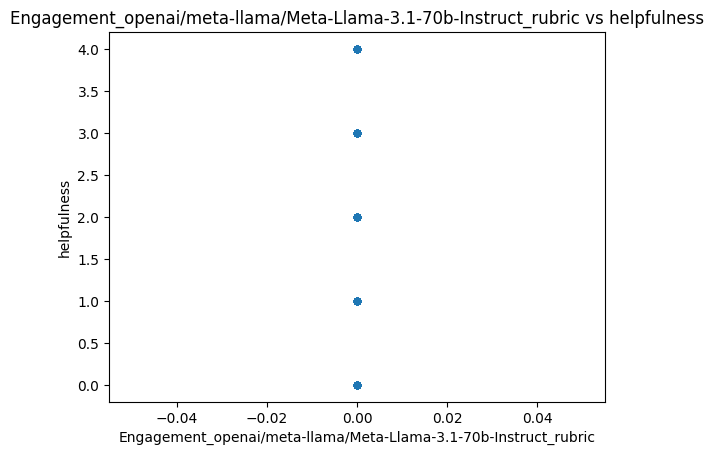

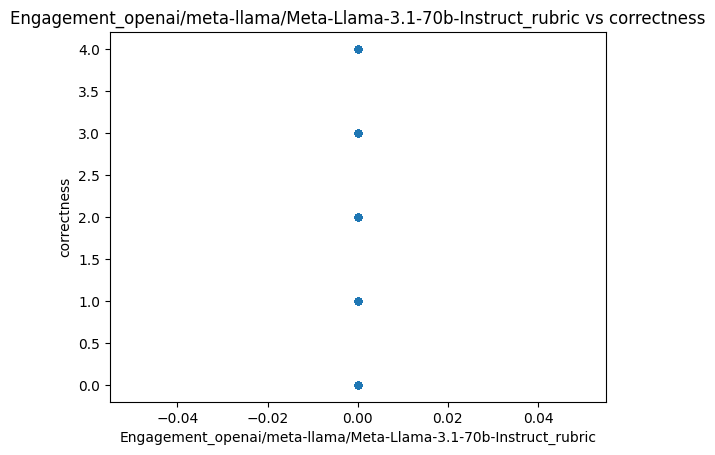

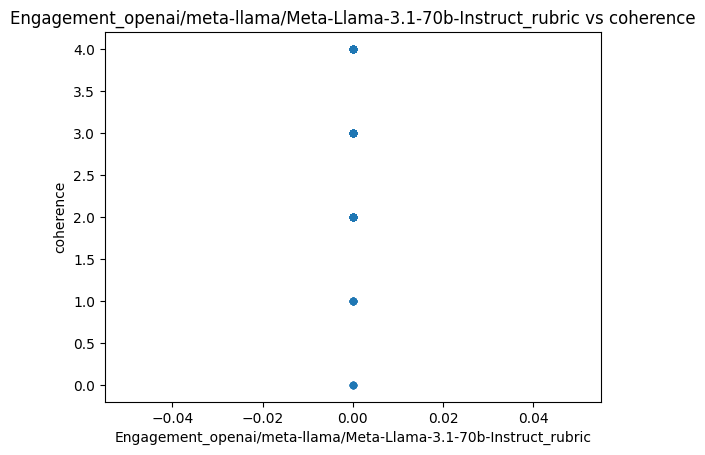

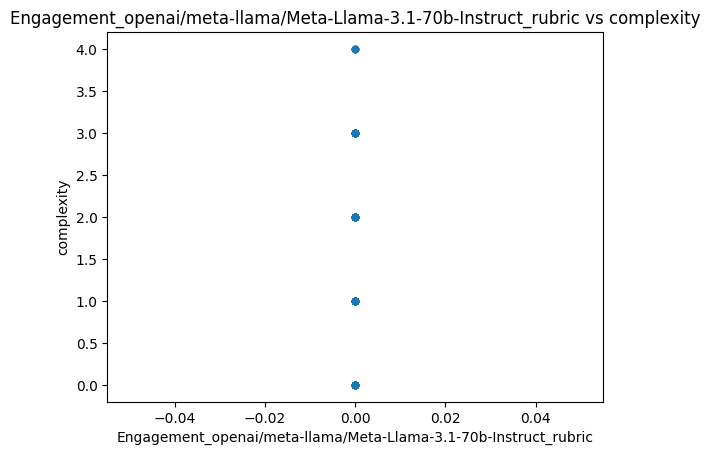

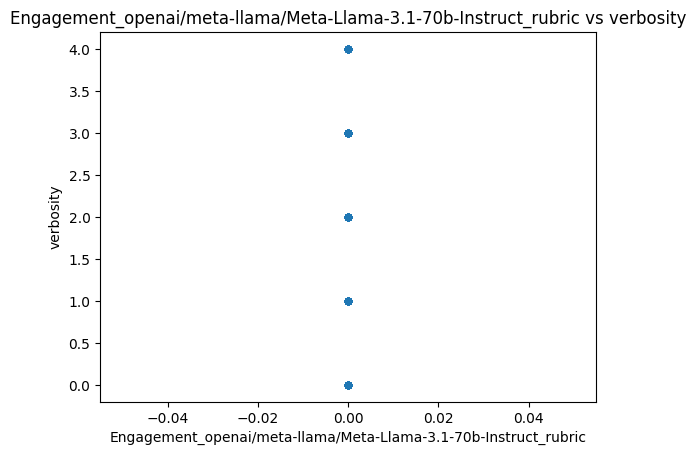

In [18]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
